### Novas perguntas de negócios

1. Qual a média do preço de compra dos imóveis por “Nível”?
- Nível 0 -> Preço entre 0 e 321.950 reais
- Nível 1 -> Preço entre 321.950 e 450.000 reais
- Nível 2 -> Preço entre 450.000 e 645.000 reais
- Nível 3 -> Acima de 645.000 reais
2. Qual a média do tamanho da sala de estar dos imóveis por “Size” ?
- Size 0 -> Tamanho entre 0 e 1427 sqft
- Size 1 -> Tamanho entre 1427 e 1910 sqft
- Size 2 -> Tamanho entre 1910 e 2550 sqft
- Size 3 -> Tamanho acima de 2550 sqft
3. Adicione as seguinte informações ao conjunto de dados original:
- Place ID: Identificação da localização
- OSM Type: Open Street Map type
- Country: Nome do País
- Country Code: Código do País
4. Adicione os seguinte filtros no Mapa:
- Tamanho mínimo da área da sala de estar.
- Número mínimo de banheiros.
- Valor Máximo do Preço.
- Tamanho máximo da área do porão.
- Filtro das Condições do Imóvel.
- Filtro por Ano de Construção.
5. Adicione os seguinte filtros no Dashboard:
- Filtro por data disponível para compra.
- Filtro por ano de renovação.
- Filtro se possui vista para a água ou não.

Os dados para análise são encontrados em: https://www.kaggle.com/harlfoxem/housesalesprediction/version/1?select=kc_house_data.csv

In [56]:
import pandas as pd
#biblioteca de criação de mapas
import plotly.express as px
#para ter 3 casas depois da vírgula
pd.set_option('display.float_format',lambda x: '%.3f' % x)

In [129]:
data = data = pd.read_csv('datasets/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


1. Qual a média do preço de compra dos imóveis por “Nível”?
- Nível 0 -> Preço entre 0 e 321.950 reais
- Nível 1 -> Preço entre 321.950 e 450.000 reais
- Nível 2 -> Preço entre 450.000 e 645.000 reais
- Nível 3 -> Acima de 645.000 reais

In [130]:
#criar um laço for para adicionar as condições para cada faixa de valor

for i in range(len(data)):
    if (data.loc[i,'price'] >= 0) & (data.loc[i,'price'] < 321950):
        data.loc[i,'nivel'] = 0
    elif (data.loc[i,'price'] >= 321950) & (data.loc[i,'price'] < 450000):
        data.loc[i,'nivel'] = 1
    elif (data.loc[i,'price'] >= 450000) & (data.loc[i,'price'] < 645000):
        data.loc[i,'nivel'] = 2
    else:
        data.loc[i,'nivel'] = 3

In [4]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,nivel
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,1180,0,1955,0,98178,47.511,-122.257,1340,5650,0.000
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,2.000
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,770,0,1933,0,98028,47.738,-122.233,2720,8062,0.000
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,1050,910,1965,0,98136,47.521,-122.393,1360,5000,2.000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,1680,0,1987,0,98074,47.617,-122.045,1800,7503,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.000,3,2.500,1530,1131,3.000,0,0,...,1530,0,2009,0,98103,47.699,-122.346,1530,1509,1.000
21609,6600060120,20150223T000000,400000.000,4,2.500,2310,5813,2.000,0,0,...,2310,0,2014,0,98146,47.511,-122.362,1830,7200,1.000
21610,1523300141,20140623T000000,402101.000,2,0.750,1020,1350,2.000,0,0,...,1020,0,2009,0,98144,47.594,-122.299,1020,2007,1.000
21611,291310100,20150116T000000,400000.000,3,2.500,1600,2388,2.000,0,0,...,1600,0,2004,0,98027,47.535,-122.069,1410,1287,1.000


### 2. Qual a média do tamanho da sala de estar dos imóveis por “Size” ?
- Size 0 -> Tamanho entre 0 e 1427 sqft
- Size 1 -> Tamanho entre 1427 e 1910 sqft
- Size 2 -> Tamanho entre 1910 e 2550 sqft
- Size 3 -> Tamanho acima de 2550 sqft

In [131]:
#criar um laço for para adicionar as condições para cada faixa de tamanho de sala

for i in range(len(data)):
    if (data.loc[i,'sqft_living'] >= 0) & (data.loc[i,'sqft_living'] < 1427):
        data.loc[i,'size'] = 0
    elif (data.loc[i,'sqft_living'] >= 1427) & (data.loc[i,'sqft_living'] < 1910):
        data.loc[i,'size'] = 1
    elif (data.loc[i,'sqft_living'] >= 1910) & (data.loc[i,'sqft_living'] < 2550):
        data.loc[i,'size'] = 2
    else:
        data.loc[i,'size'] = 3

In [6]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,nivel,size
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,0,1955,0,98178,47.511,-122.257,1340,5650,0.000,0.000
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,400,1951,1991,98125,47.721,-122.319,1690,7639,2.000,3.000
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,0,1933,0,98028,47.738,-122.233,2720,8062,0.000,0.000
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,910,1965,0,98136,47.521,-122.393,1360,5000,2.000,2.000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,0,1987,0,98074,47.617,-122.045,1800,7503,2.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.000,3,2.500,1530,1131,3.000,0,0,...,0,2009,0,98103,47.699,-122.346,1530,1509,1.000,1.000
21609,6600060120,20150223T000000,400000.000,4,2.500,2310,5813,2.000,0,0,...,0,2014,0,98146,47.511,-122.362,1830,7200,1.000,2.000
21610,1523300141,20140623T000000,402101.000,2,0.750,1020,1350,2.000,0,0,...,0,2009,0,98144,47.594,-122.299,1020,2007,1.000,0.000
21611,291310100,20150116T000000,400000.000,3,2.500,1600,2388,2.000,0,0,...,0,2004,0,98027,47.535,-122.069,1410,1287,1.000,1.000


### 3. Adicione as seguinte informações ao conjunto de dados original:
- Place ID: Identificação da localização
- OSM Type: Open Street Map type
- Country: Nome do País
- Country Code: Código do País

In [7]:
#essas informações são disponiveis por uma API chamada GEOPY:
"""geopy makes it easy for Python developers to locate the coordinates of addresses, cities, countries, 
and landmarks across the globe using third-party geocoders and other data source"""

from geopy.geocoders import Nominatim

In [8]:
#inicializando a API Nominatim
geolocator = Nominatim(user_agent='geoapiExercises')    #pode colocar qualquer user

In [9]:
#a função reverse acessa as informações geograficas atraves da latitude e longitude
response = geolocator.reverse('47.511,-122.257') #coordenadas de latitude e longitude da primeira casa do dataframe

In [10]:
response.raw   #dados da primeira casa

{'place_id': 160093695,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 236673622,
 'lat': '47.51098745',
 'lon': '-122.25680736110141',
 'display_name': '10022, 61st Avenue South, Rainier Beach, Seattle, King County, Washington, 98178, United States',
 'address': {'house_number': '10022',
  'road': '61st Avenue South',
  'neighbourhood': 'Rainier Beach',
  'city': 'Seattle',
  'county': 'King County',
  'state': 'Washington',
  'postcode': '98178',
  'country': 'United States',
  'country_code': 'us'},
 'boundingbox': ['47.5109076', '47.5110247', '-122.2568725', '-122.2566819']}

In [126]:
import time
from multiprocessing import Pool

"""multiprocessing é um pacote que suporta processos de geração usando uma API semelhante ao módulo de threading. 
O pacote de multiprocessamento oferece simultaneidade local e remota.
Devido a isso, o módulo de multiprocessamento permite que o programador 
aproveite totalmente vários processadores em uma determinada máquina. Fazendo com que
os processos sejam bem mais rapidos. """

In [134]:
#usando o laço for demora muito para rodar todos os dados, dessa forma vamos usar a função Pool para dividir as tarefas e ir mais rapido

#criando uma coluna query com o valor de lat + long
data['query'] = data[['lat','long']].apply( lambda x: str(x['lat']) + ',' + str(x['long']), axis=1)

In [142]:
#função criada externamente para popular as colunas com os dados
#coloquei externamente pqe no jupyter notebook só faz o processamento sequencial
#então vou importar como modulo

"""
import time
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='geoapiExercises')

def get_data(x):
    index, row = x
    time.sleep(1)  # para dar um tempo para a API conseguir processar

    # chamada API
    response = geolocator.reverse(row['query'])
    address = response.raw['address']

    place_id = response.raw['place_id'] if 'place_id' in response.raw else 'NA'
    osm_type = response.raw['osm_type'] if 'osm_type' in response.raw else 'NA'
    country = address['country'] if 'country' in address else 'NA'
    country_code = address['country_code'] if 'country_code' in address else 'NA'

    return place_id, osm_type, country, country_code
"""
    

"import time\nfrom geopy.geocoders import Nominatim\n\ngeolocator = Nominatim(user_agent='geoapiExercises')\n\ndef get_data(x):\n    index, row = x\n    time.sleep(1)  # para dar um tempo para a API conseguir processar\n\n    # chamada API\n    response = geolocator.reverse(row['query'])\n    address = response.raw['address']\n\n    place_id = response.raw['place_id'] if 'place_id' in response.raw else 'NA'\n    osm_type = response.raw['osm_type'] if 'osm_type' in response.raw else 'NA'\n    country = address['country'] if 'country' in address else 'NA'\n    country_code = address['country_code'] if 'country_code' in address else 'NA'\n\n    return place_id, osm_type, country, country_code"

In [143]:
import defs

#dataframe só com os valores que vou usar
df1 = data[['id','query']].head()

#criando 3 pools/workers
p = Pool(3)

#a função map atribui uma tarefa para cada worker 
#get_data é a função que criei e coloquei externamente pqe no jupyter notebook só faz o processamento sequencial
#interrows é a função que prepara os dados para que seja interada em cada linha
df1[['place_id','osm_type','country','country_code']] = p.map(defs.get_data, df1.iterrows())


In [139]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,nivel,size,query
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,1955,0,98178,47.511,-122.257,1340,5650,0.000,0.000,"47.5112,-122.257"
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,1951,1991,98125,47.721,-122.319,1690,7639,2.000,3.000,"47.721,-122.319"
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,1933,0,98028,47.738,-122.233,2720,8062,0.000,0.000,"47.7379,-122.233"
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,1965,0,98136,47.521,-122.393,1360,5000,2.000,2.000,"47.5208,-122.393"
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,1987,0,98074,47.617,-122.045,1800,7503,2.000,1.000,"47.6168,-122.045"


In [140]:
#jeito devagar de fazer:

#criando as colunas vazias:
data['place_id'] = 'NA'
data['osm_type'] = 'NA'
data['country'] = 'NA'
data['country_code'] = 'NA'

#inicializando a API Nominatim
geolocator = Nominatim(user_agent='geoapiExercises') 

for i in range(0,10):  #o certo é fazer range(len(data)) mas demora muito para percorrer todo o dateframe então diminui o laço
    query = str(data['lat'][i]) + ',' + str(data['long'][i])  #contatena a latitude e longitude como strings
    response = geolocator.reverse(query) #coordenadas de latitude e longitude da primeira casa do dataframe
    
    #populando data
    if 'place_id' in response.raw:   #condição para saber se existe o valor, sem ela vai dar erro se não tiver alguma das informações
        data.loc[i,'place_id'] = response.raw['place_id']
    
    if 'osm_type' in response.raw:
        data.loc[i, 'osm_type'] = response.raw['osm_type']
    
    if 'country' in response.raw['address']:
        data.loc[i, 'country'] = response.raw['address']['country']
    
    if 'country_code' in response.raw['address']:
        data.loc[i, 'country_code'] = response.raw['address']['country_code']

### 4. Adicione os seguinte filtros no Mapa:
- Tamanho mínimo da área da sala de estar.
- Número mínimo de banheiros.
- Valor Máximo do Preço.
- Tamanho máximo da área do porão.
- Filtro das Condições do Imóvel.
- Filtro por Ano de Construção.

In [48]:
#biblioteca para criação de botões/widgets
import ipywidgets as widgets
from ipywidgets import fixed

### - Tamanho mínimo da área da sala de estar.

In [149]:
#criando os botões interativos:

##botão de arrastar o tamanho:
living_limit = widgets.IntSlider(value = data['sqft_living'].min(),
                                min = data['sqft_living'].min(),
                                max = data['sqft_living'].max(),
                                step = 1 , #quando varia quando arrasta
                                description = 'Tamanho mínimo da Sala de estar',
                                disable = False,
                                style = {'description_width': 'initial'})

In [150]:
living_limit

IntSlider(value=290, description='Tamanho mínimo da Sala de estar', max=13540, min=290, style=SliderStyle(desc…

### - Número mínimo de banheiros.

In [151]:
##botão de arrastar o valor mínimo:
bathrooms_limit = widgets.Dropdown(options = [1,2,3,4,5,6,7,8],
                                min = data['bathrooms'].min(),
                                max = data['bathrooms'].max(),
                                step = 1 , #quando varia quando arrasta
                                description = 'Número mínimo de Banheiros',
                                disable = False,
                                style = {'description_width': 'initial'})

In [152]:
bathrooms_limit

Dropdown(description='Número mínimo de Banheiros', options=(1, 2, 3, 4, 5, 6, 7, 8), style=DescriptionStyle(de…

### - Valor Máximo do Preço.

In [153]:
##botão de arrastar o preço:
price_max = widgets.FloatSlider(value = data['price'].min(),
                                min = data['price'].min(),
                                max = data['price'].max(),
                                step = 1 , #quando varia quando arrasta
                                description = 'Valor Máximo do Preço',
                                disable = False,
                                style = {'description_width': 'initial'})
price_max

FloatSlider(value=75000.0, description='Valor Máximo do Preço', max=7700000.0, min=75000.0, step=1.0, style=Sl…

### - Tamanho máximo da área do porão.

In [154]:
##botão de arrastar o valor da área:
basement_max = widgets.IntSlider(value = data['sqft_basement'].min(),
                                min = data['sqft_basement'].min(),
                                max = data['sqft_basement'].max(),
                                step = 1 , #quando varia quando arrasta
                                description = 'Tamanho máximo da área do porão.',
                                disable = False,
                                style = {'description_width': 'initial'})
basement_max

IntSlider(value=0, description='Tamanho máximo da área do porão.', max=4820, style=SliderStyle(description_wid…

### - Filtro das Condições do Imóvel.


In [155]:
#vou usar a função apply, a função apply aplica uma função especificada linha por linha no DataFrame
#a função que eu vou criar vai se chamar func_2

#lambda <arguments> : <Return Value if condition is True> if <condition> else <Return Value if condition is False>

func_2 = ( lambda x: 'bad' if x <= 2 
          else 'regular' if (x == 3 or x == 4)
          else 'good' if x == 5 
          else 'NA')

#cria a coluna adicionando nela os valores correspondes da função apply aplicada na coluna condition
data['condition_type'] = data['condition'].apply(func_2)

In [156]:
##botão de opções de condições
condition_type = widgets.Dropdown(options = data['condition_type'].unique(),
                                value = 'good',
                                description = 'Condições do Imóvel',
                                disable = False,
                                style = {'description_width': 'initial'})
condition_type

Dropdown(description='Condições do Imóvel', index=1, options=('regular', 'good', 'bad'), style=DescriptionStyl…

### - Filtro por Ano de Construção.

In [157]:
##botão de arrastar o ano:
year_built = widgets.IntSlider(value = data['yr_built'].min(),
                                min = data['yr_built'].min(),
                                max = data['yr_built'].max(),
                                step = 1 , #quando varia quando arrasta
                                description = 'Ano de Construção',
                                disable = False,
                                style = {'description_width': 'initial'})
year_built

IntSlider(value=1900, description='Ano de Construção', max=2015, min=1900, style=SliderStyle(description_width…

In [158]:
#criando uma função para atualizar o mapa
def update_map(data, limit_living, limit_bath, max_price, max_basement, condition_type, year_built ):
    filtros = data[(data['sqft_living'] >= limit_living) & 
                   (data['bathrooms'] >= limit_bath) &
                   (data['price'] <= max_price) & 
                   (data['sqft_basement'] <= max_basement) &
                   (data['condition_type'] == condition_type) &
                   (data['yr_built'] == year_built)]
    
    houses = filtros[['id','lat','long','price','nivel','bathrooms','sqft_living']]
    
    fig = px.scatter_mapbox( houses, 
                         lat='lat',
                         lon='long',
                         color= 'nivel',   #o que vai mudar com a cor
                         size= 'price',    #o que vai mudar com o tamanho da bolinha
                         color_continuous_scale= px.colors.cyclical.IceFire,
                         size_max= 15,
                         zoom= 10)

    fig.update_layout( mapbox_style = 'open-street-map')
    fig.update_layout( height=600, margin={'r': 0,'t': 0,'l': 0,'b': 0})
    fig.show()
    

In [159]:
#mostrando o mapa

widgets.interactive(update_map, data=fixed(data) , 
                    limit_living = living_limit, 
                    limit_bath = bathrooms_limit, 
                    max_price = price_max, 
                    max_basement = basement_max,
                    condition_type = condition_type,
                    year_built = year_built)

interactive(children=(IntSlider(value=290, description='Tamanho mínimo da Sala de estar', max=13540, min=290, …

### 5. Adicione os seguinte filtros no Dashboard:
- Filtro por data disponível para compra.
- Filtro por ano de renovação.
- Filtro se possui vista para a água ou não.

### - Filtro por data disponível para compra.

In [181]:
#preparando o dataset
data['year'] = pd.to_datetime(data['date']).dt.strftime('%y')
data['date'] = pd.to_datetime(data['date']).dt.strftime('%y-%m-%d')
data['year_week'] = pd.to_datetime(data['date']).dt.strftime('%y-%u')


#widgets para controlar os dados
date_limit = widgets.SelectionSlider(options = data['date'].sort_values().unique().tolist(),
                                      description =  'Data disponível para compra',
                                      continuous_update = False,
                                      orientation = 'horizontal',
                                      readout = True,
                                      style = {'description_width': 'initial'})
date_limit

SelectionSlider(continuous_update=False, description='Data disponível para compra', options=('01-02-15', '01-0…

### - Filtro por ano de renovação.

In [172]:
##botão para filtrar por ano de renovação:

year_renovated = widgets.IntSlider(value = 1991,
                                min = 1991,
                                max = data['yr_renovated'].max(),
                                step = 1 , #quando varia quando arrasta
                                description = 'Ano de renovação',
                                disable = False,
                                style = {'description_width': 'initial'})
year_renovated

IntSlider(value=1991, description='Ano de renovação', max=2015, min=1991, style=SliderStyle(description_width=…

### - Filtro se possui vista para a água ou não.

In [162]:
#criando uma coluna para saber se tem vista para o mar
data['is_waterfront'] = data['waterfront'].apply(lambda x: 'yes' if x==1 else 'no')

#criando os botões interativos:

##botão para filtrar os imoveis com vista para o mar:
waterfront_bar = widgets.Dropdown(options = ['yes','no'],
                                  value = 'yes', #valor padrão
                                  description = 'Vista para o mar',
                                  disable = False,
                                  style = {'description_width': 'initial'})
waterfront_bar

Dropdown(description='Vista para o mar', options=('yes', 'no'), style=DescriptionStyle(description_width='init…

In [185]:
from matplotlib import gridspec
from matplotlib import pyplot as plt
import seaborn as sns

In [197]:
def update_map(data, date_limit, year_limit, waterfront_limit):
    #filtros:
    data = data[(data['date'] <= date_limit) &
              (data['yr_renovated'] >= year_limit) &
              (data['waterfront'] == waterfront_limit)].copy()
    
    fig = plt.figure(figsize = (15,12))
    specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig)

    ax1 = fig.add_subplot( specs[0, :] ) #firts row
    ax2 = fig.add_subplot( specs[1, 0] ) #second row - first column
    ax3 = fig.add_subplot( specs[1, 1] ) #second row - second column
    
    by_year = data[['id','year']].groupby('year').sum().reset_index()
    ax1.bar(by_year['year'], by_year['id'])
    
    by_day = data[['id','date']].groupby('date').mean().reset_index()
    ax2.plot(by_day['date'], by_day['id'])
    ax2.set_title('Preço médio por dia')
    
    by_week_of_year = data[['id','year_week']].groupby('year_week').mean().reset_index()
    ax3.bar(by_week_of_year['year_week'], by_week_of_year['id'])
    ax3.set_title('Preço médio por semana do ano')
    plt.xticks(rotation=60);

In [194]:
def update_map(data, date_limit, year_limit, waterfront_limit):
    #filtros:
    data = data[(data['date'] <= date_limit) &
              (data['yr_renovated'] >= year_limit) &
              (data['waterfront'] == waterfront_limit)].copy()
    
    fig = plt.figure(figsize = (15,12))
    specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig)

    ax1 = fig.add_subplot( specs[0, :] ) #firts row
    ax2 = fig.add_subplot( specs[1, 0] ) #second row - first column
    ax3 = fig.add_subplot( specs[1, 1] ) #second row - second column
    
    by_year = data[['id','year']].groupby('year').sum().reset_index()
    sns.barplot(x= 'year', y='id', data=by_year, ax=ax1)
    
    by_day = data[['id','date']].groupby('date').mean().reset_index()
    sns.barplot(x= 'date', y='id', data=by_day, ax=ax2)
    
    by_week_of_year = data[['id','year_week']].groupby('year_week').mean().reset_index()
    sns.barplot(x= 'year_week', y='id', data=by_week_of_year, ax=ax3)

interactive(children=(SelectionSlider(continuous_update=False, description='Data disponível para compra', inde…

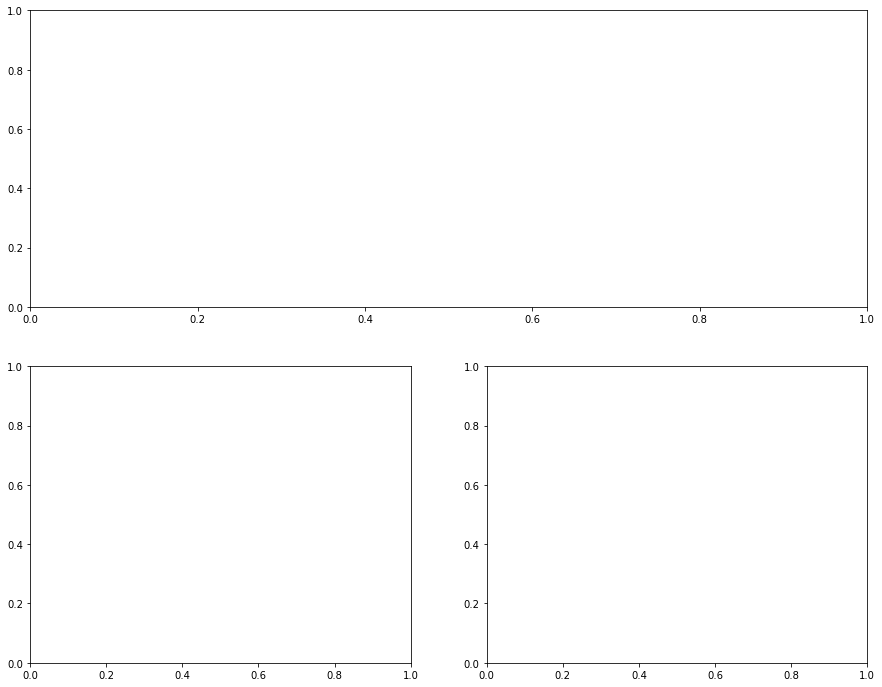

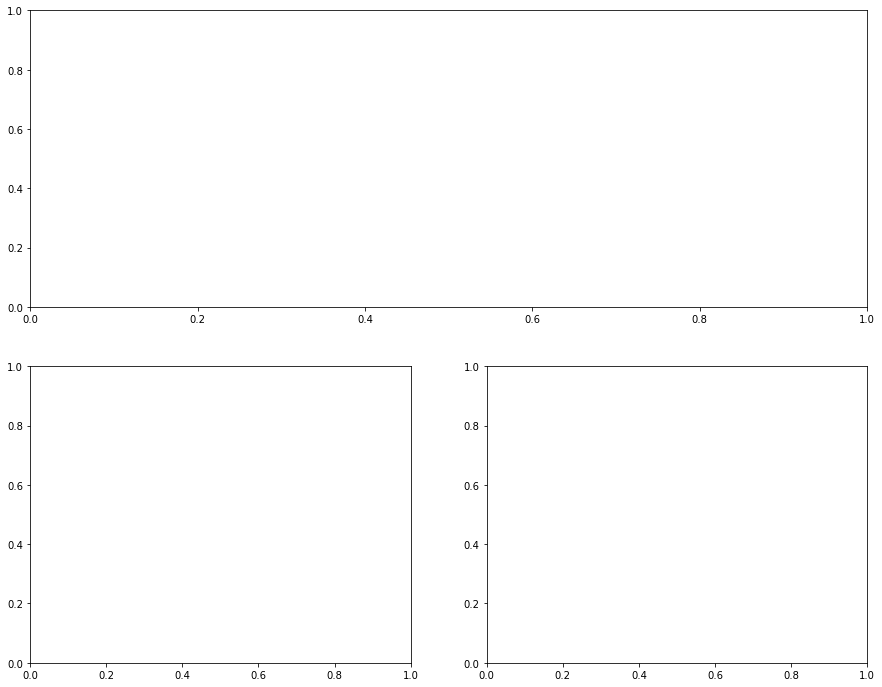

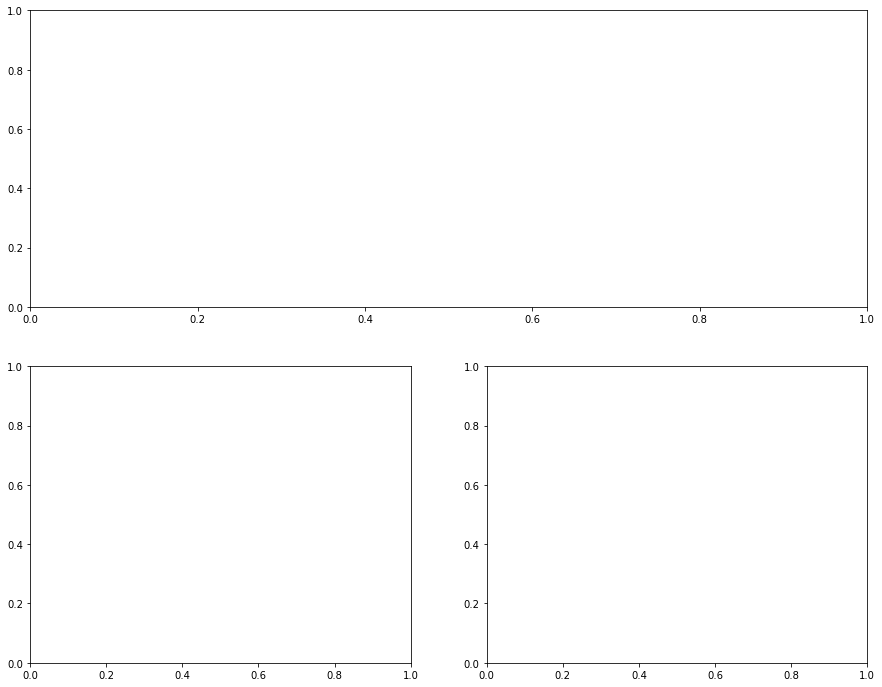

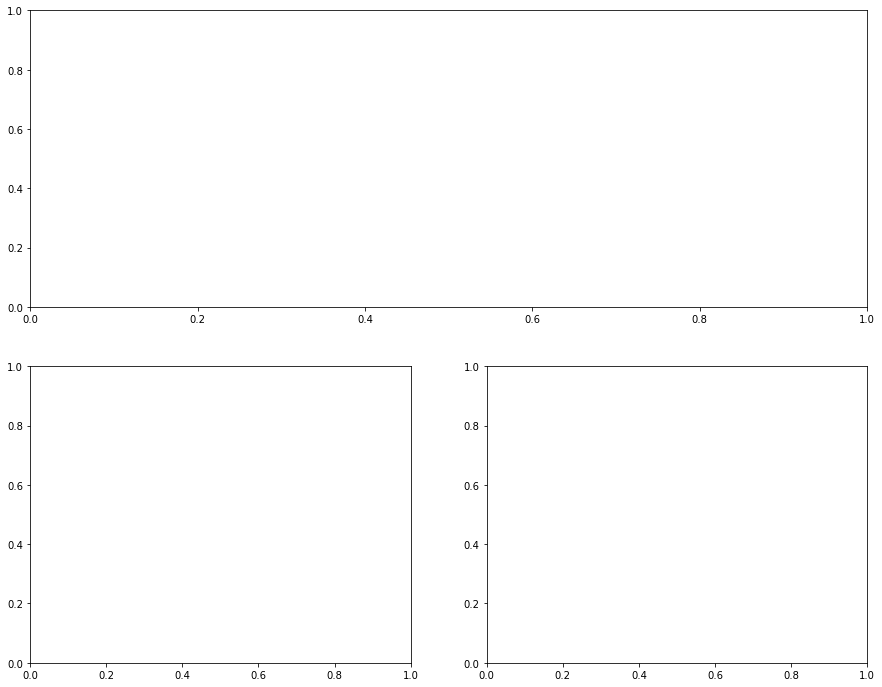

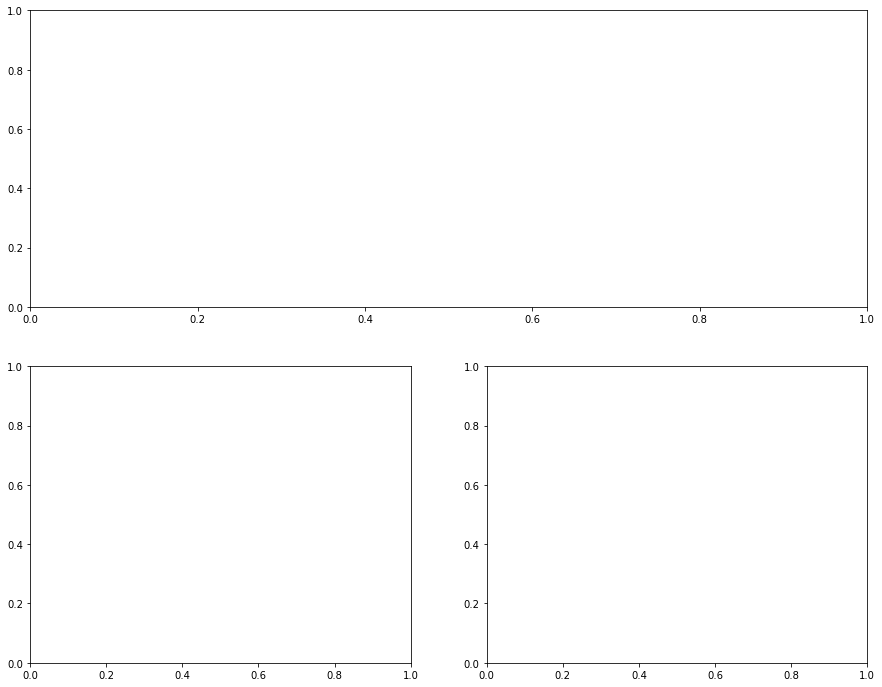

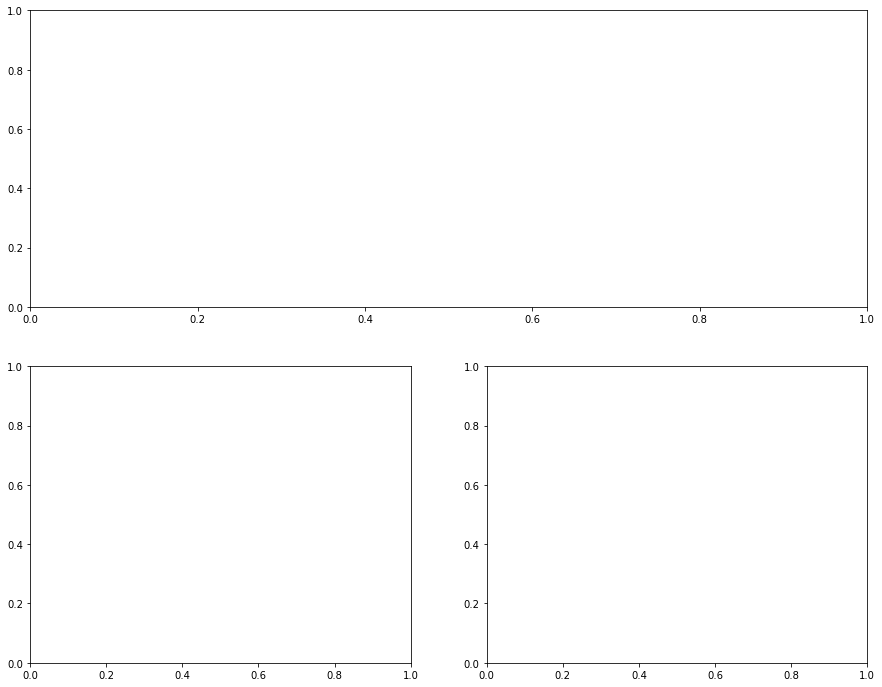

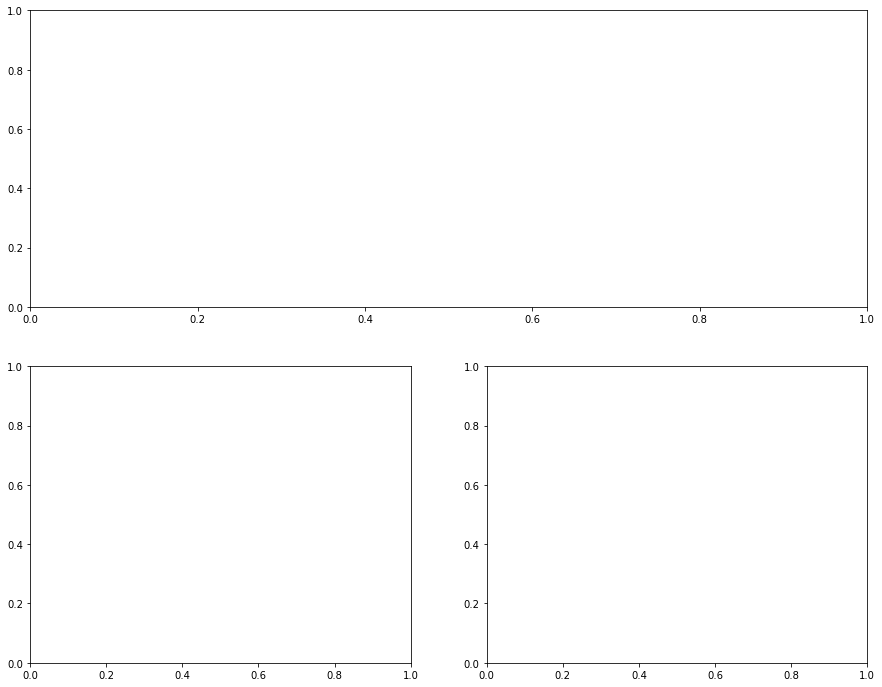

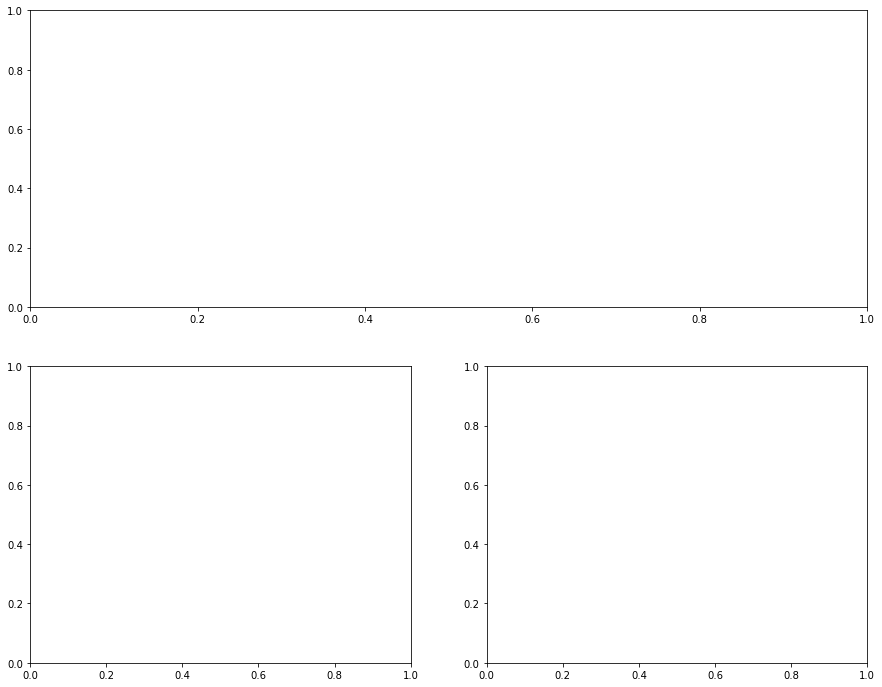

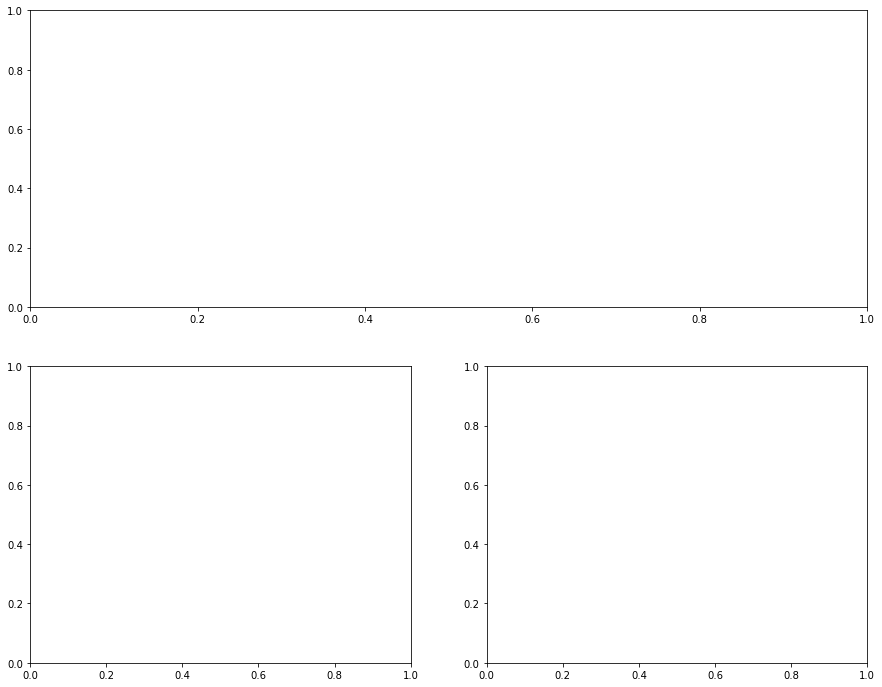

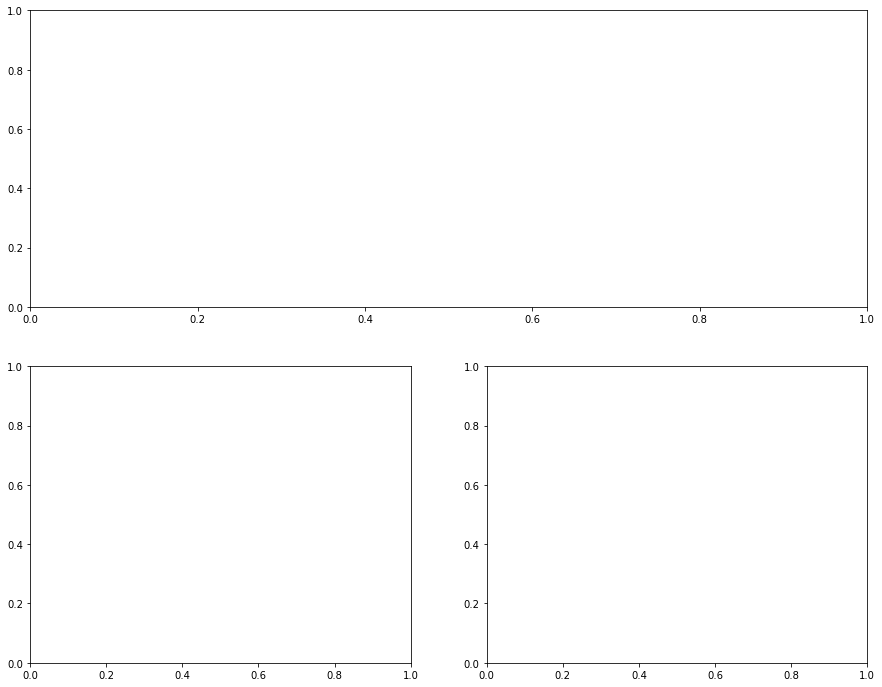

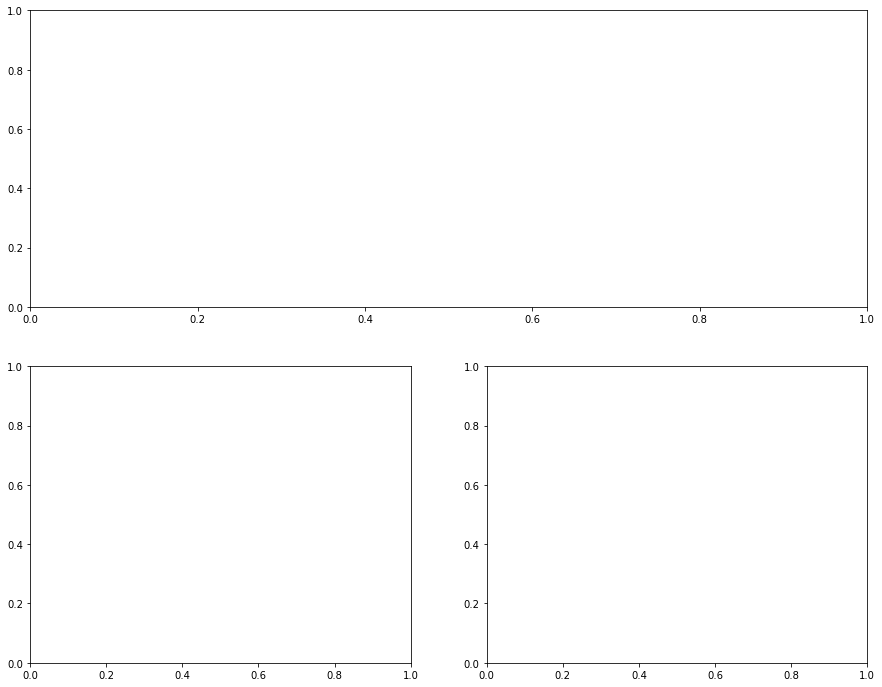

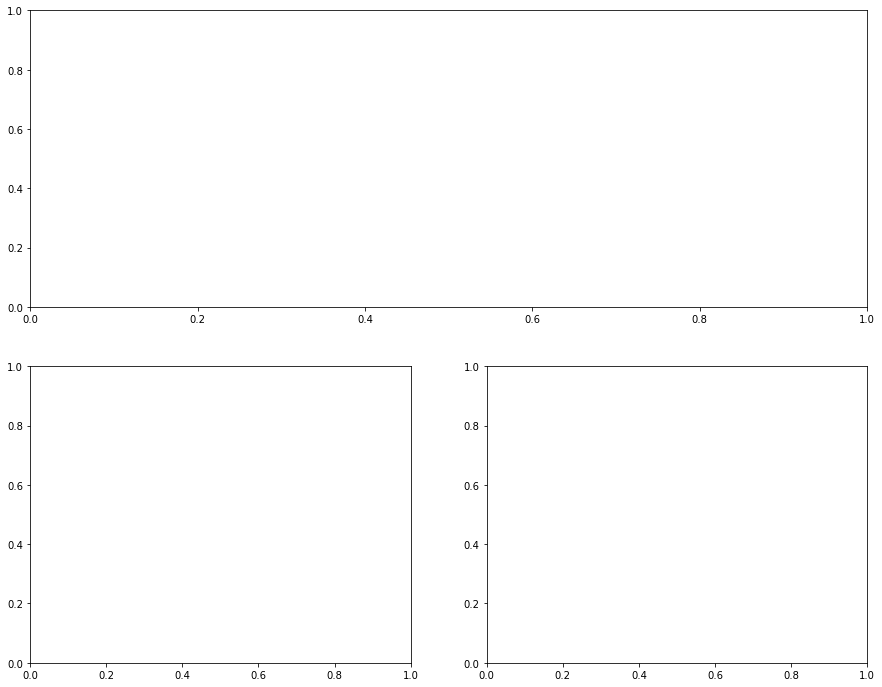

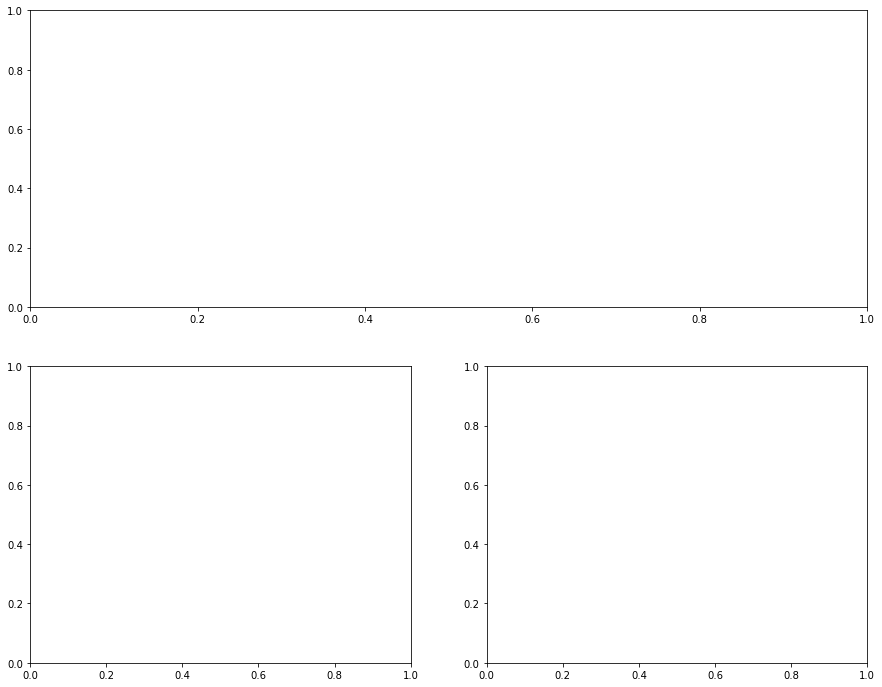

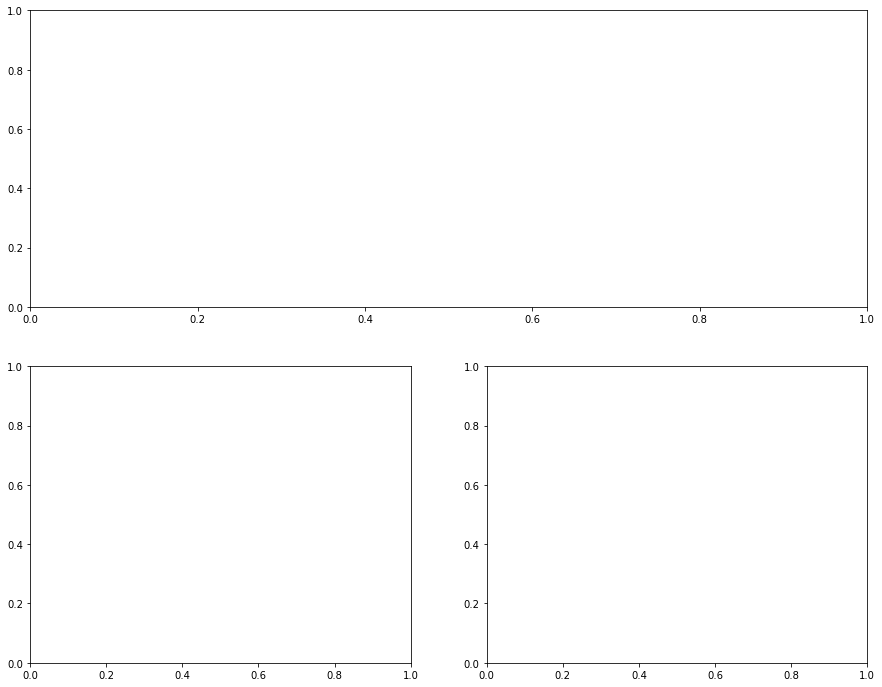

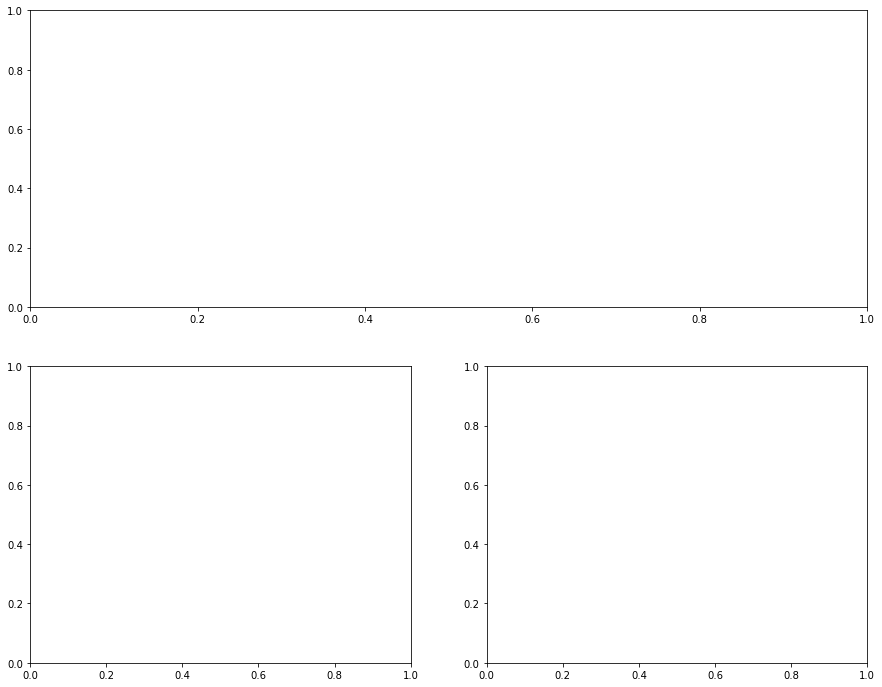

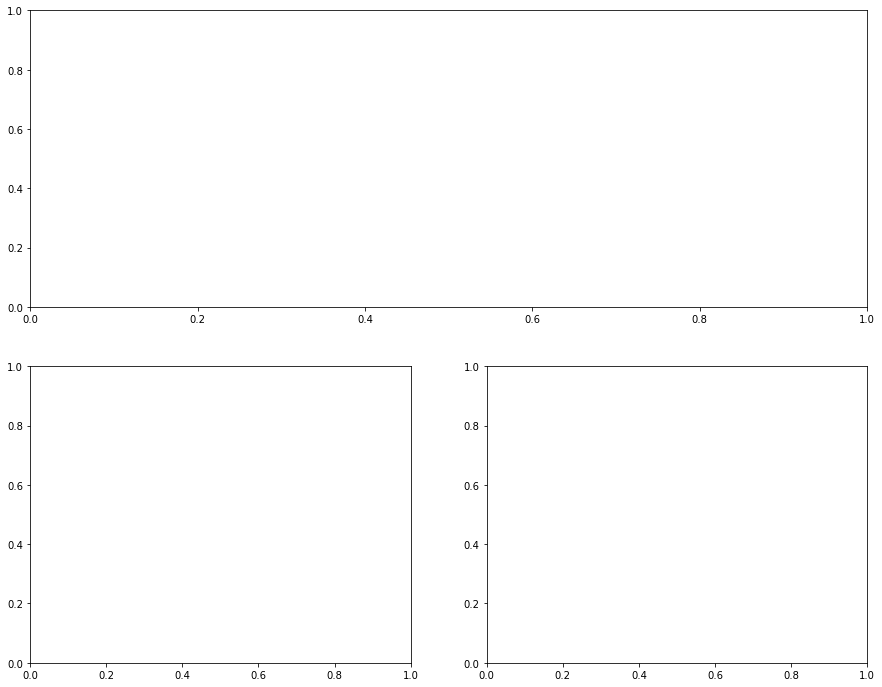

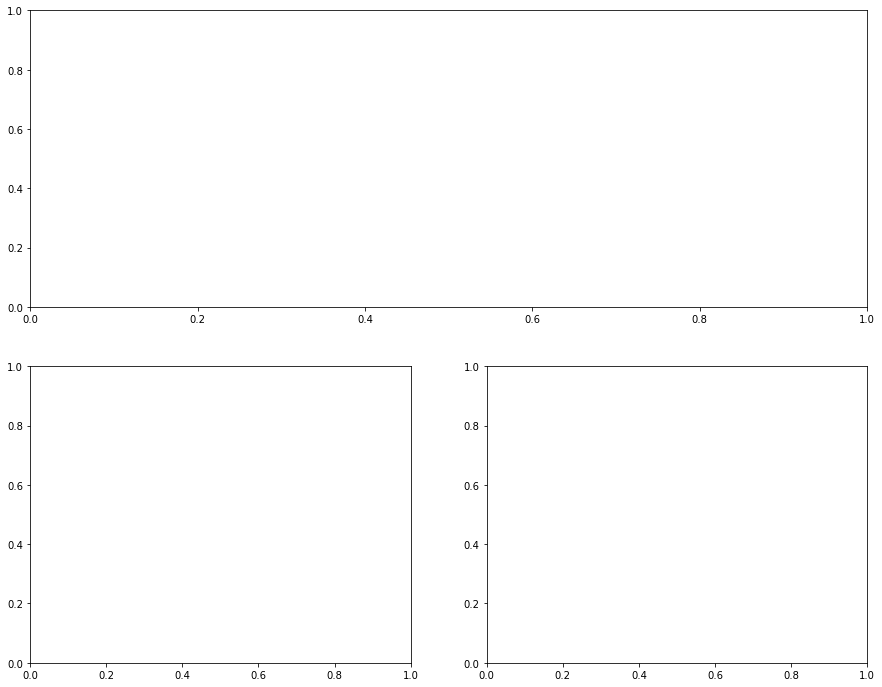

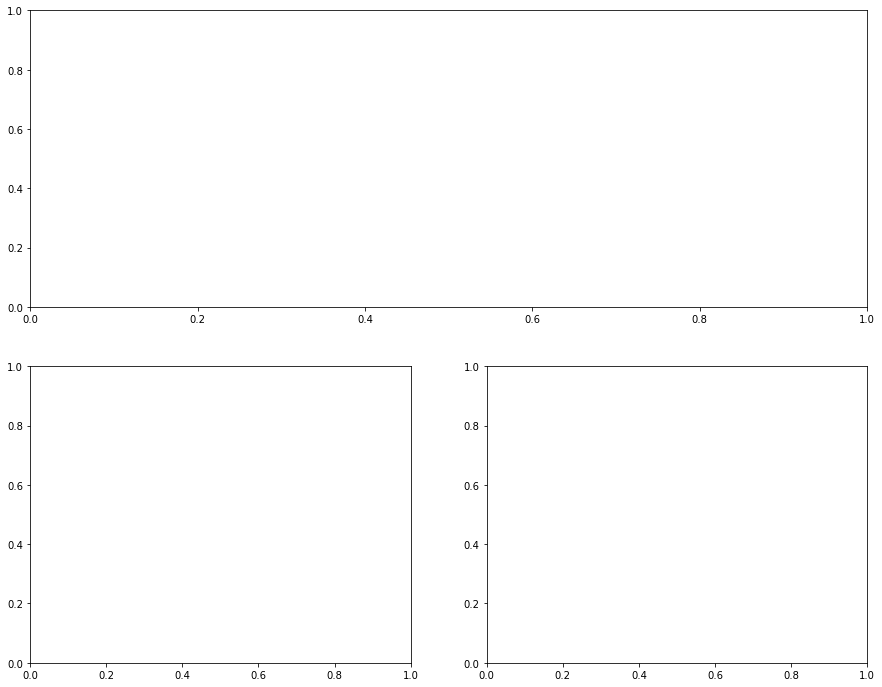

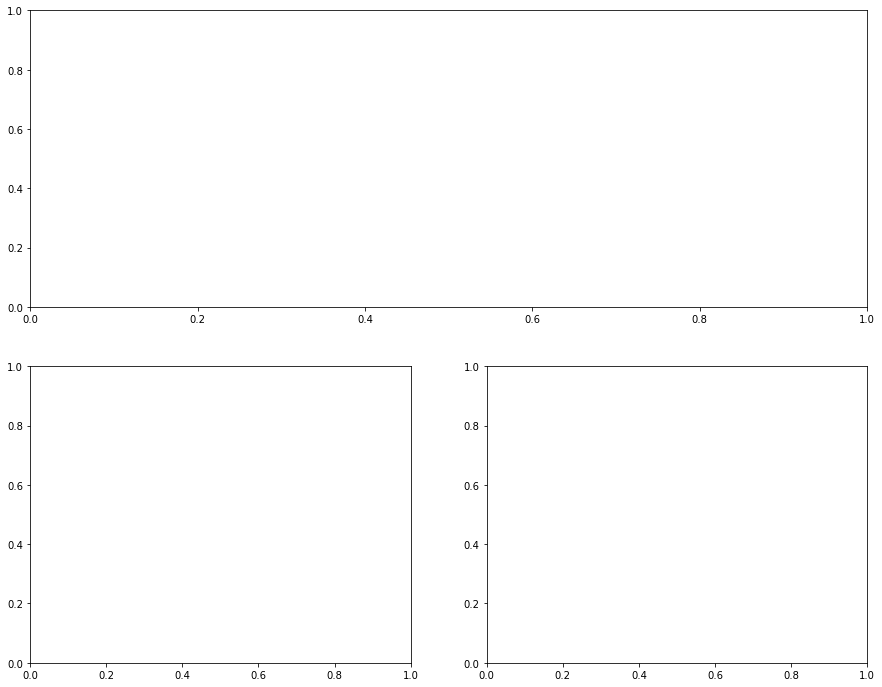

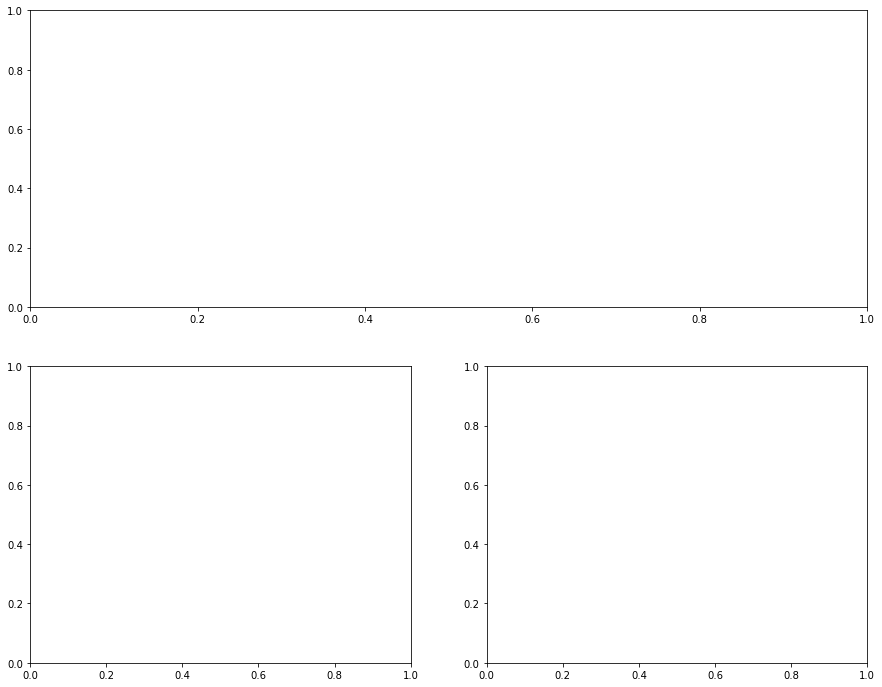

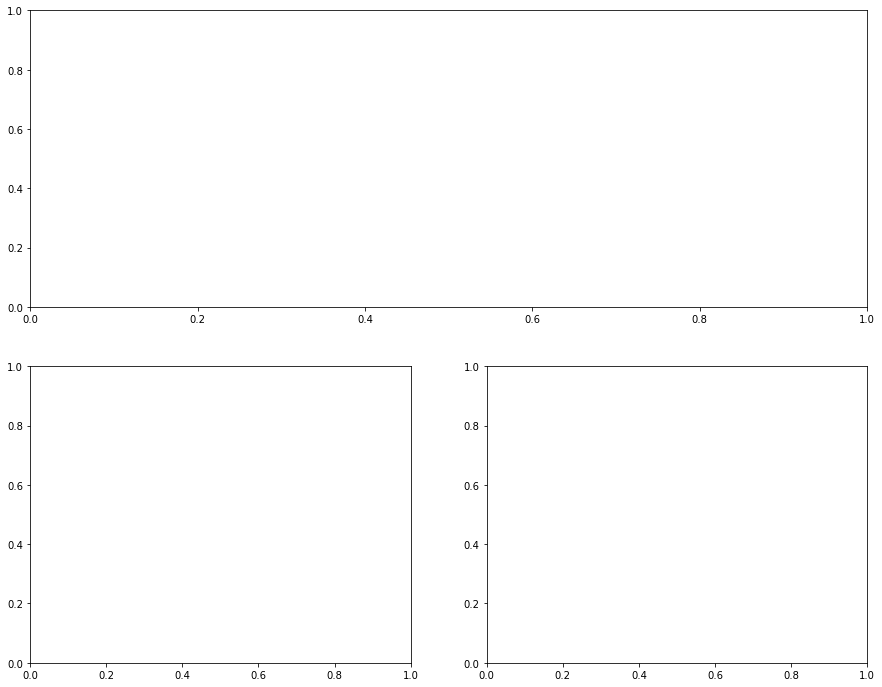

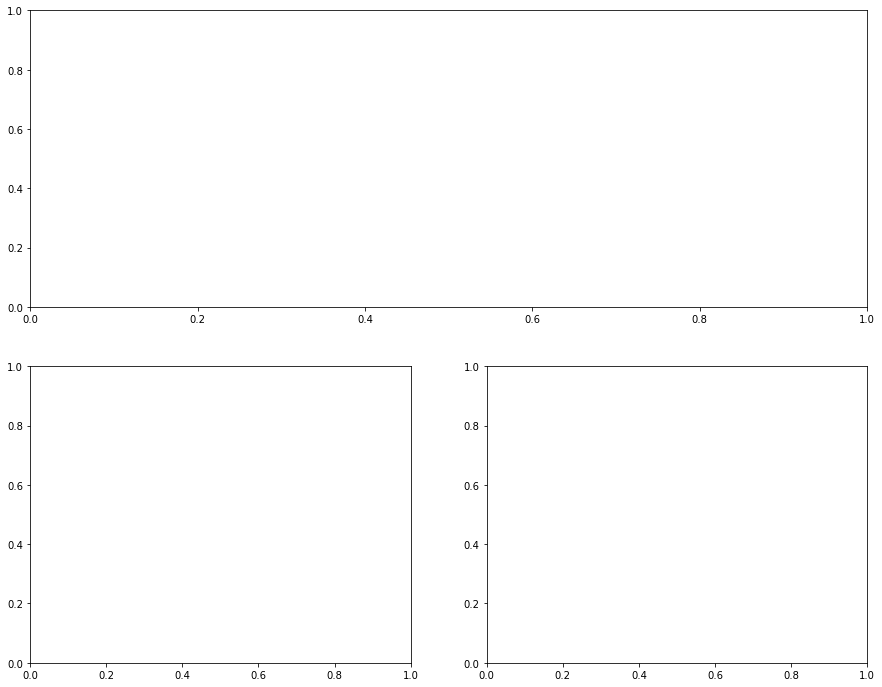

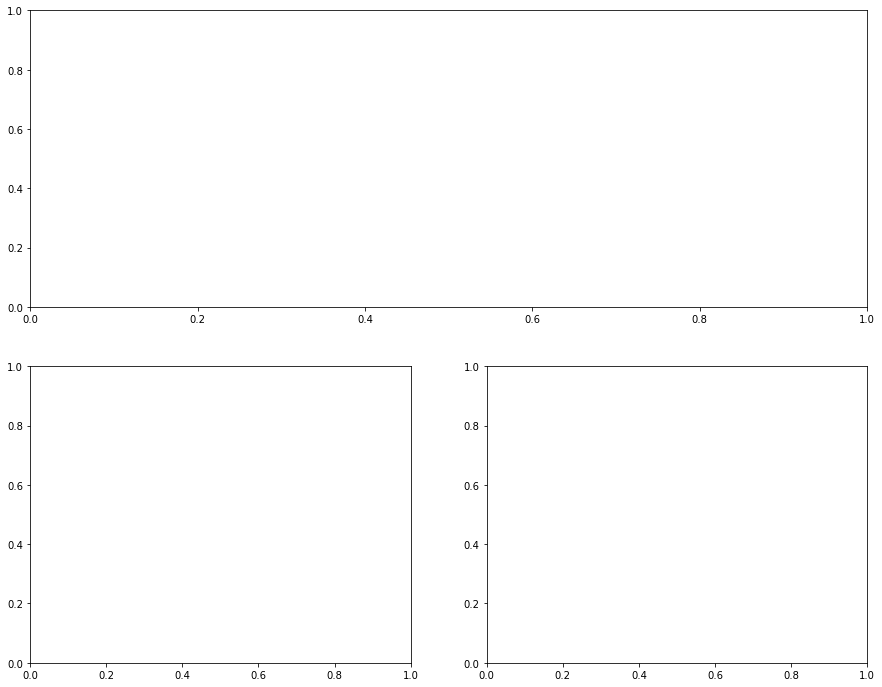

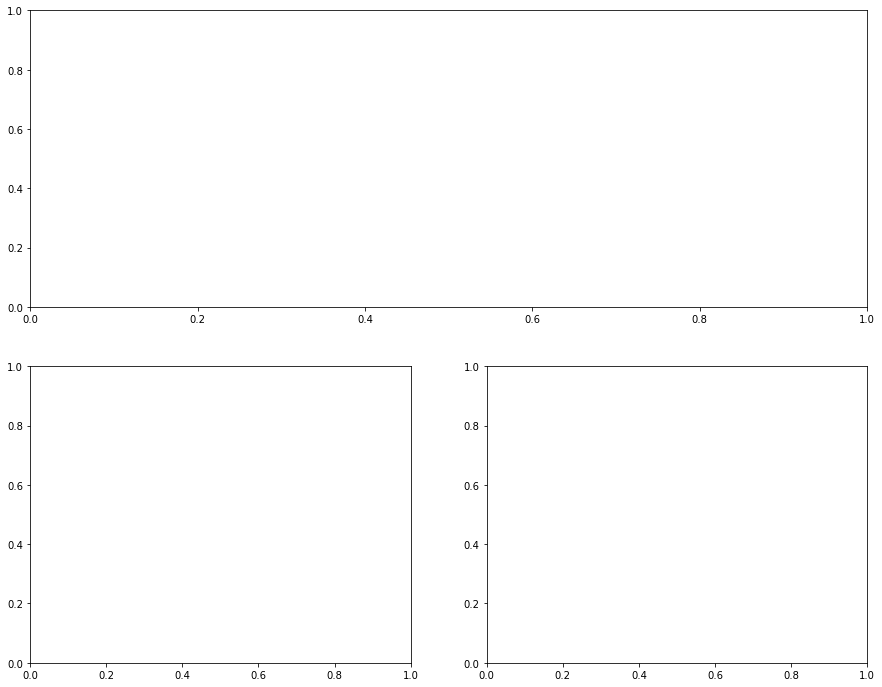

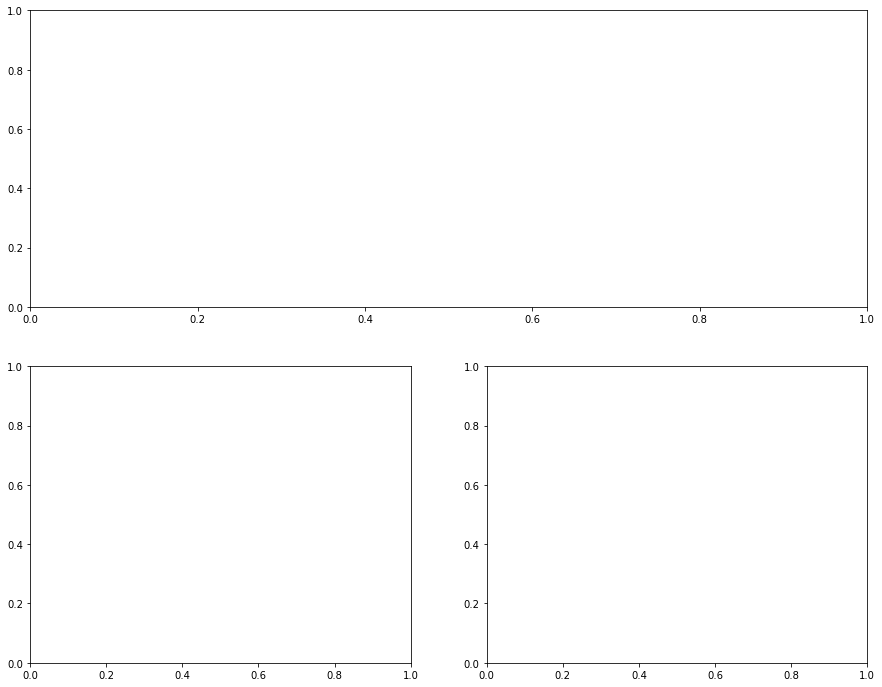

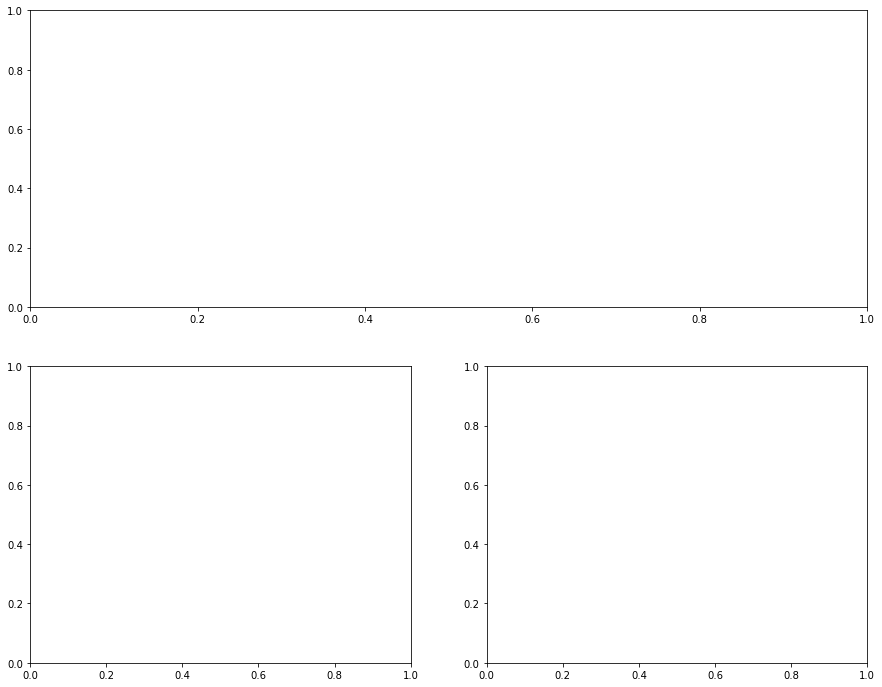

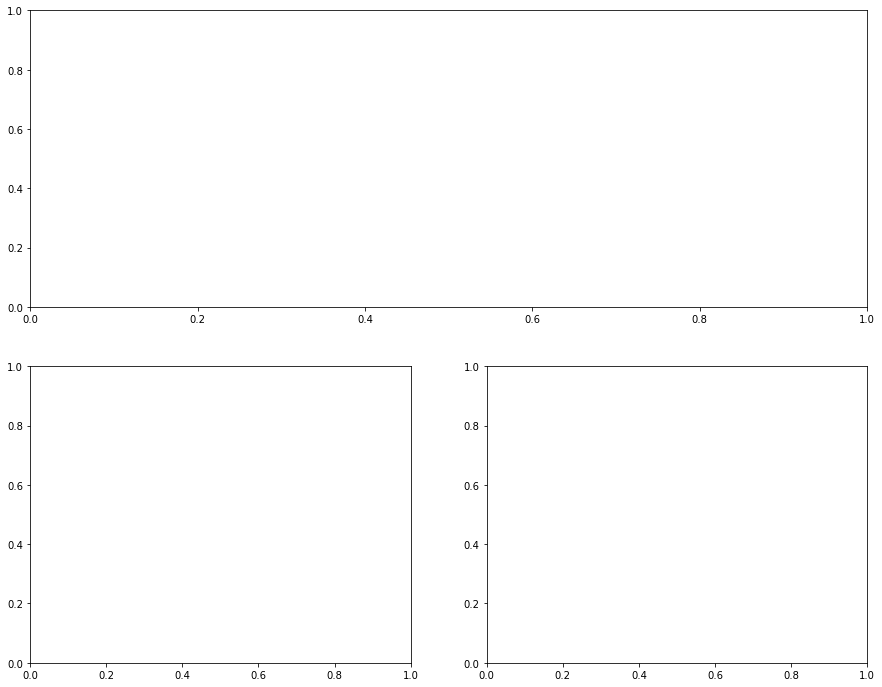

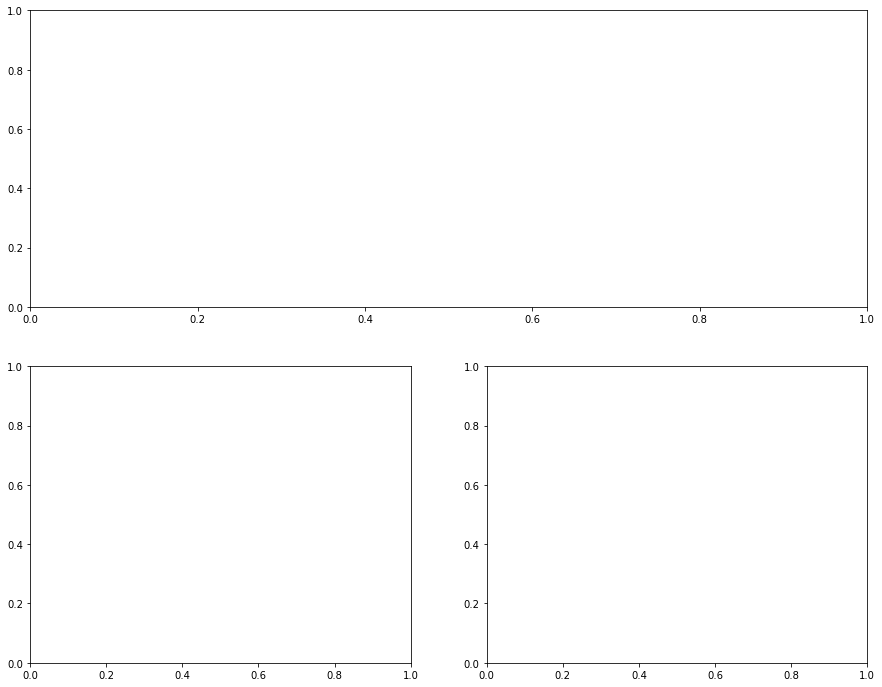

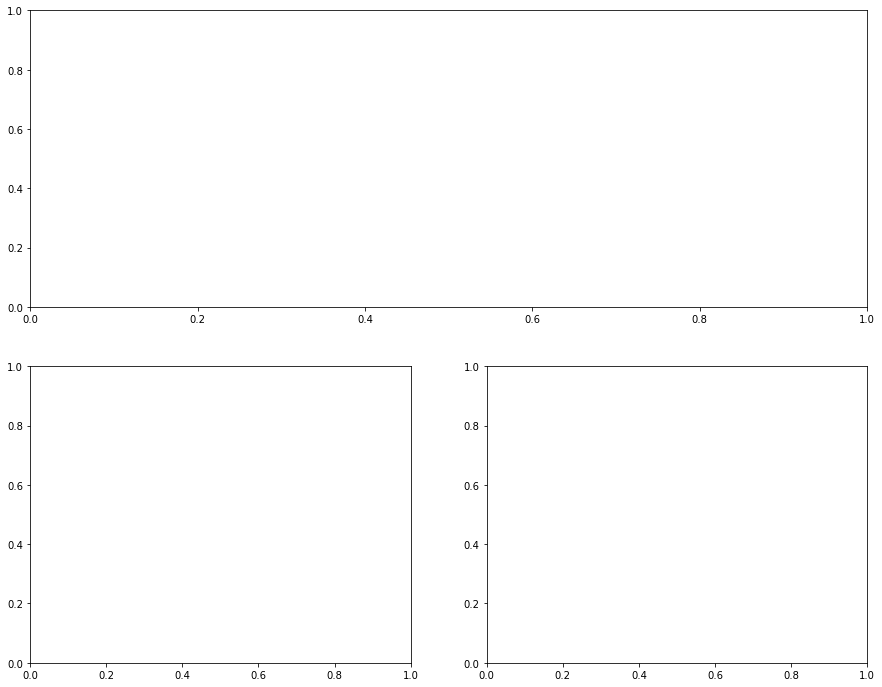

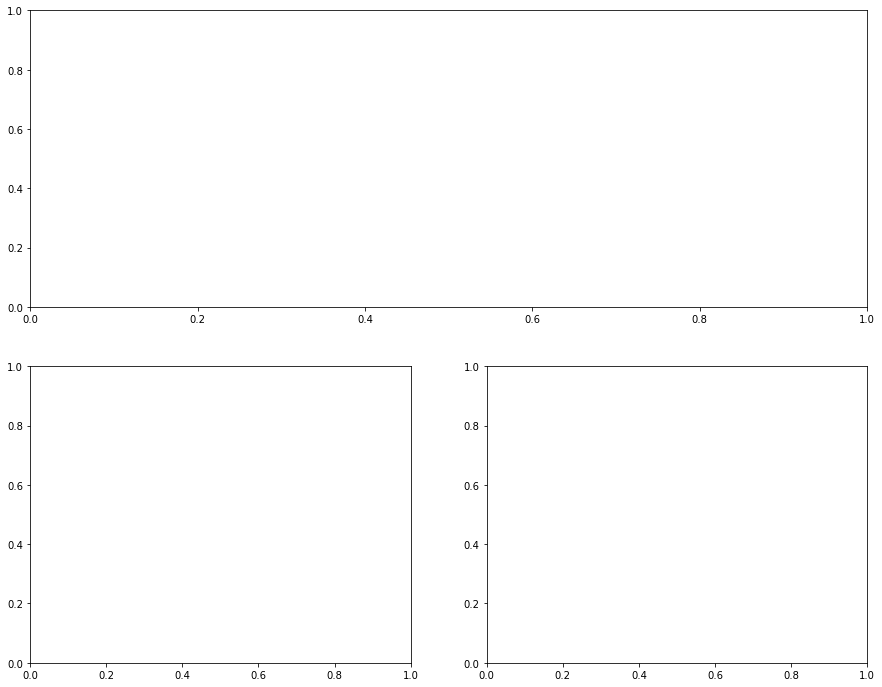

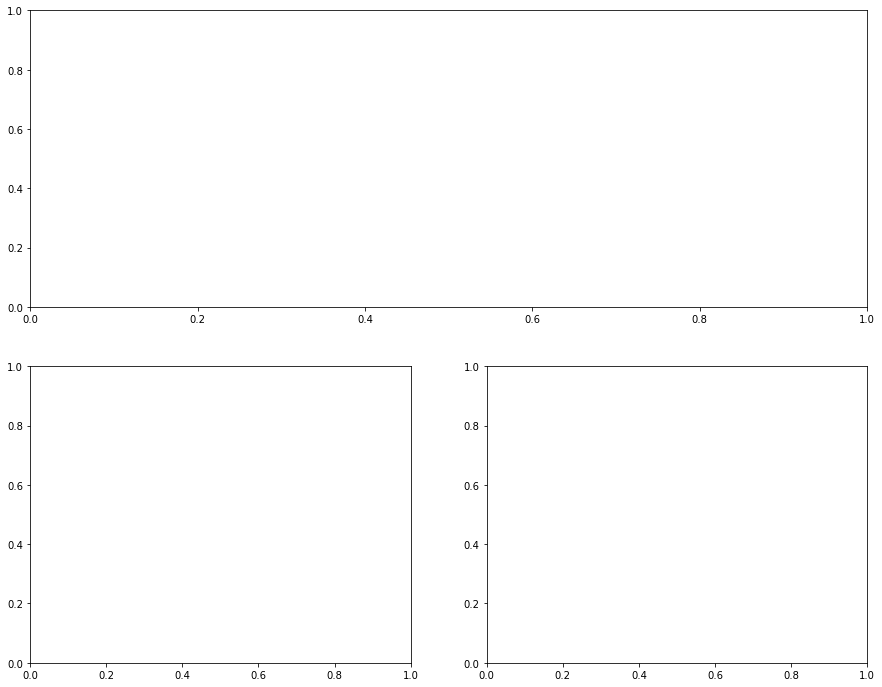

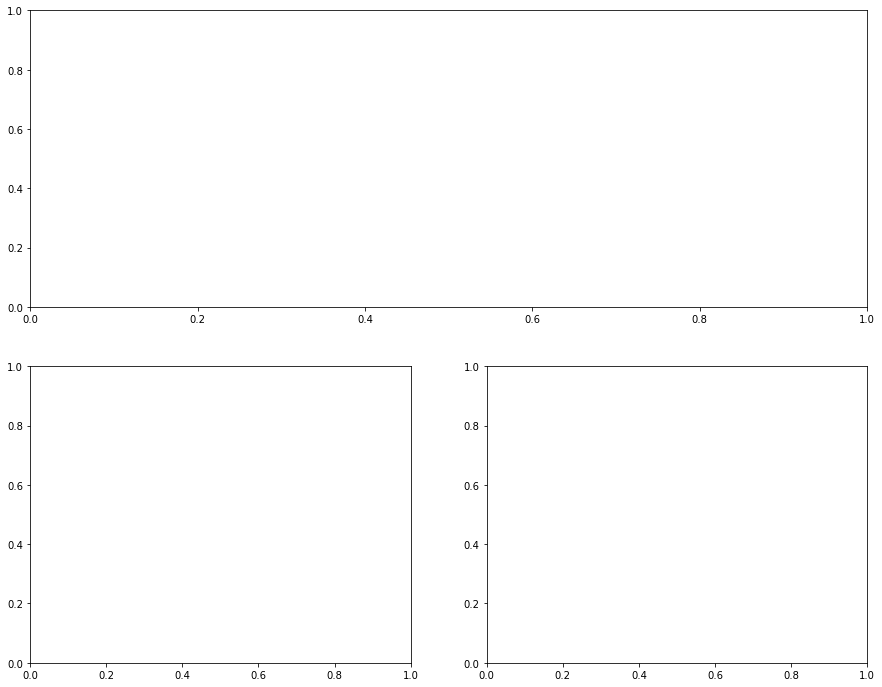

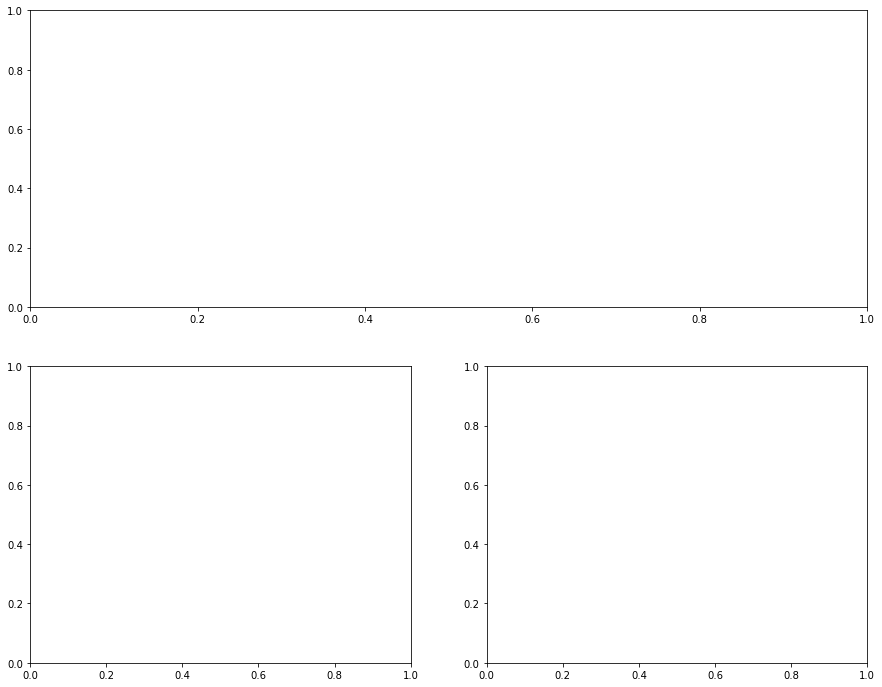

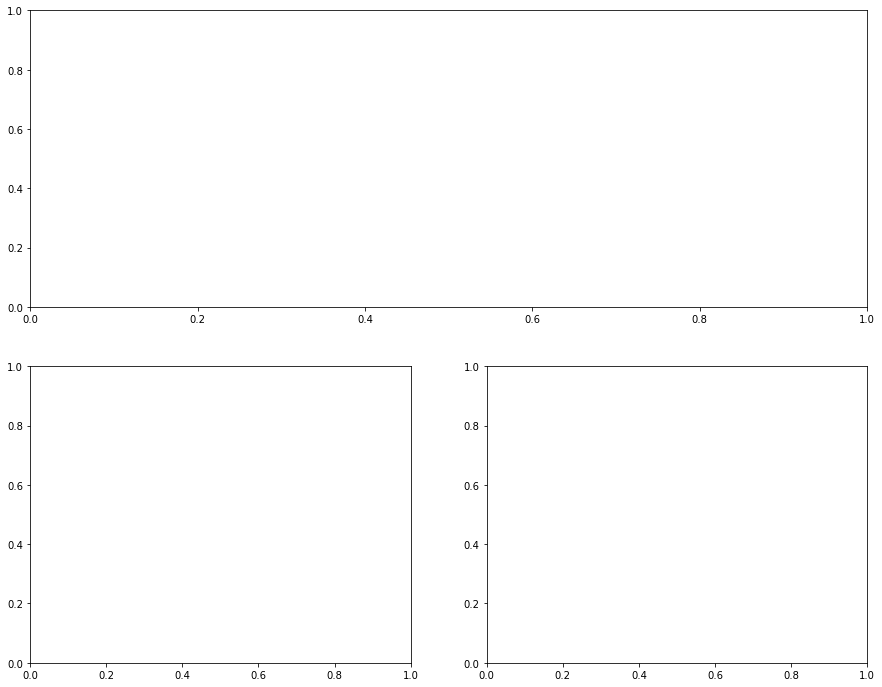

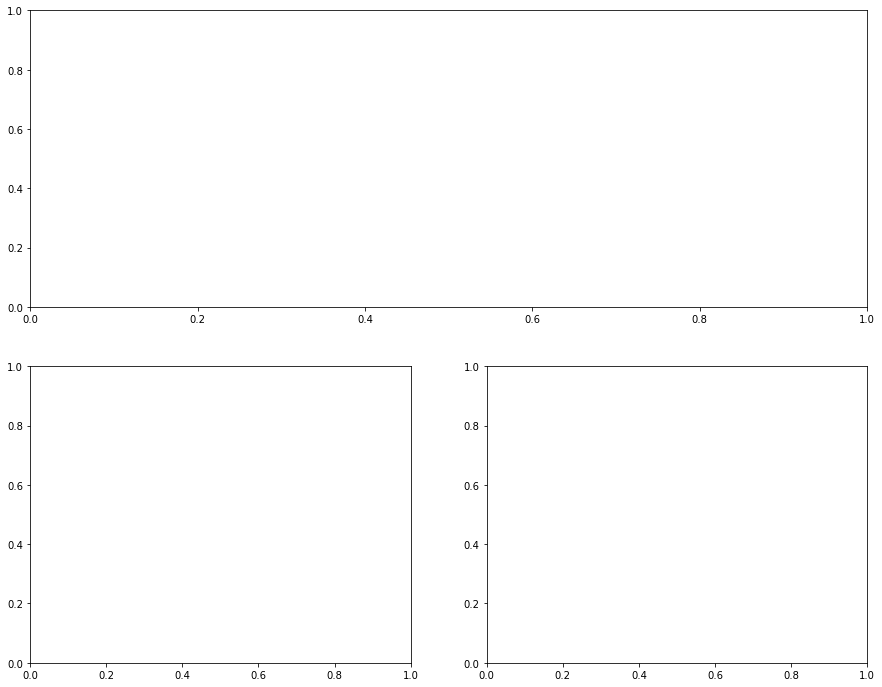

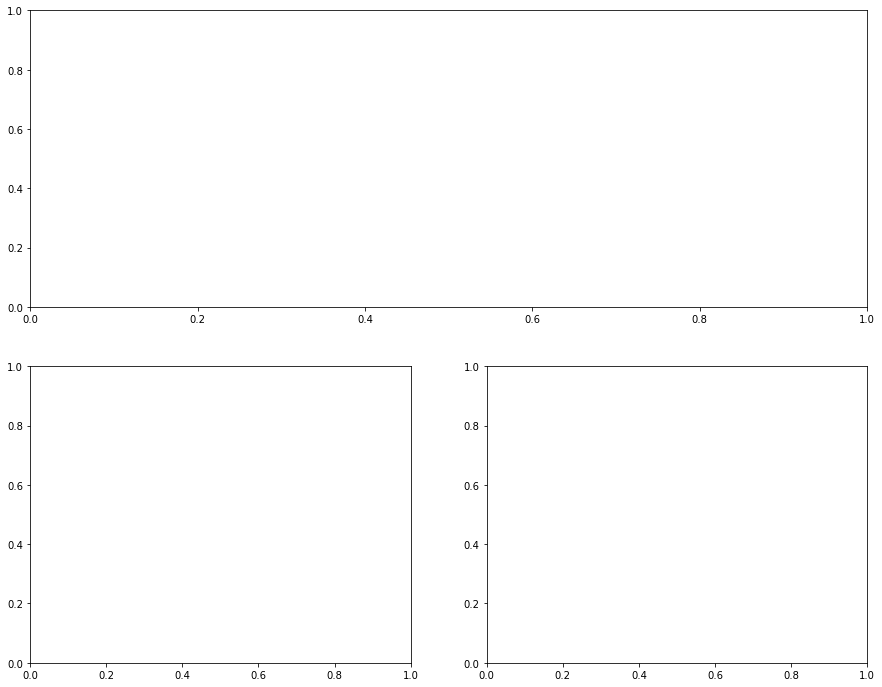

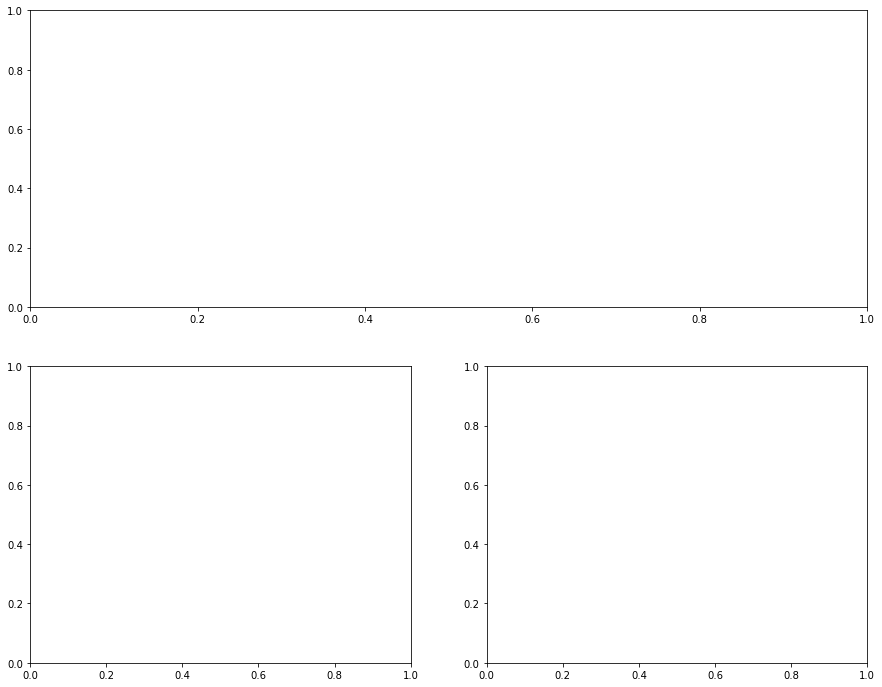

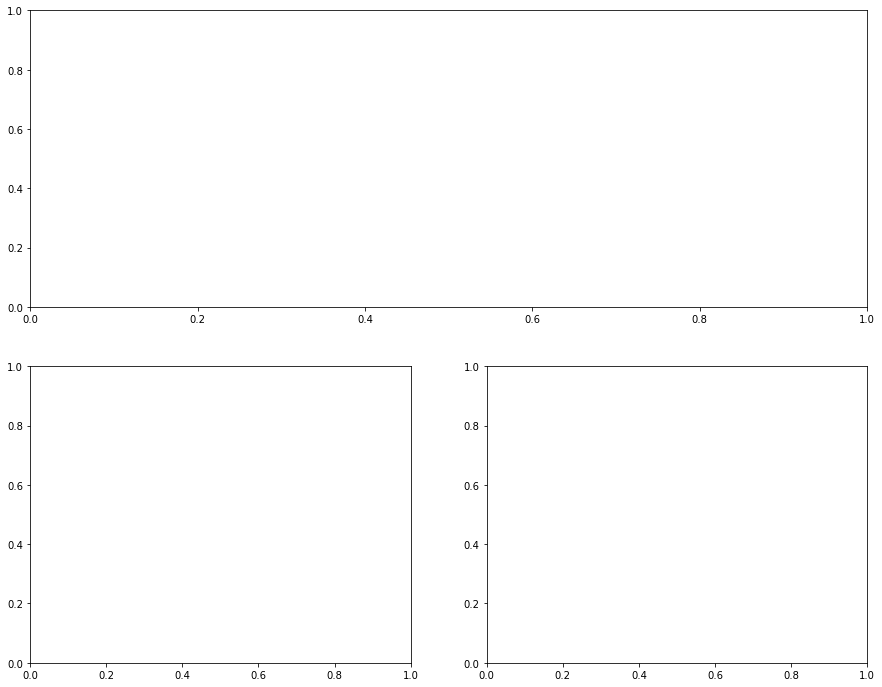

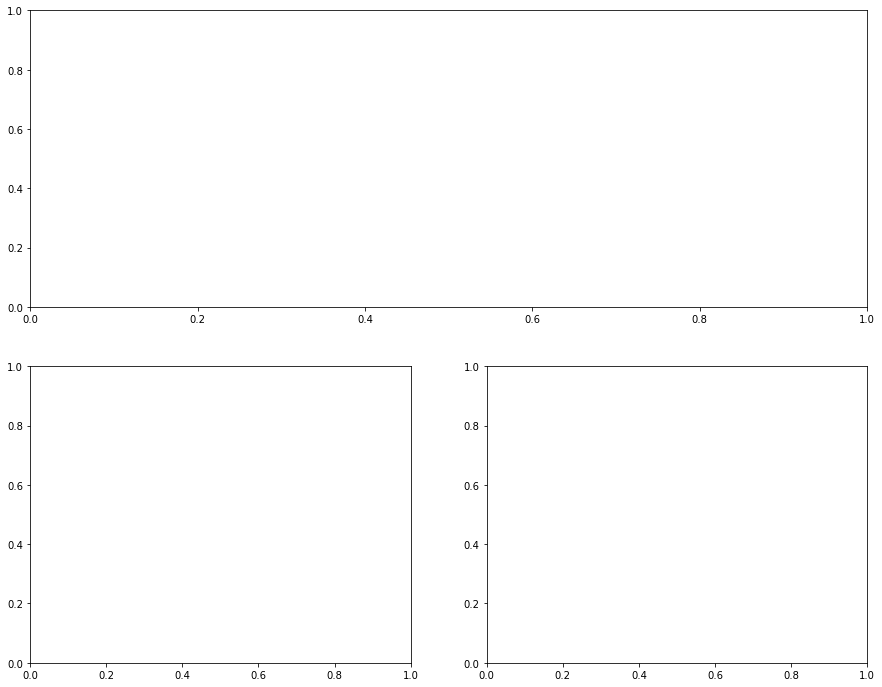

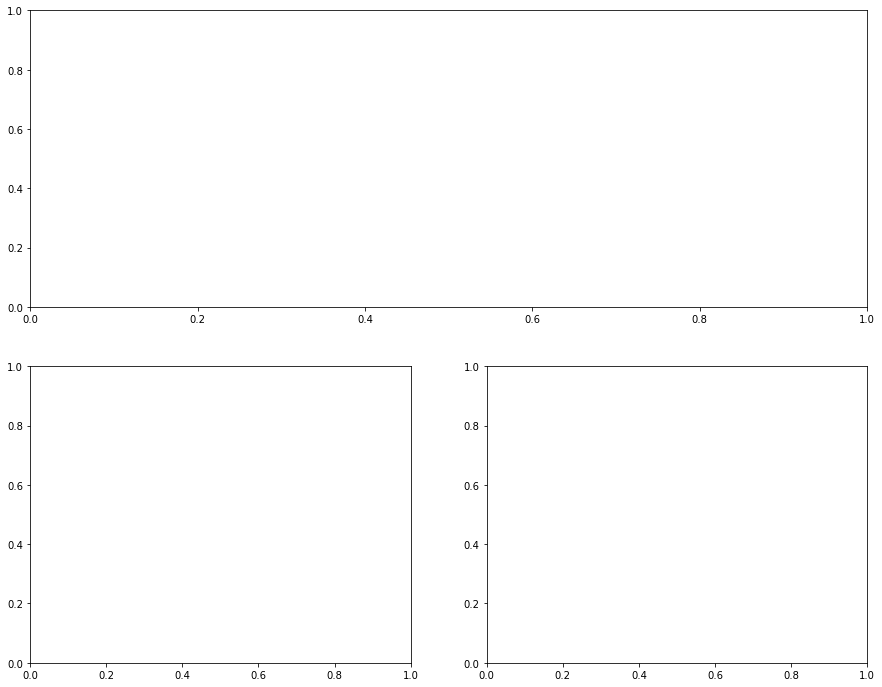

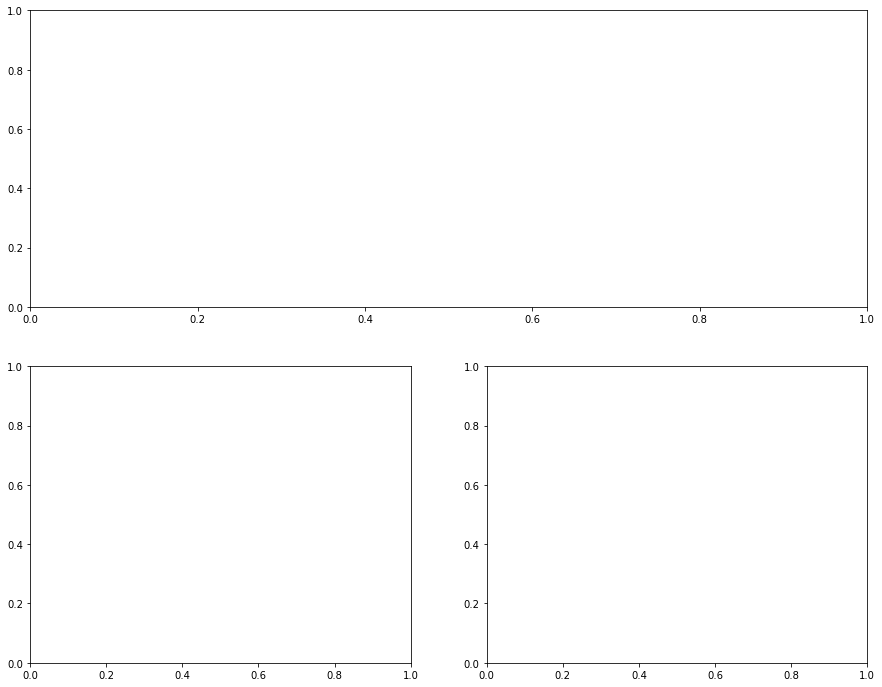

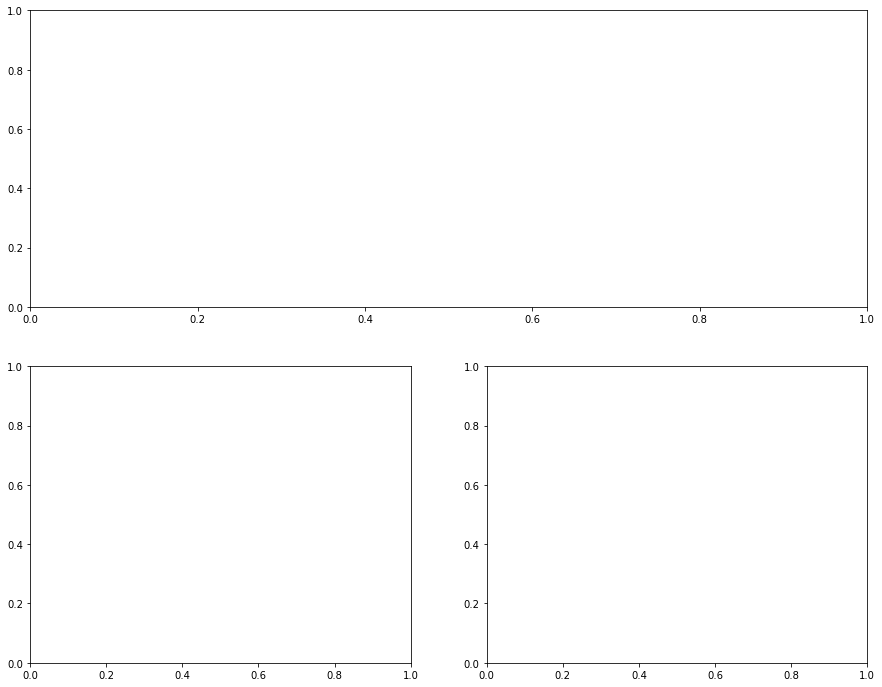

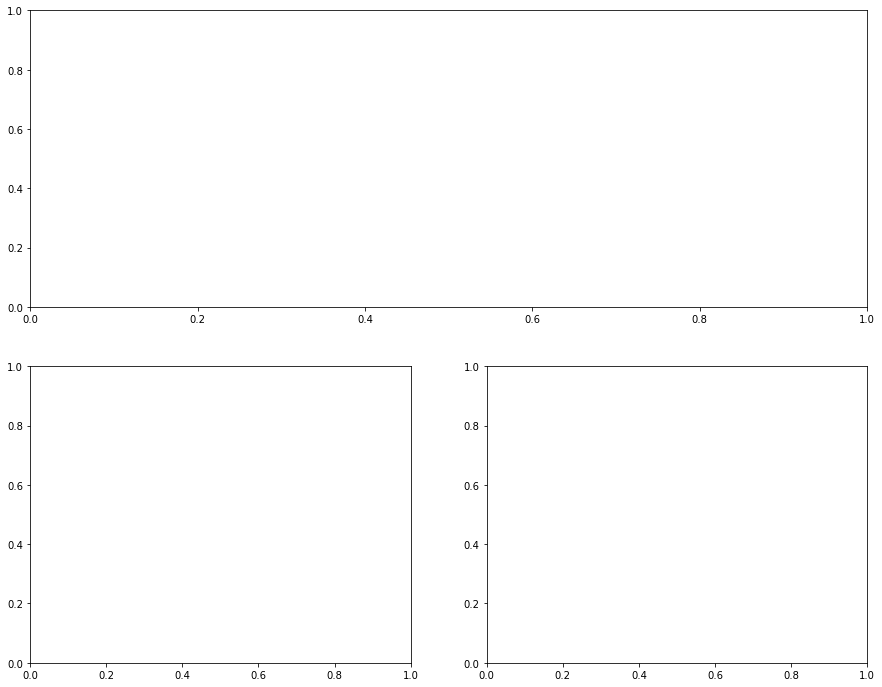

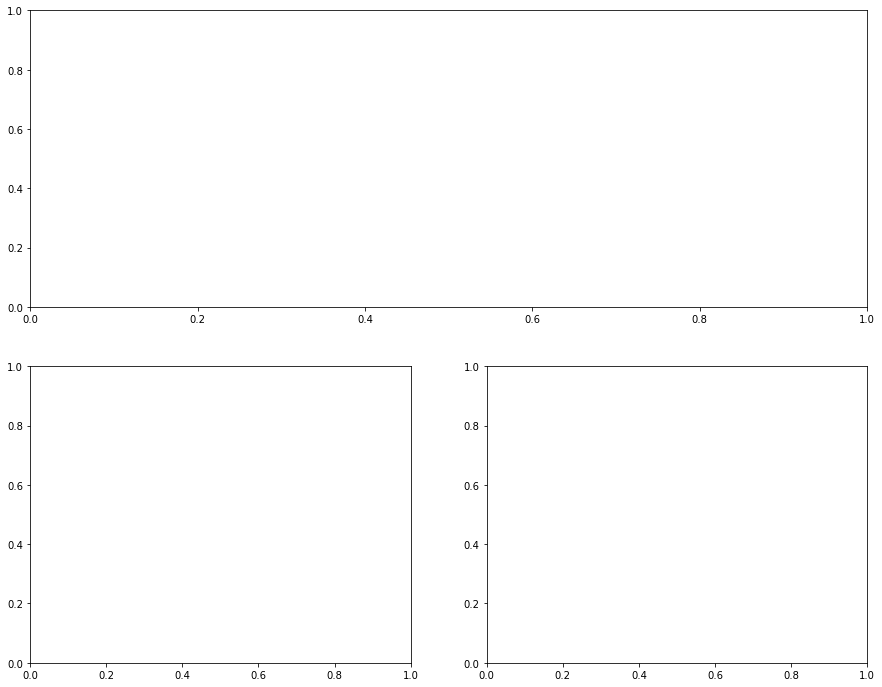

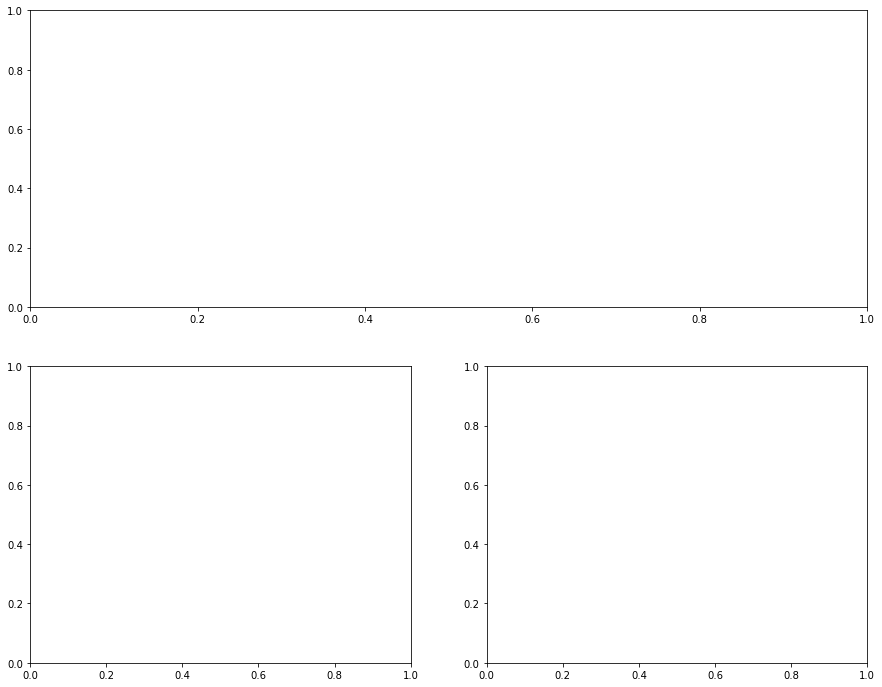

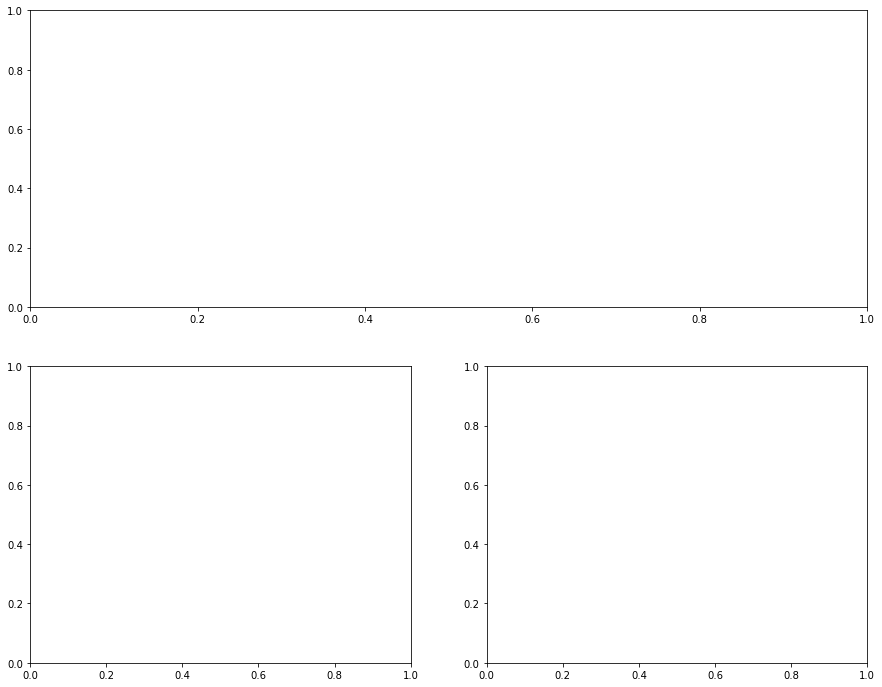

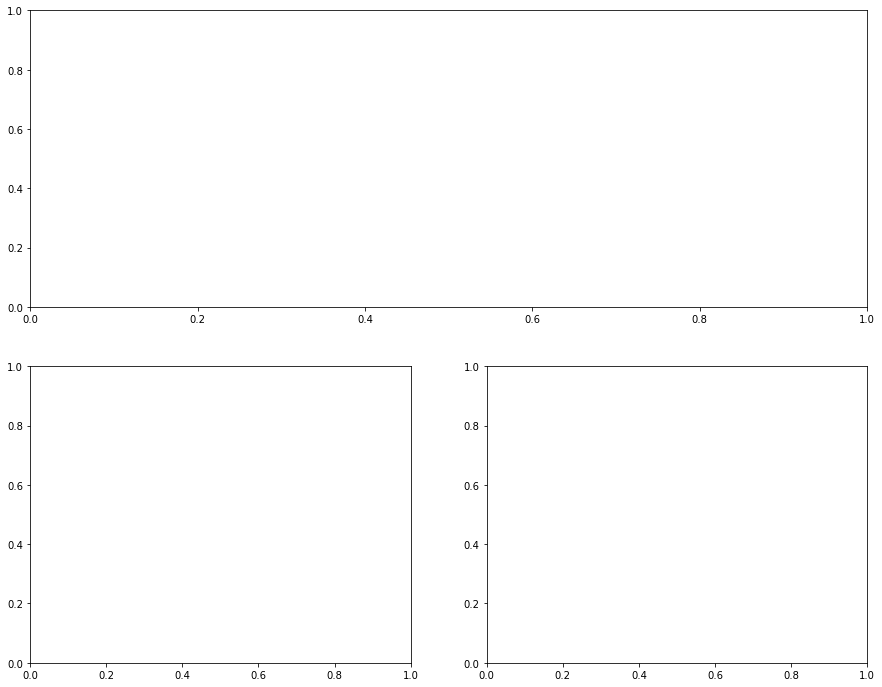

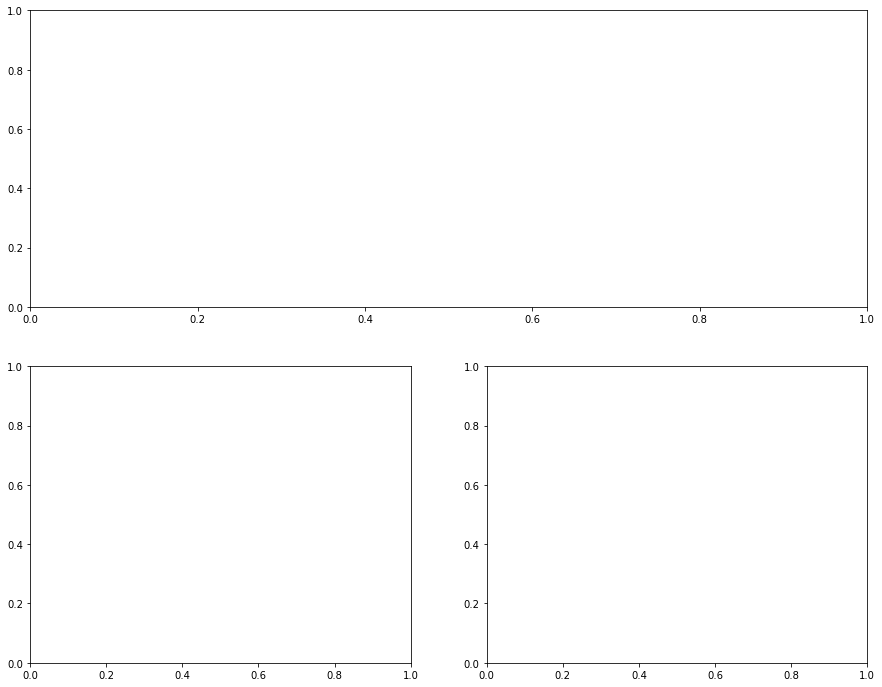

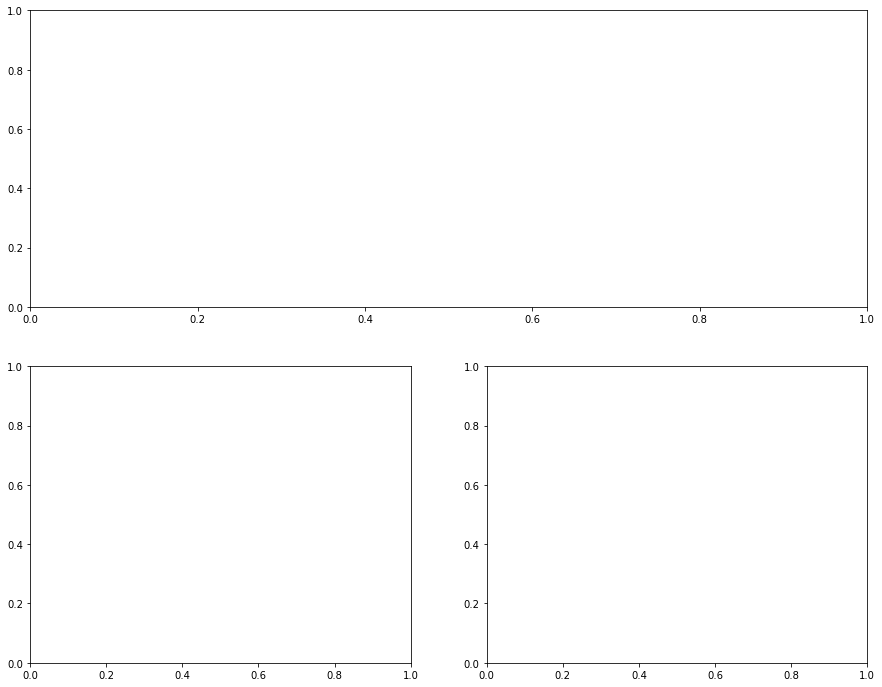

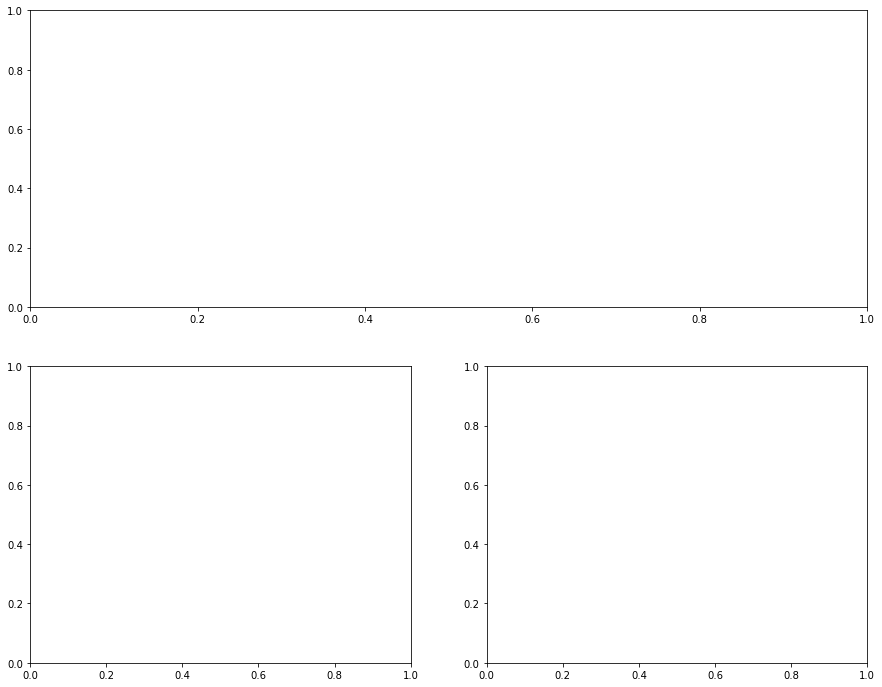

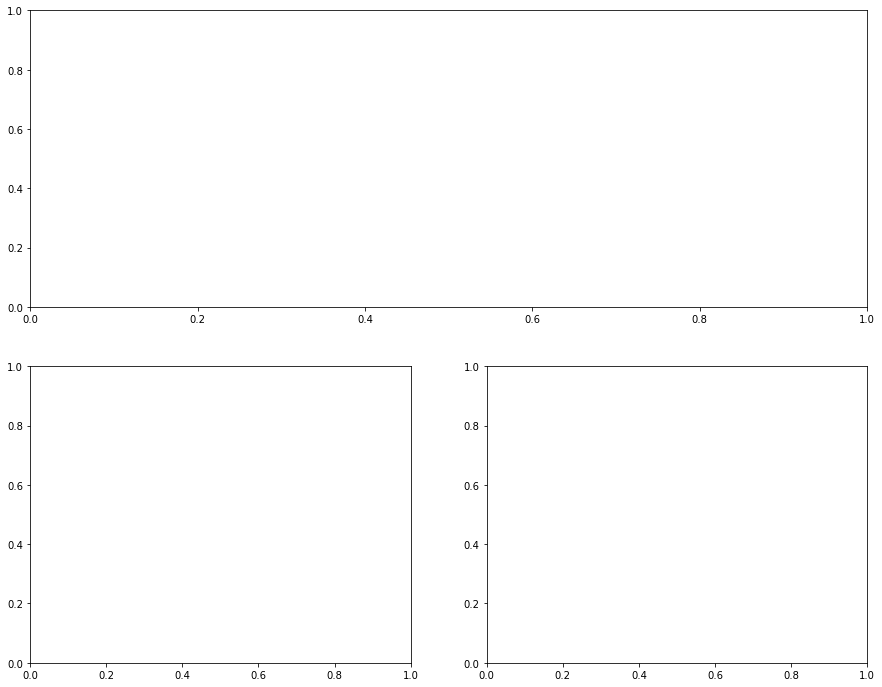

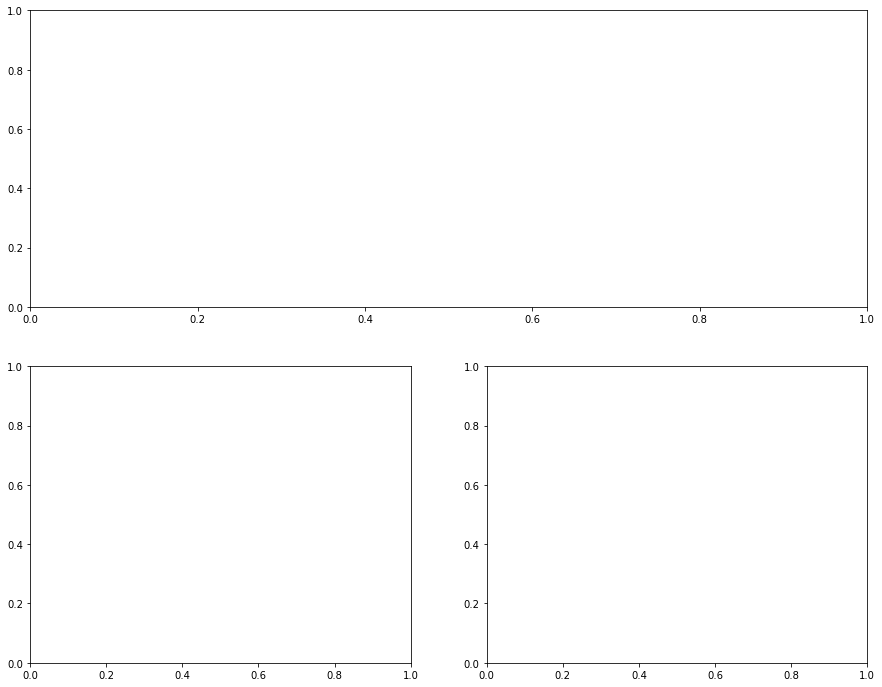

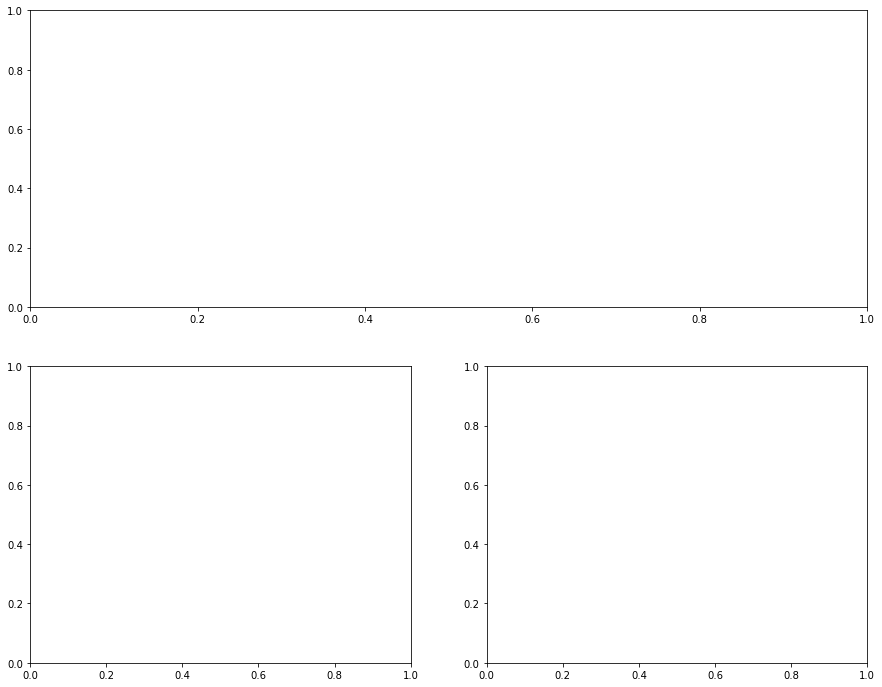

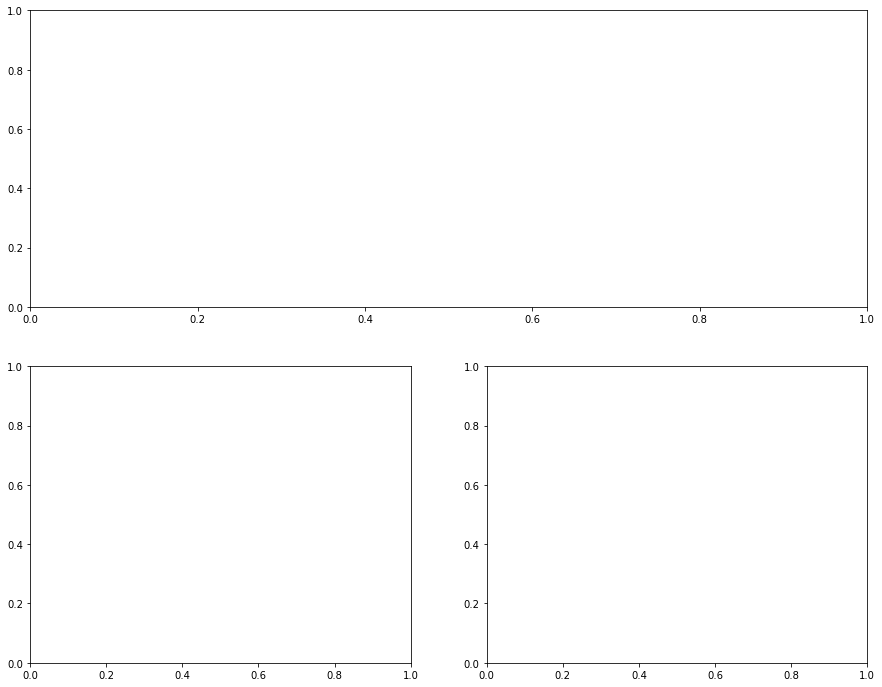

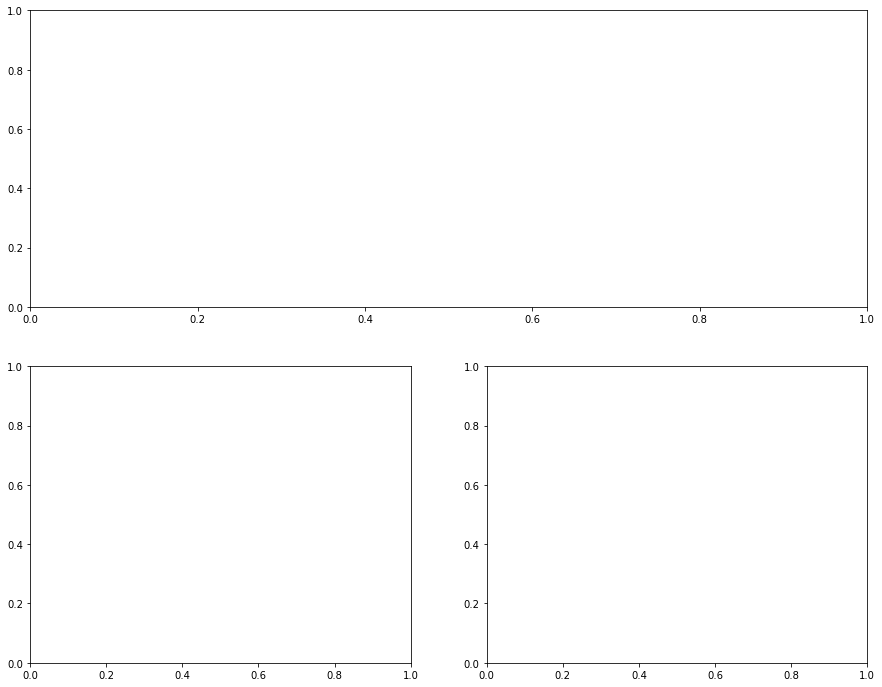

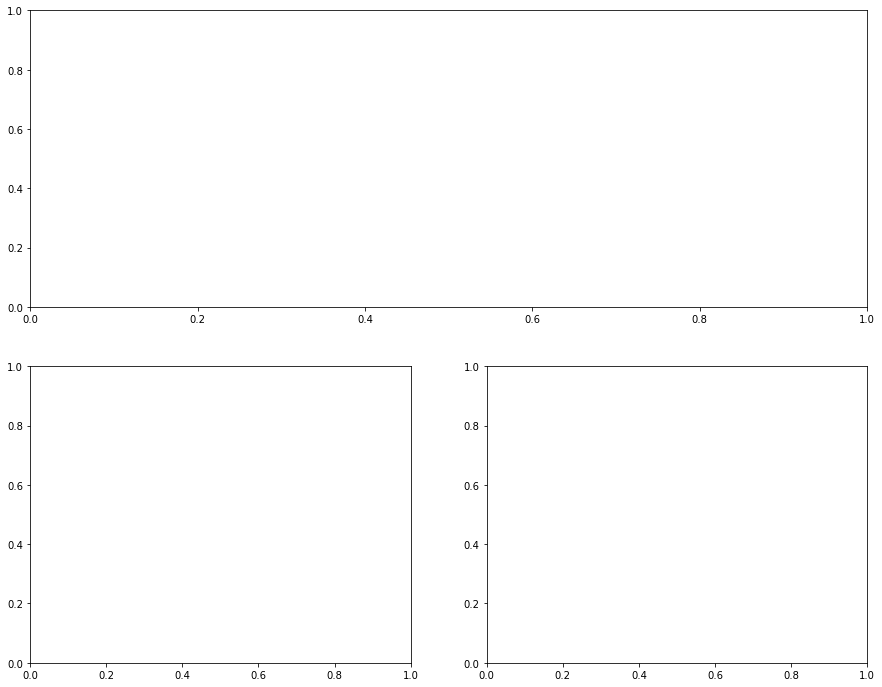

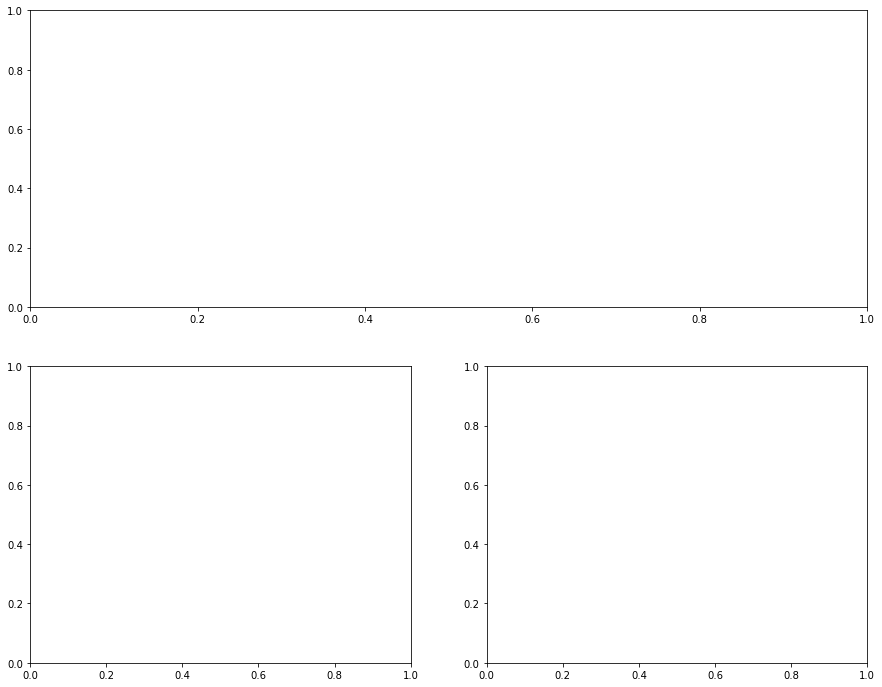

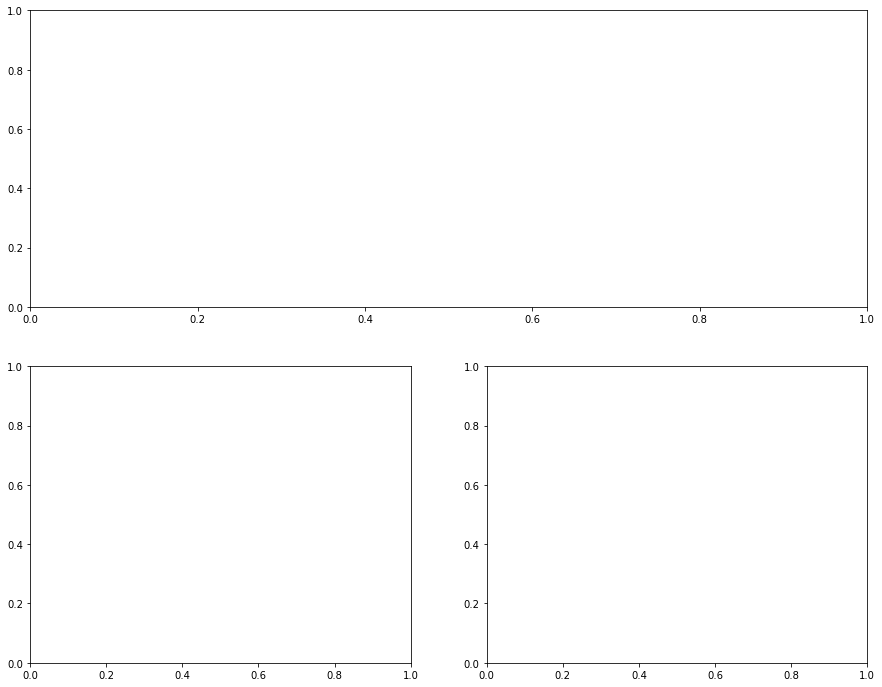

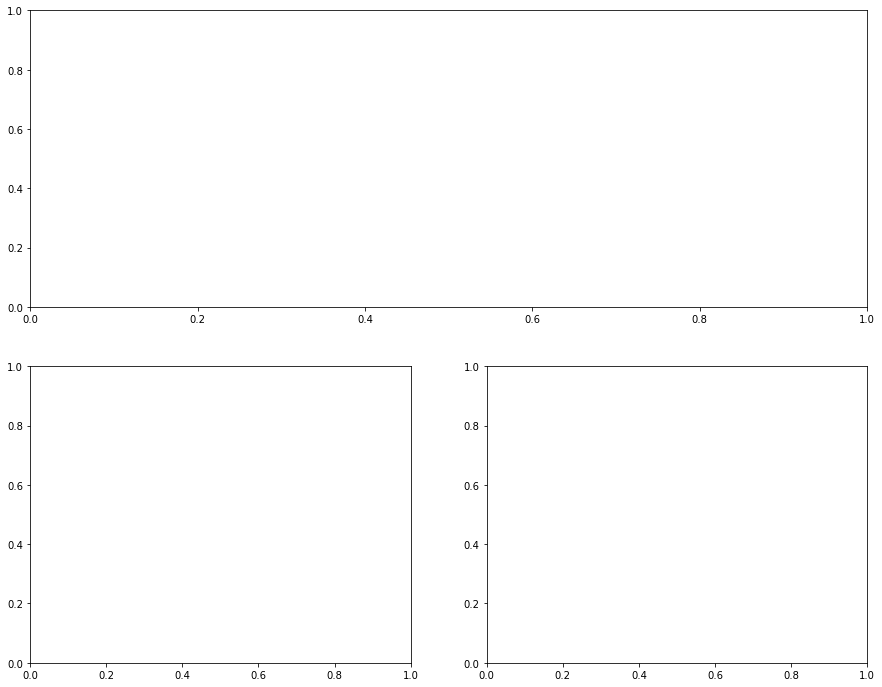

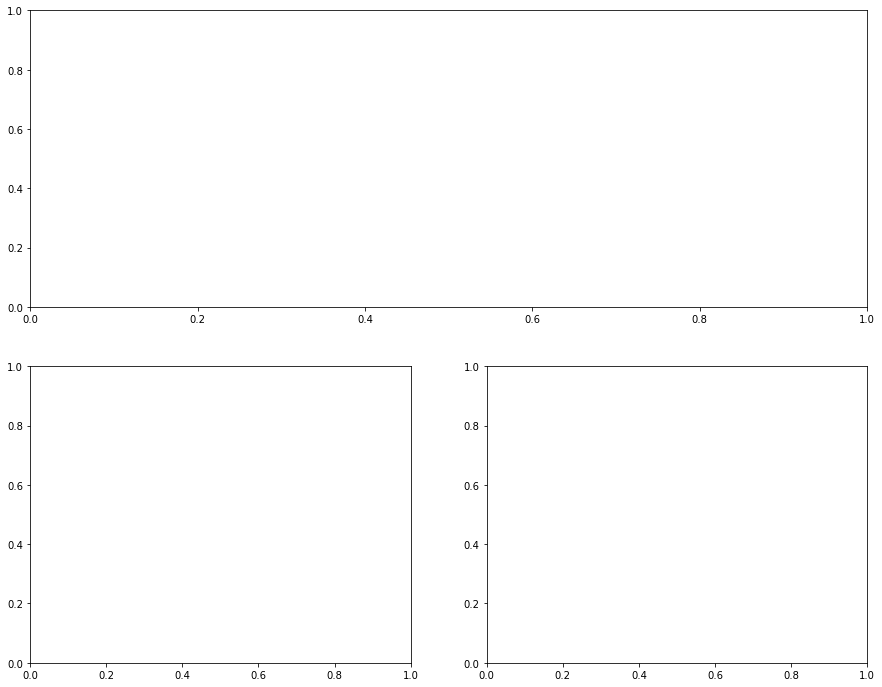

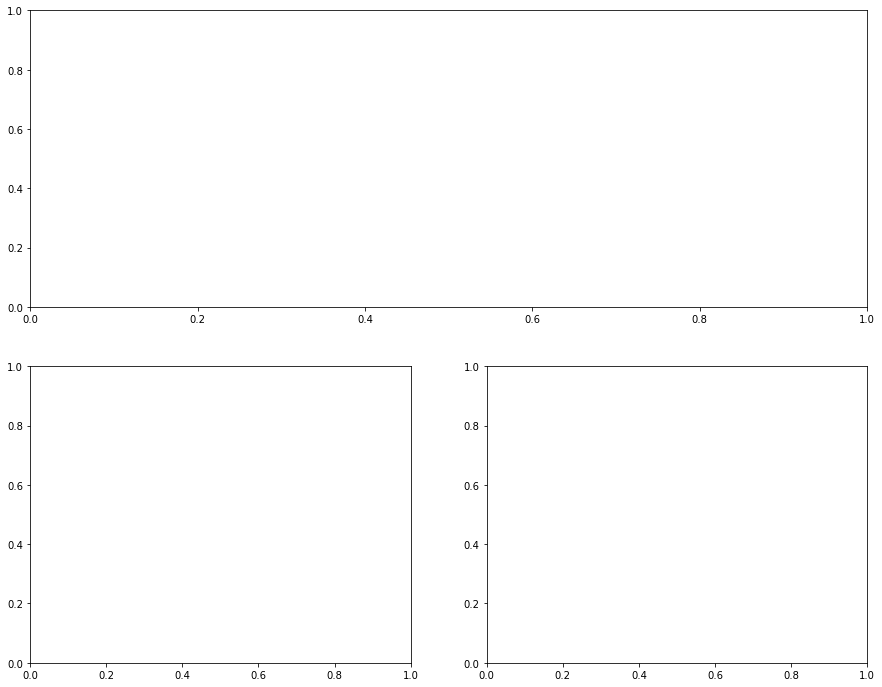

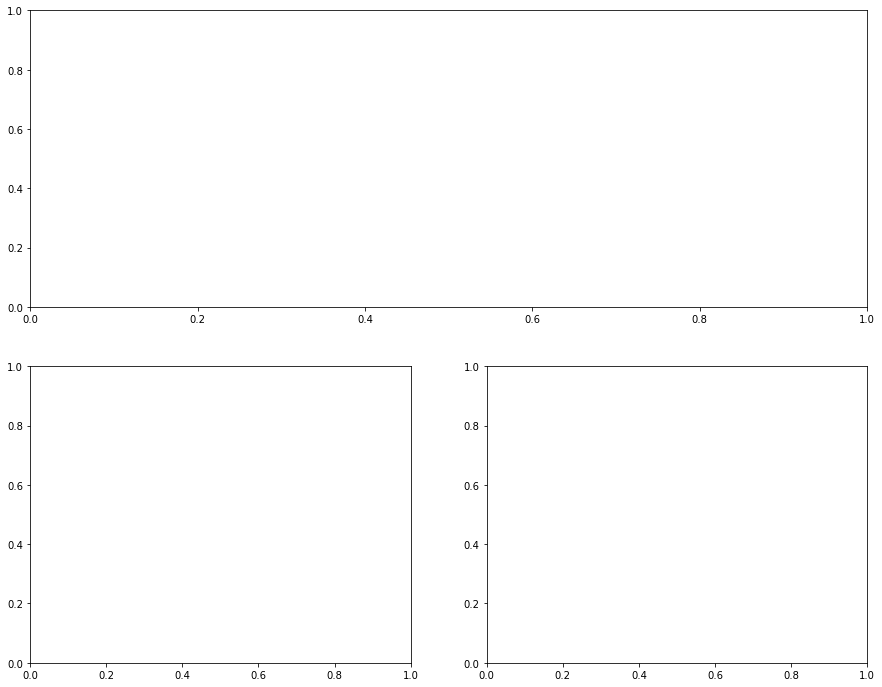

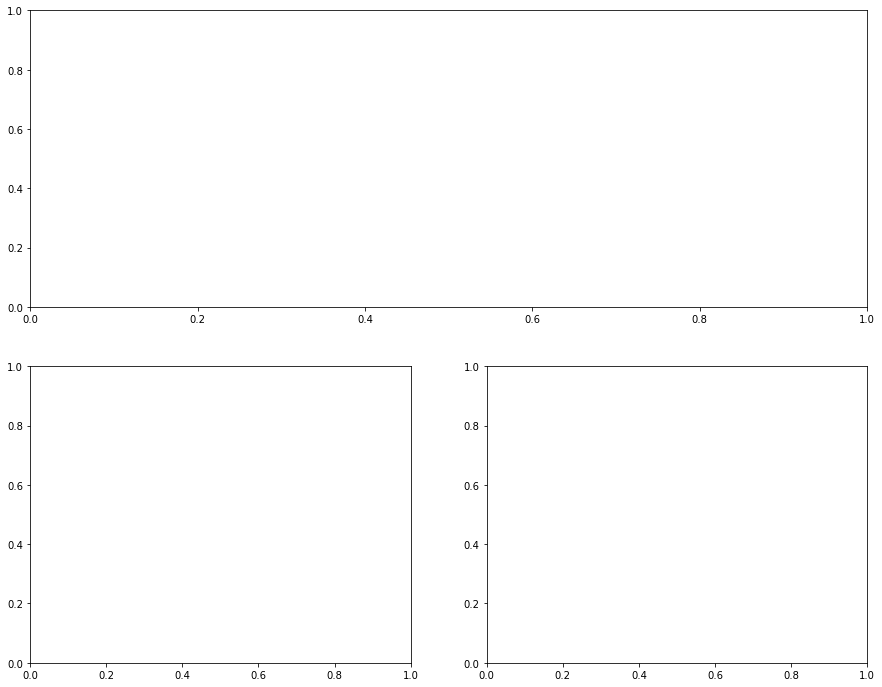

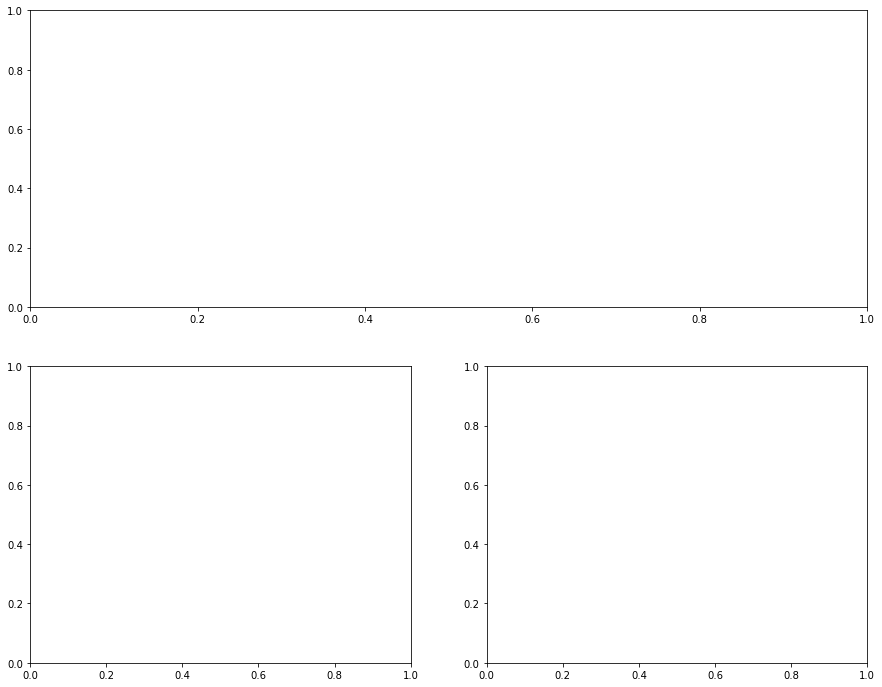

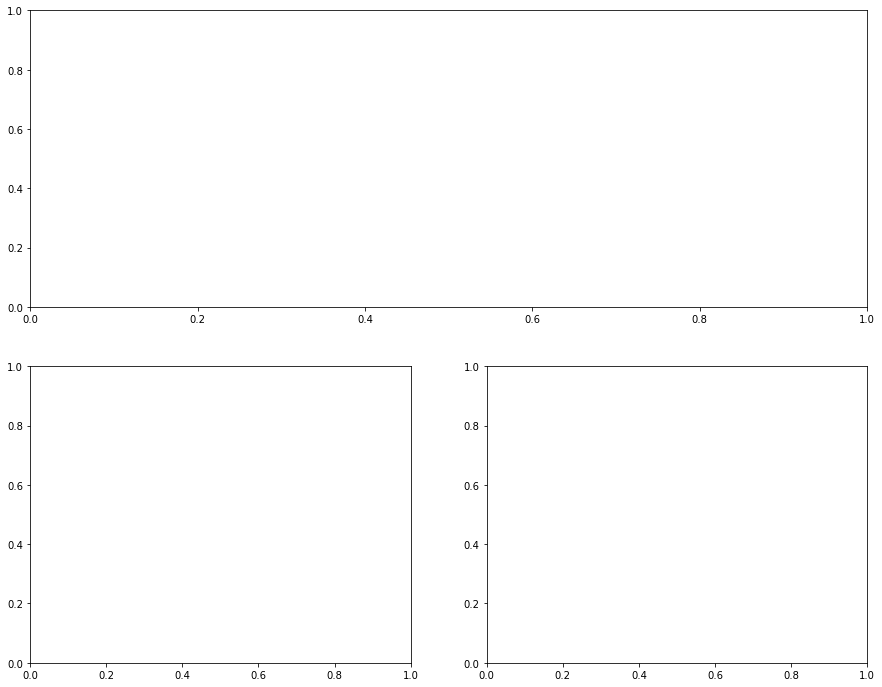

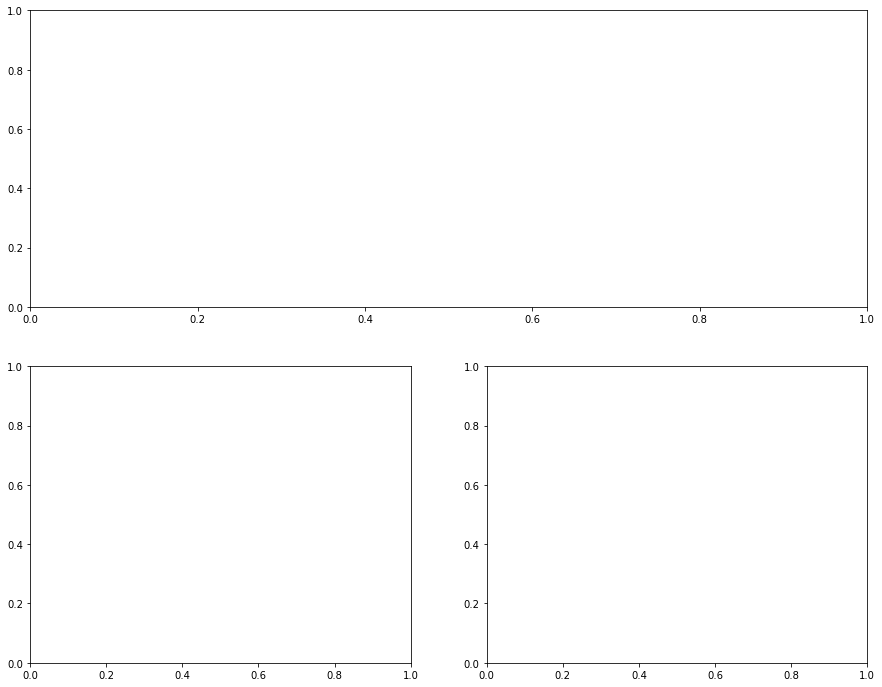

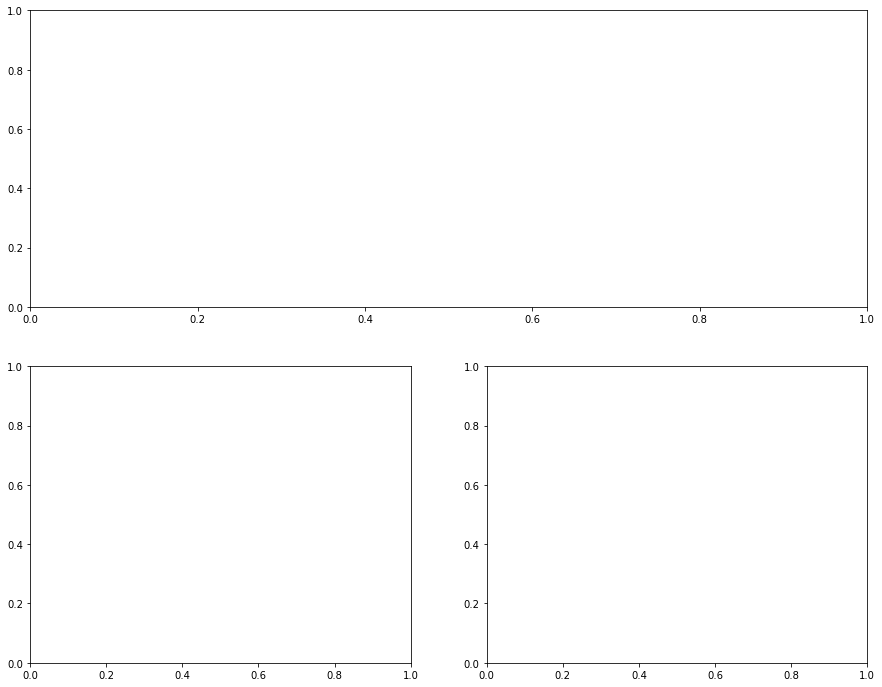

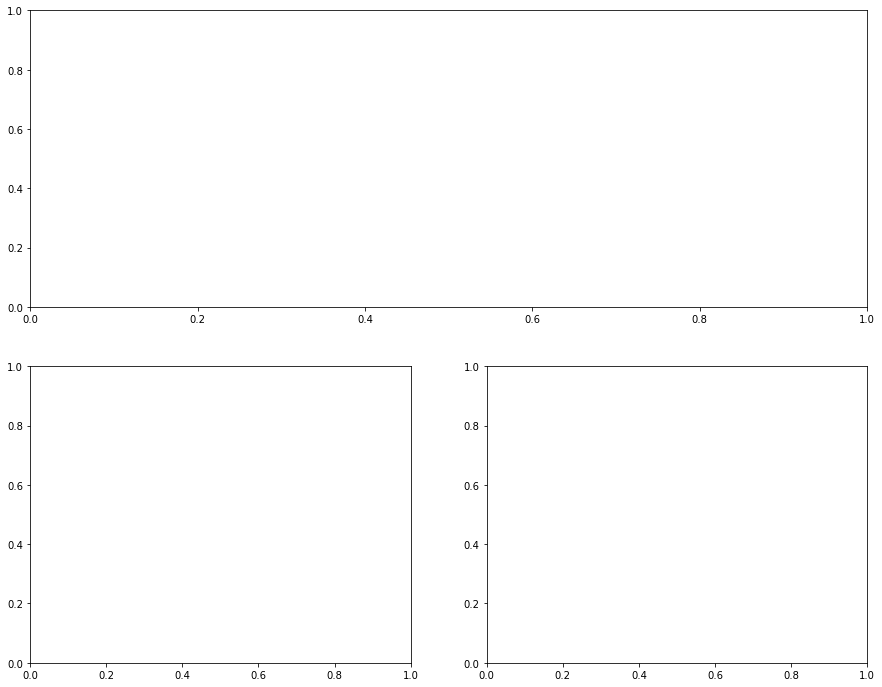

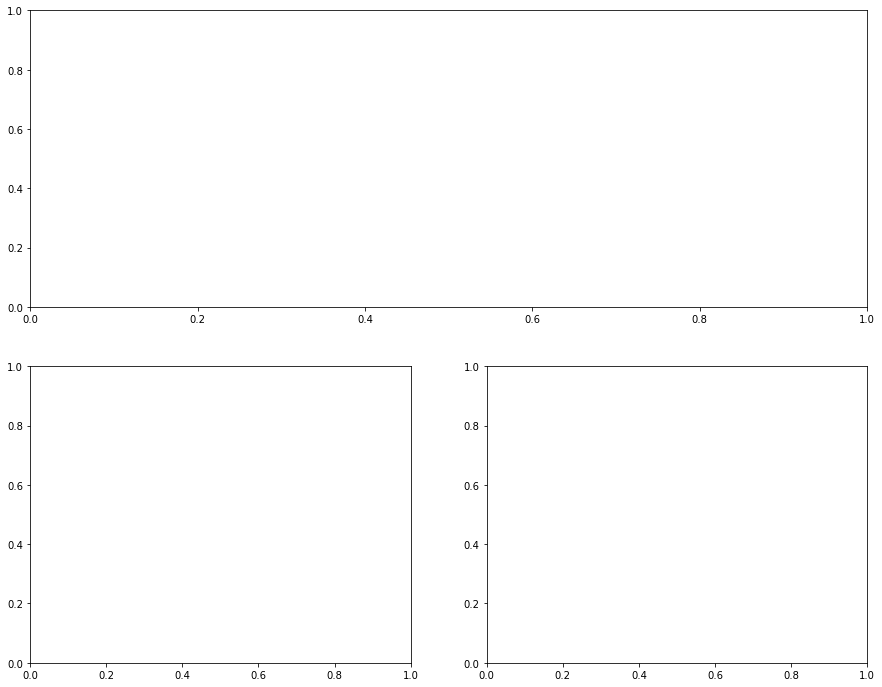

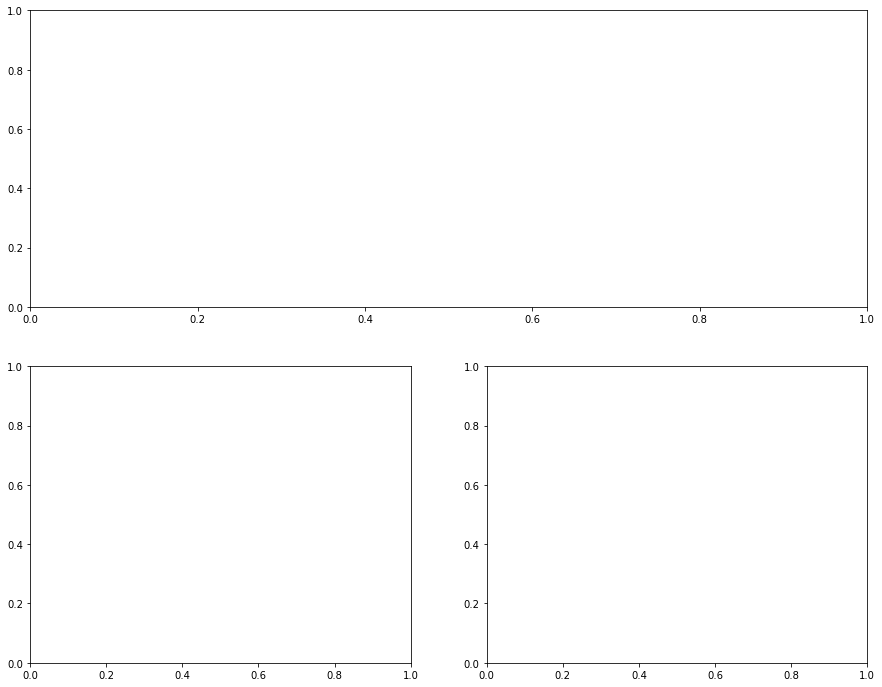

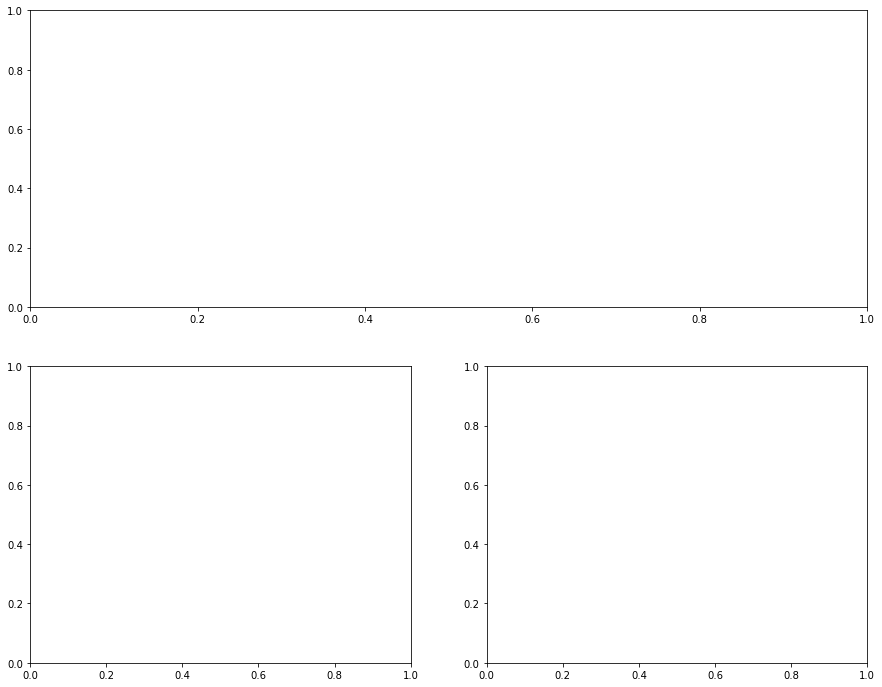

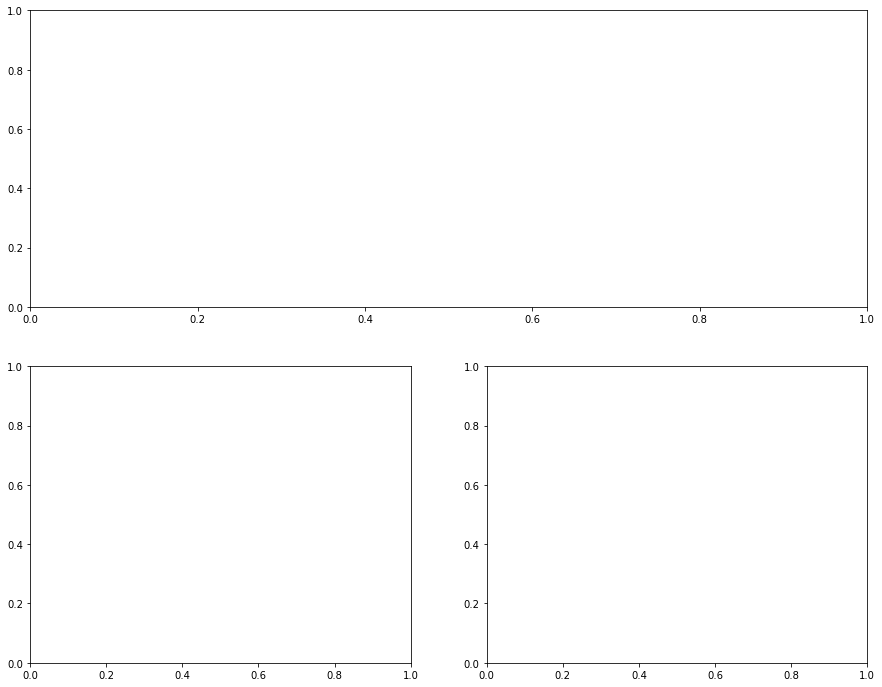

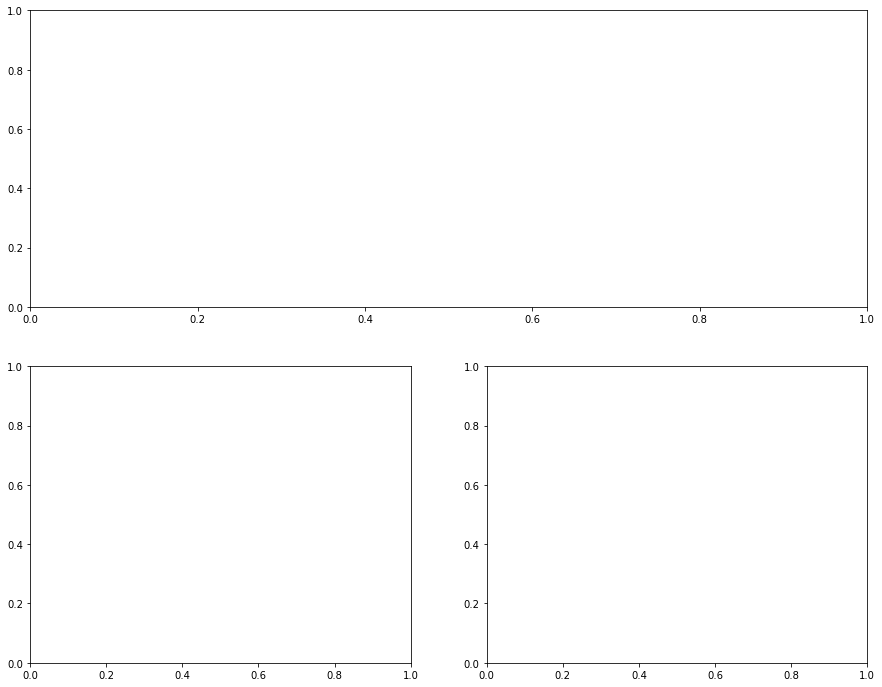

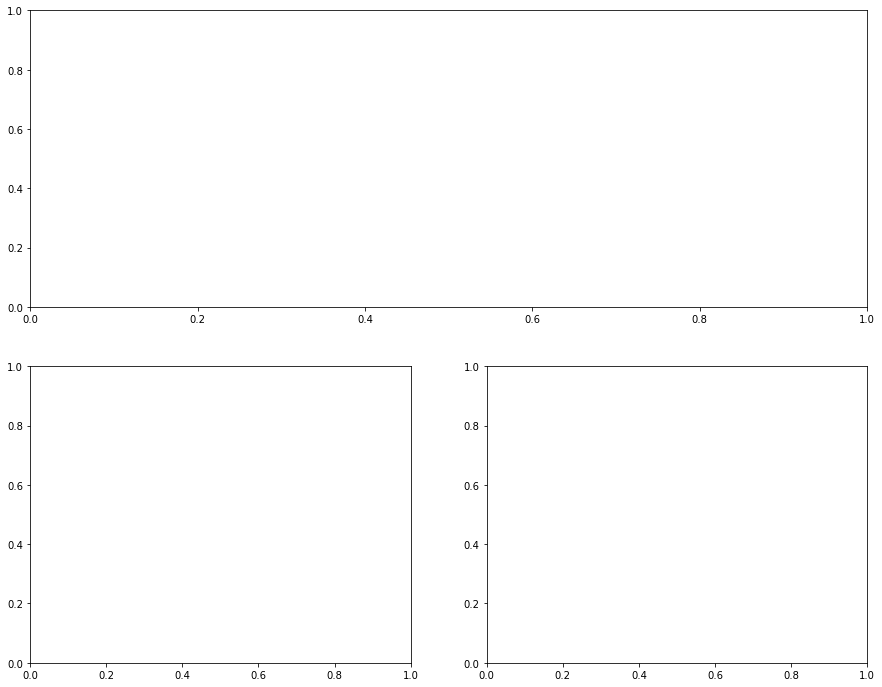

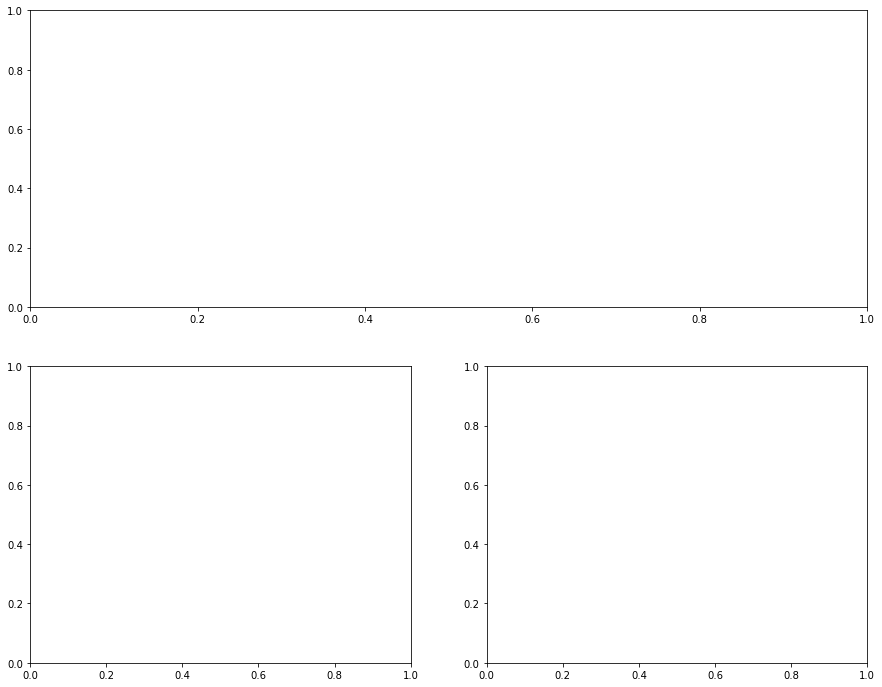

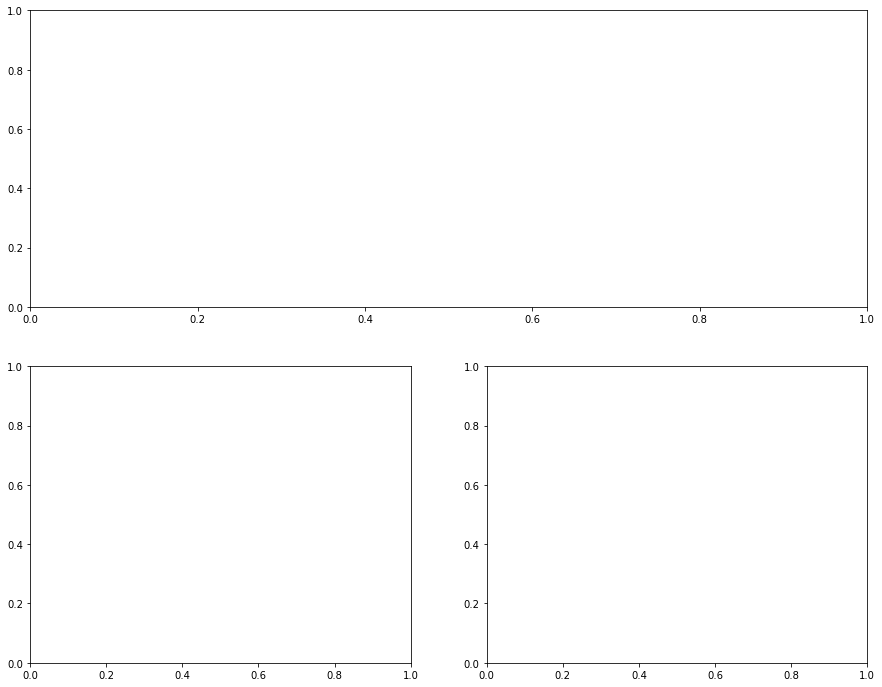

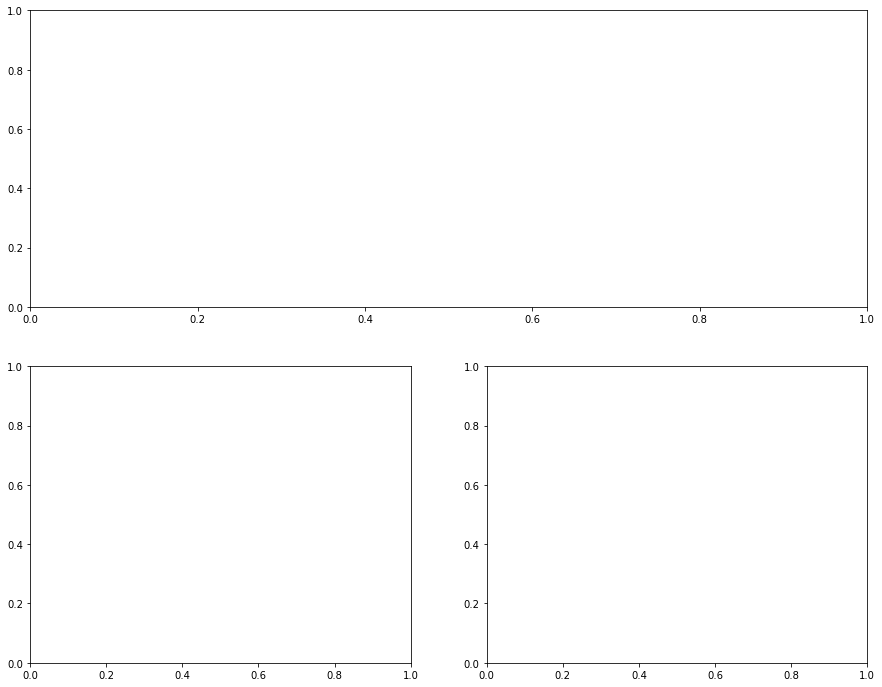

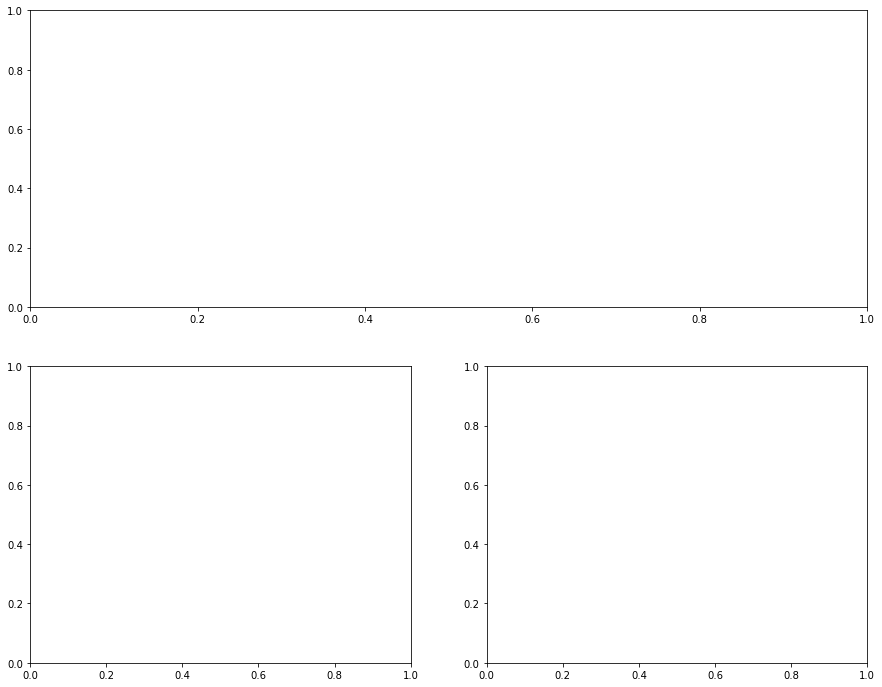

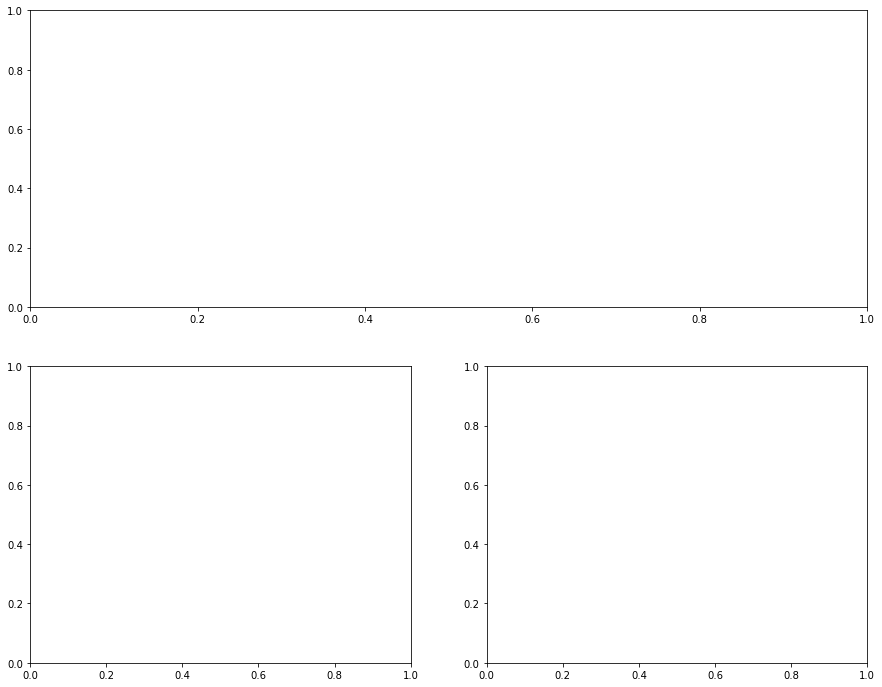

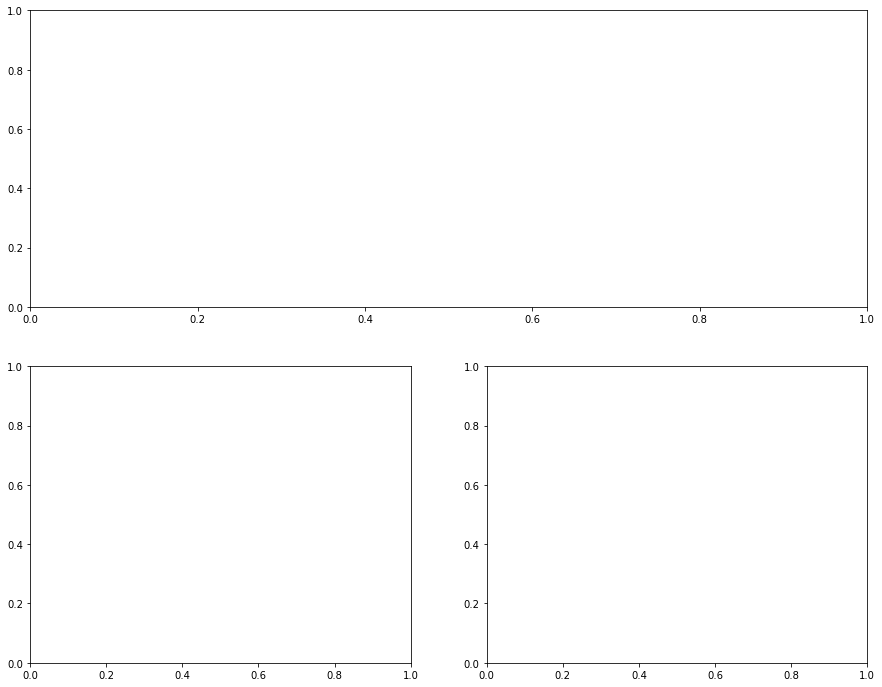

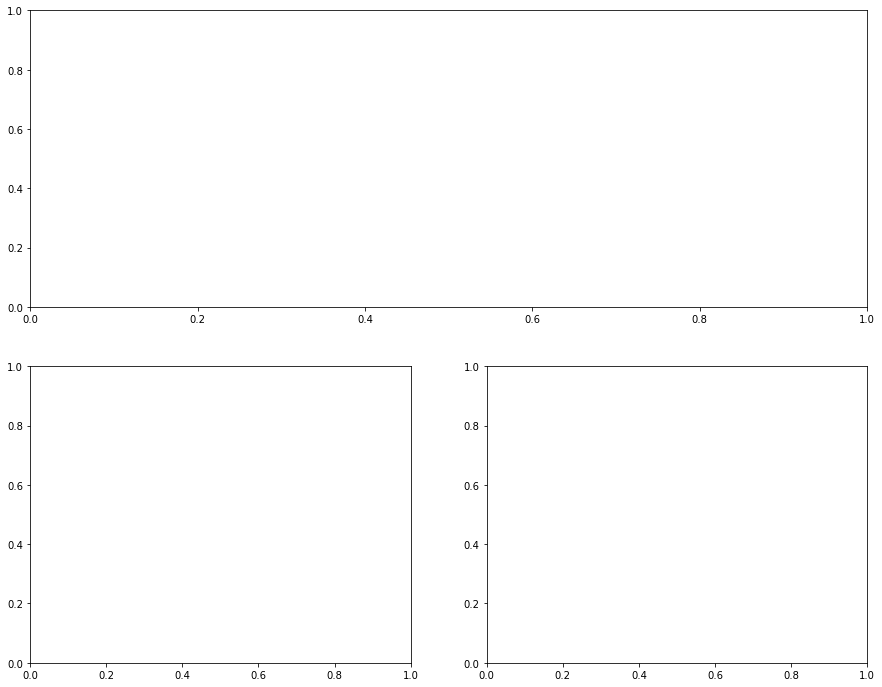

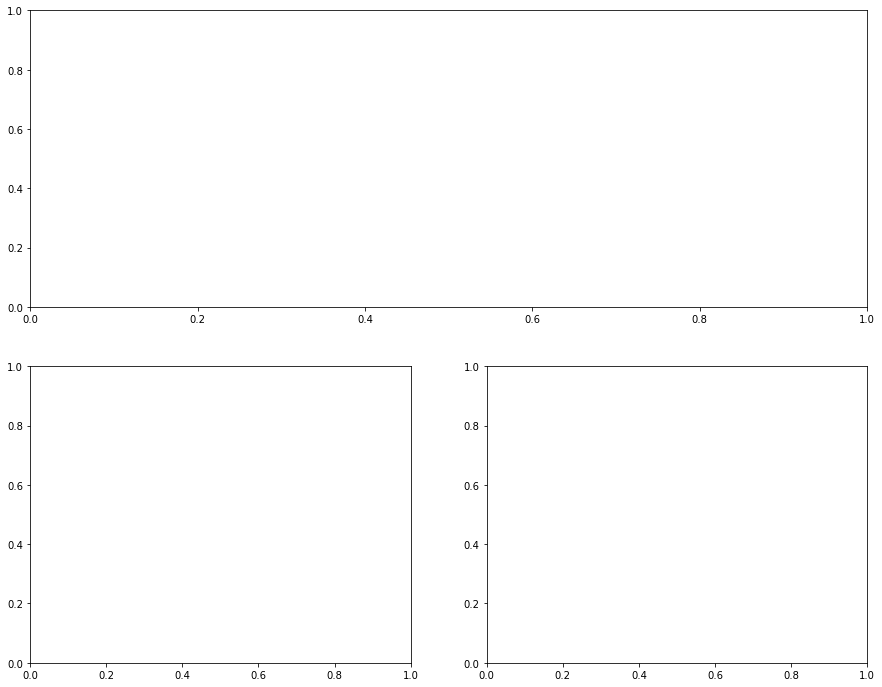

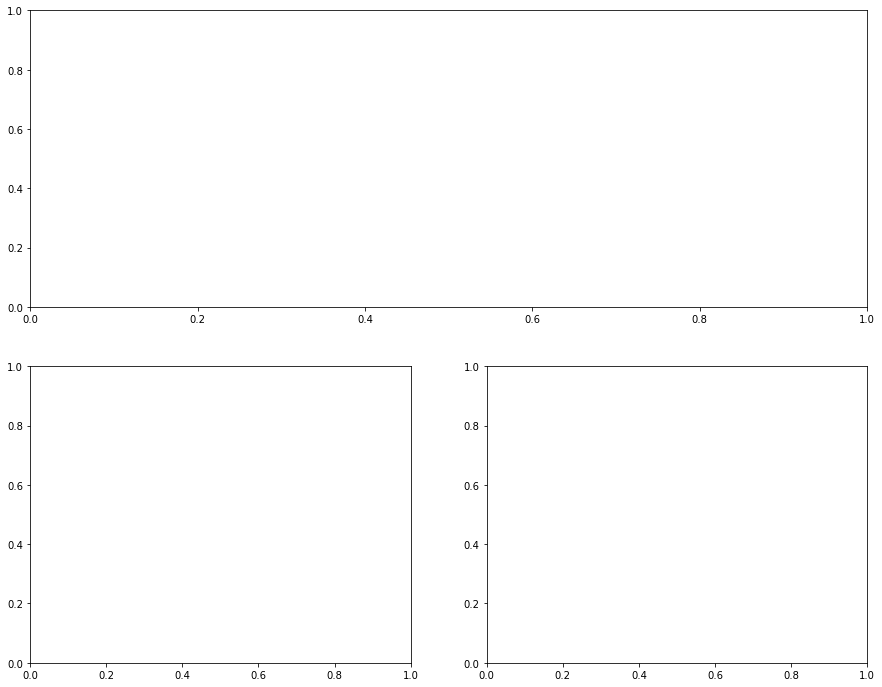

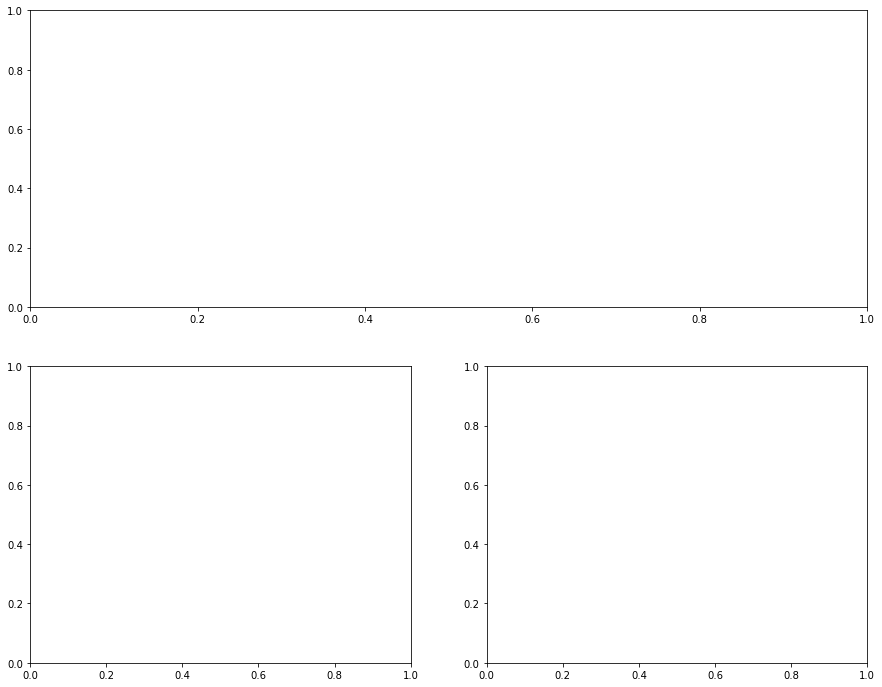

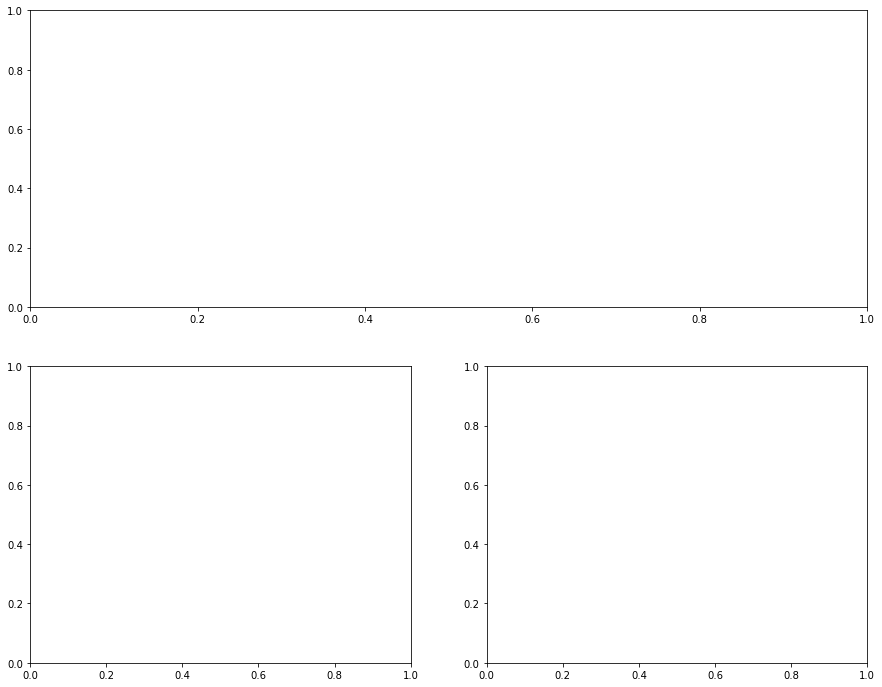

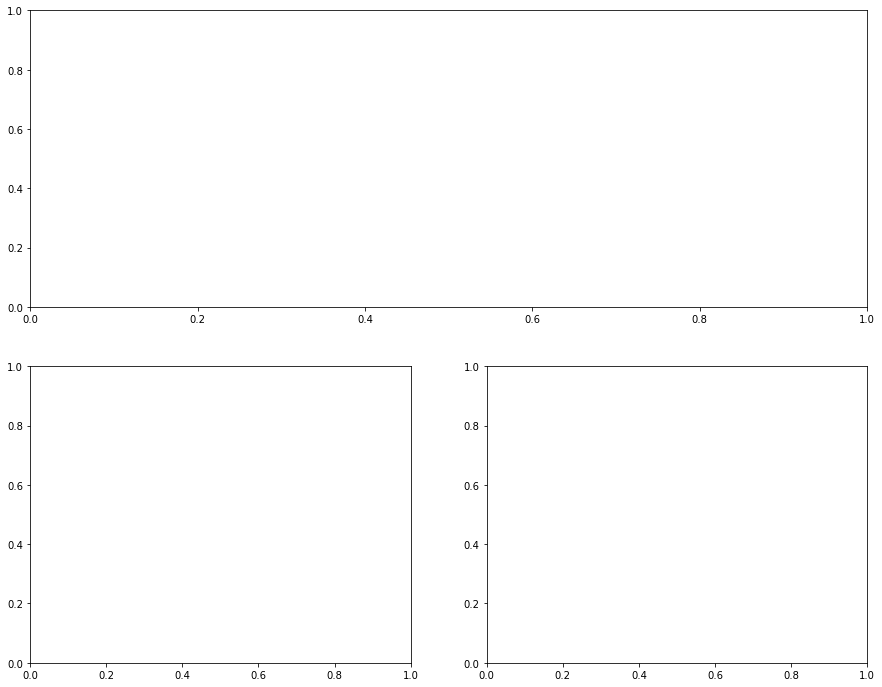

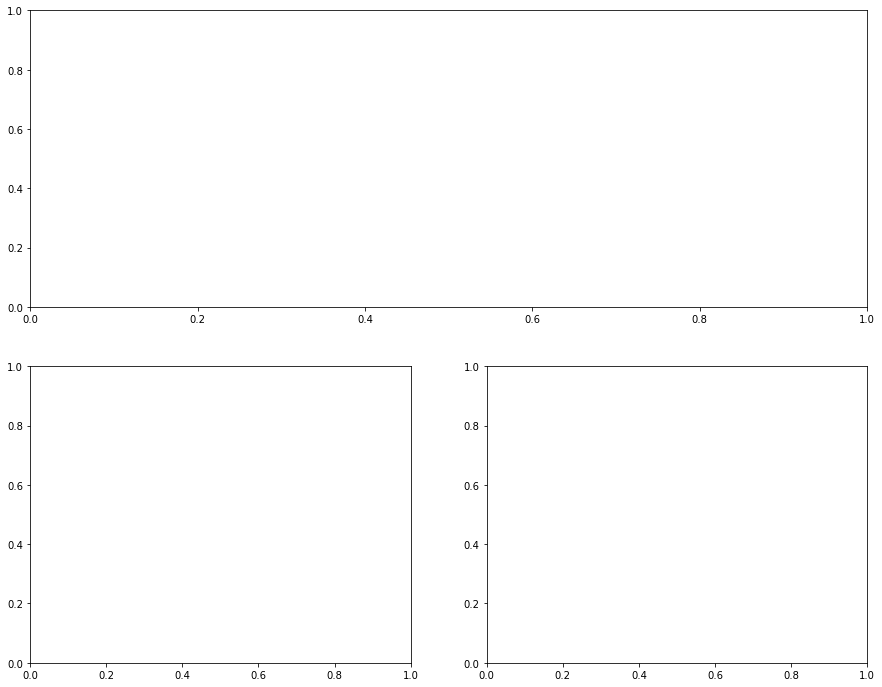

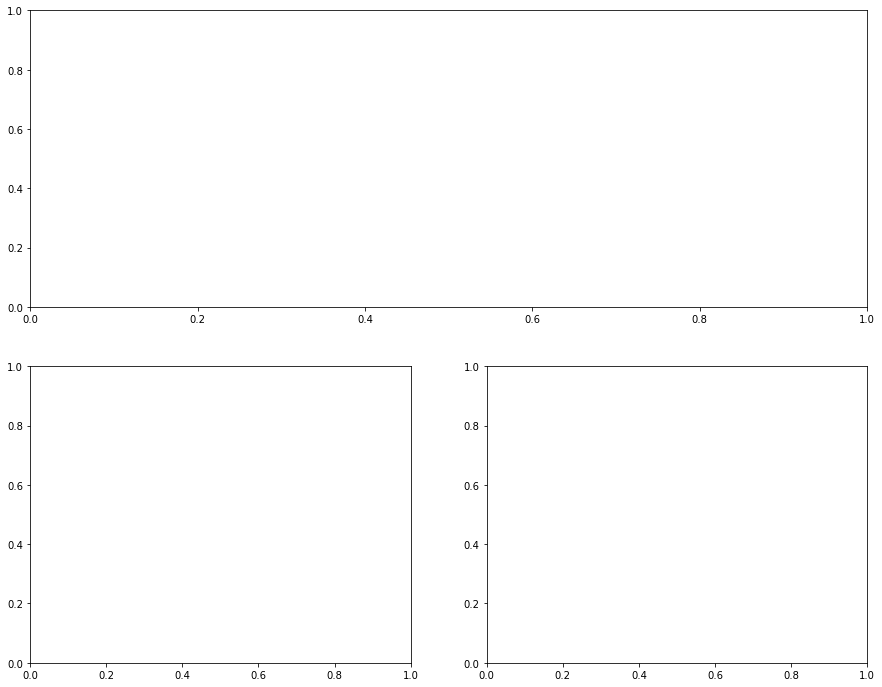

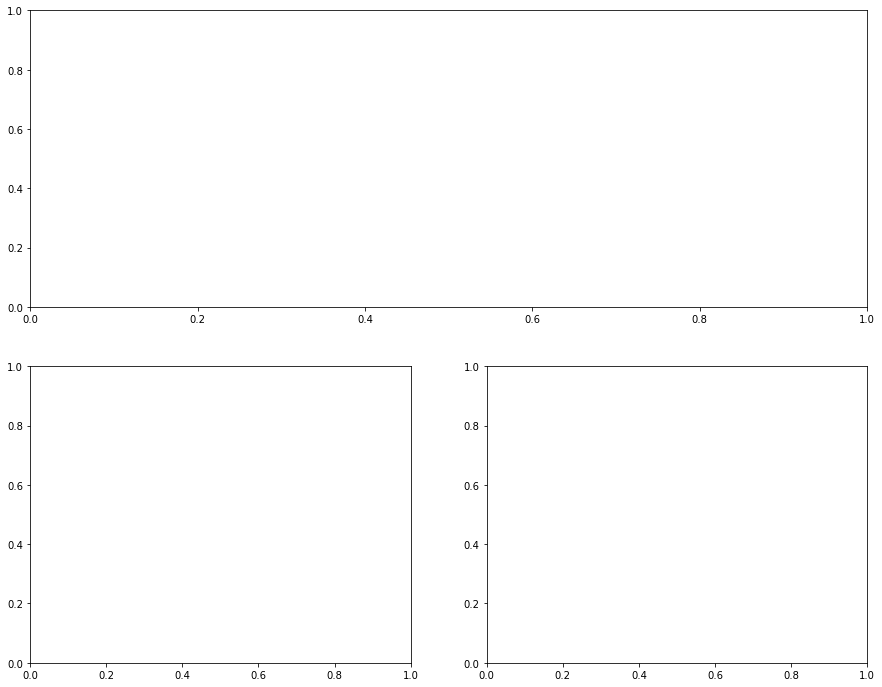

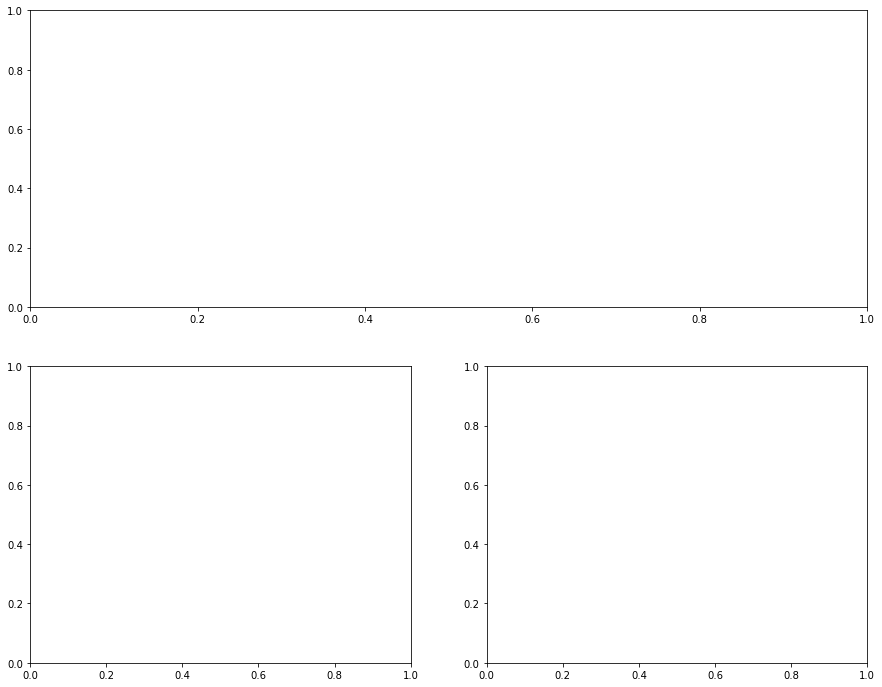

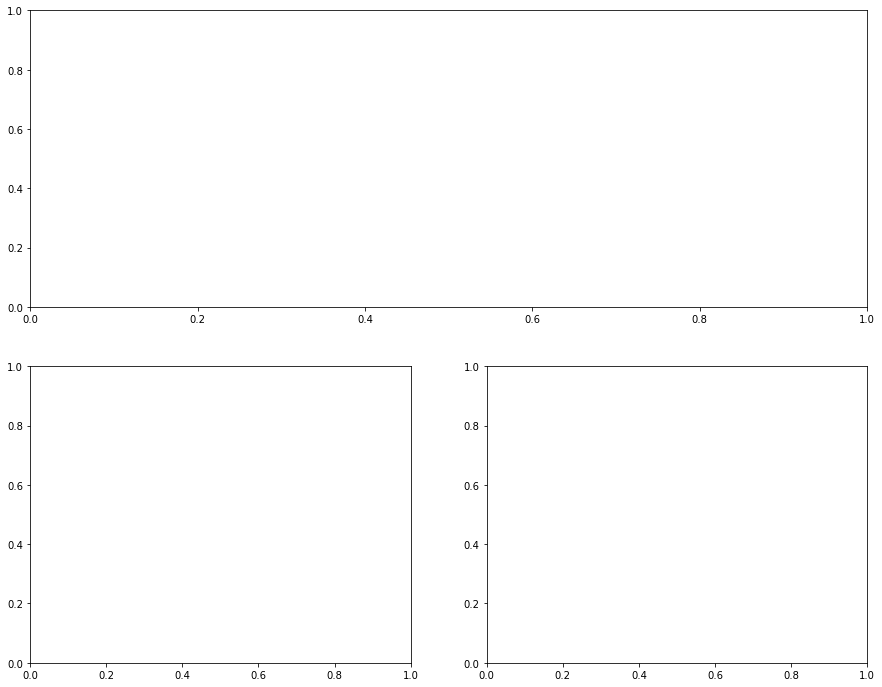

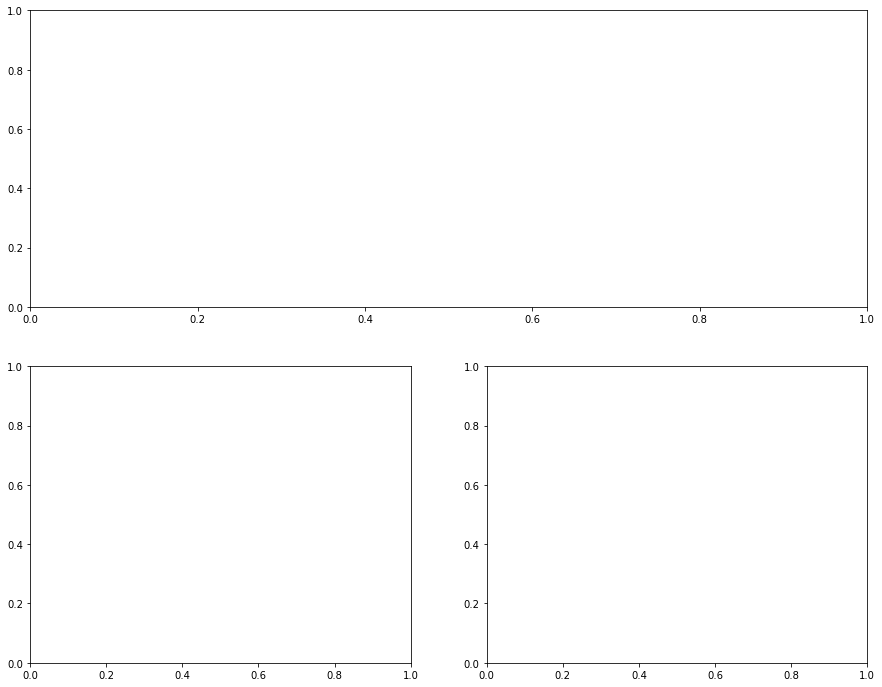

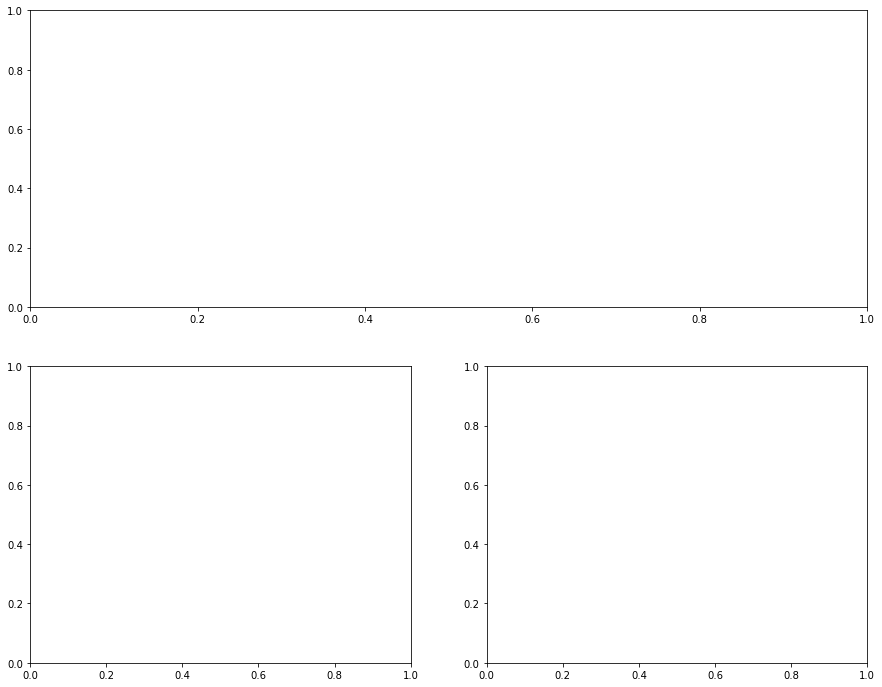

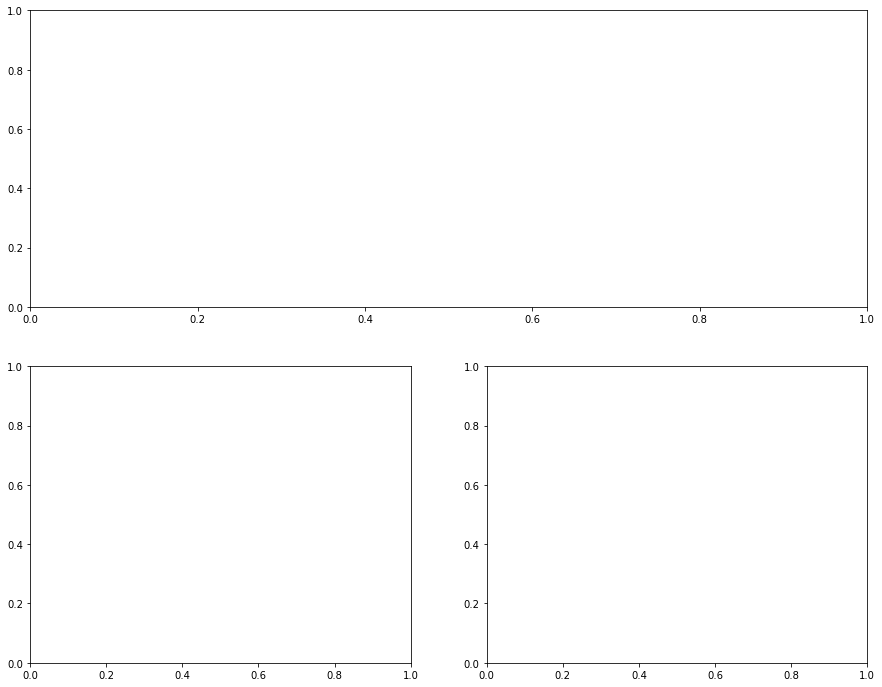

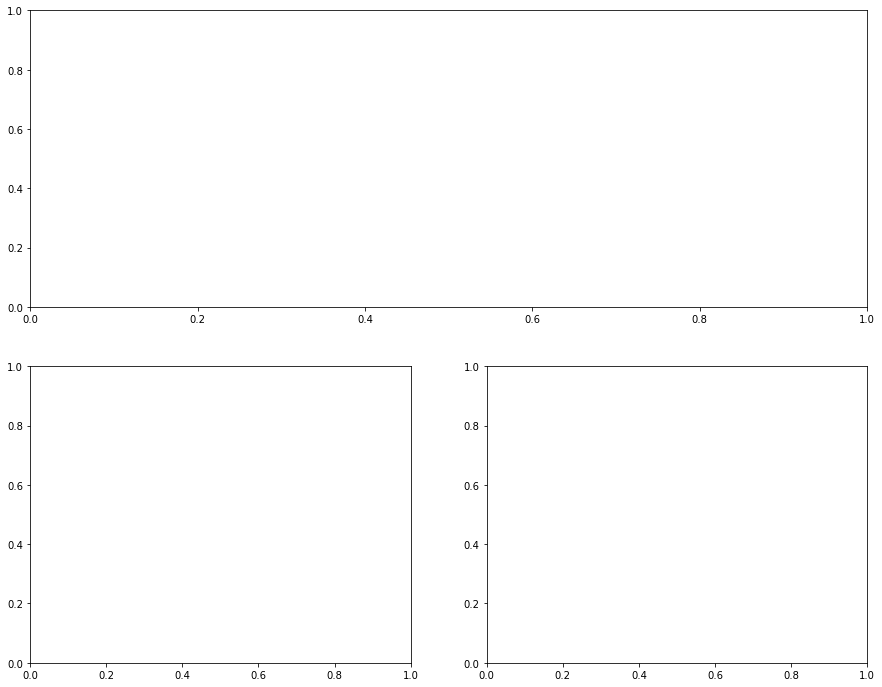

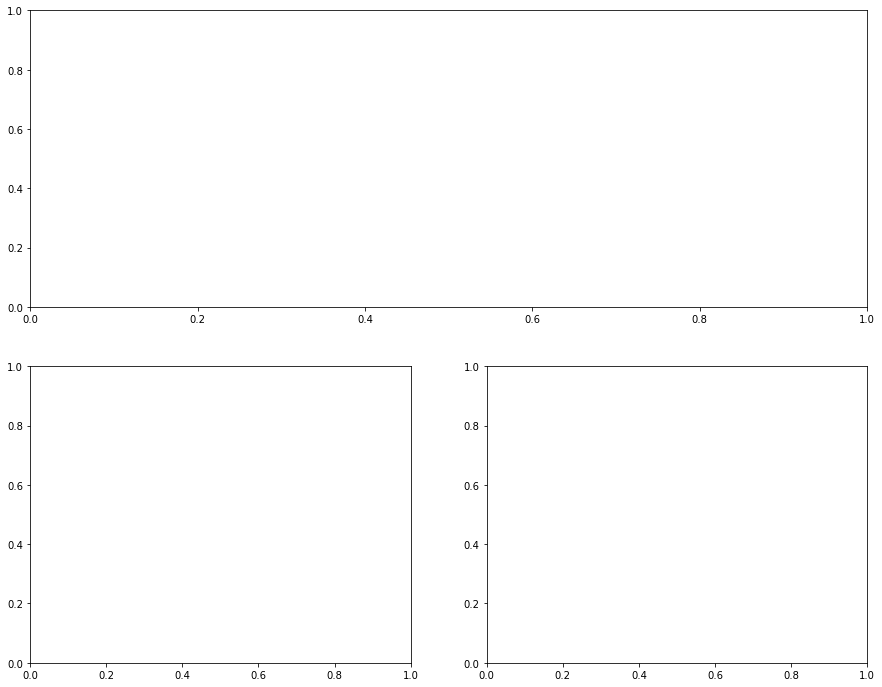

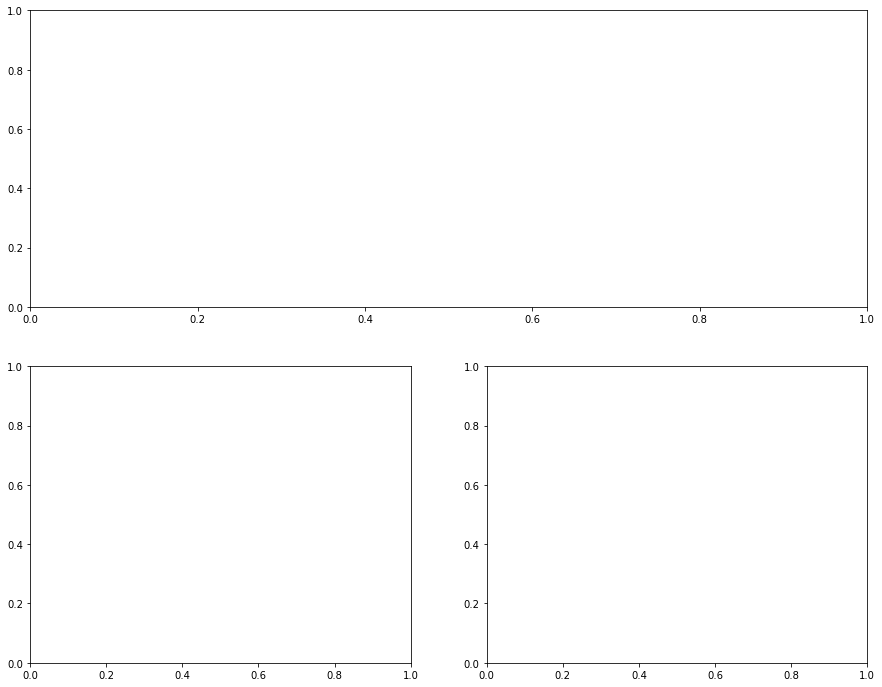

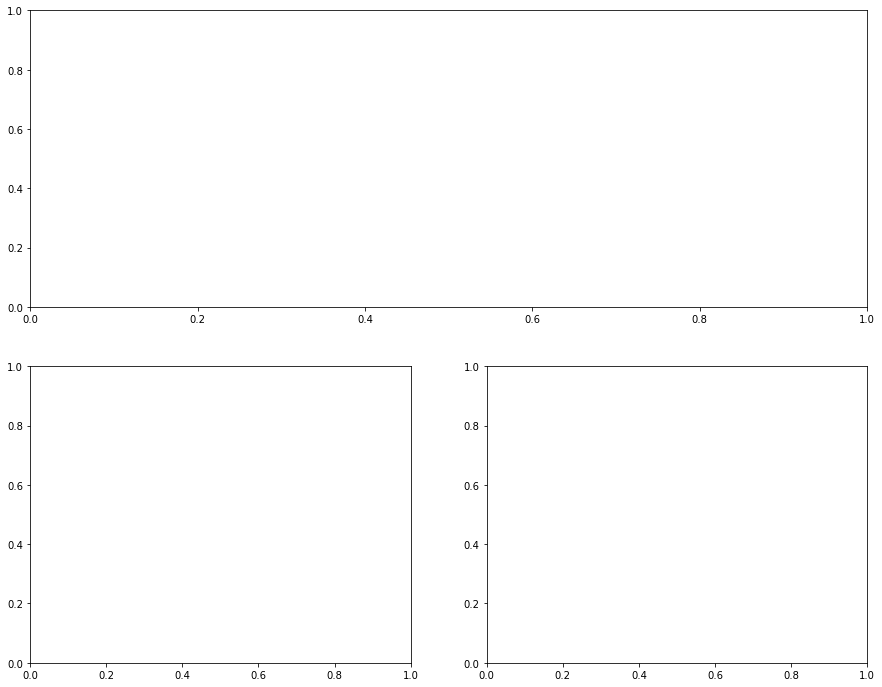

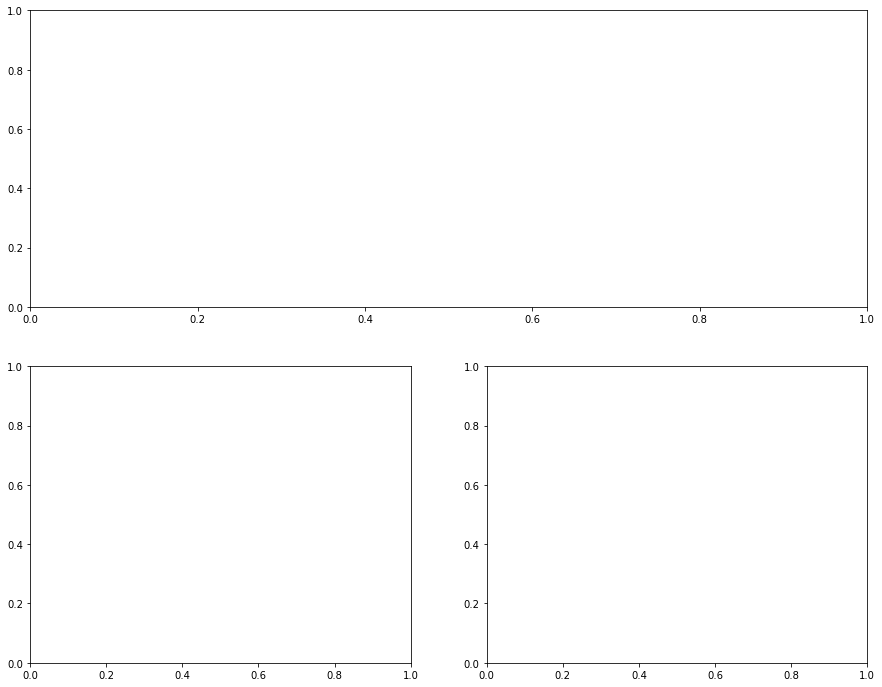

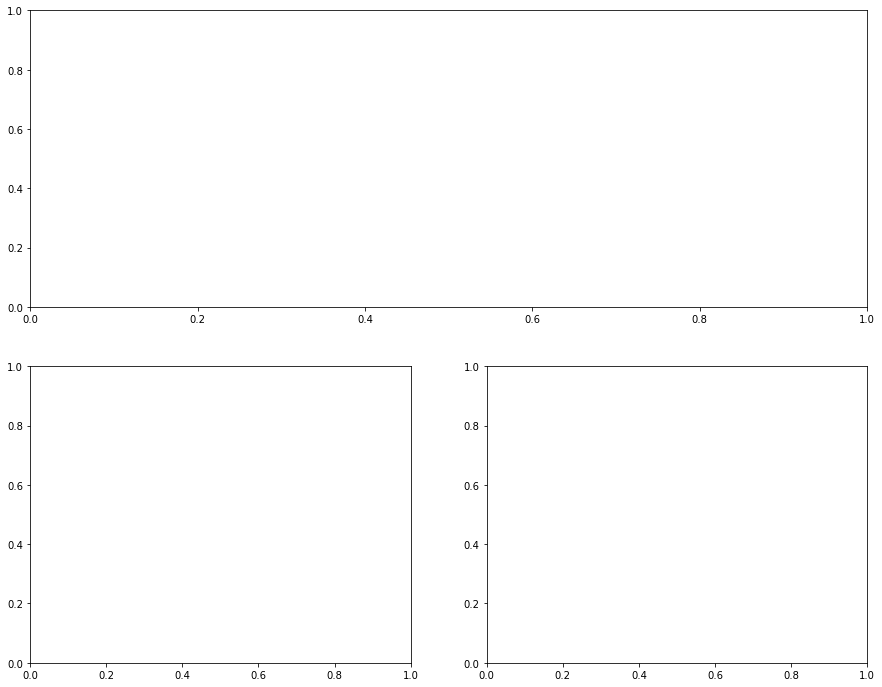

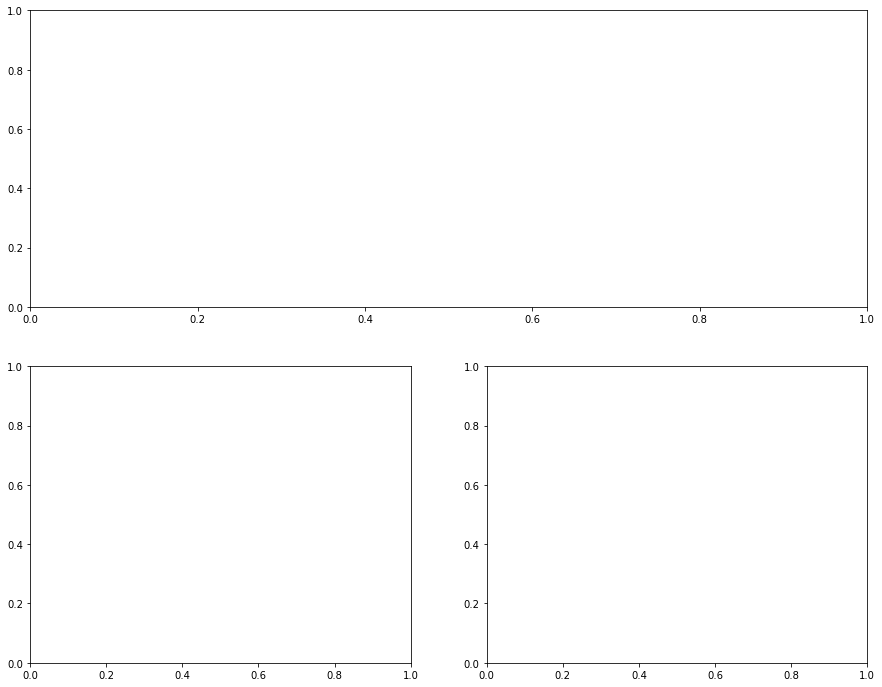

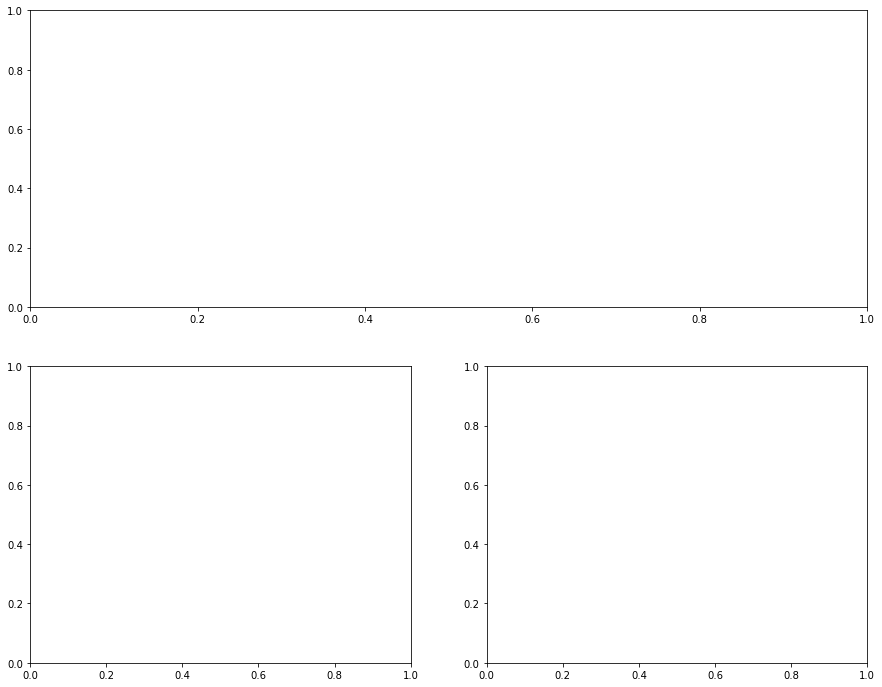

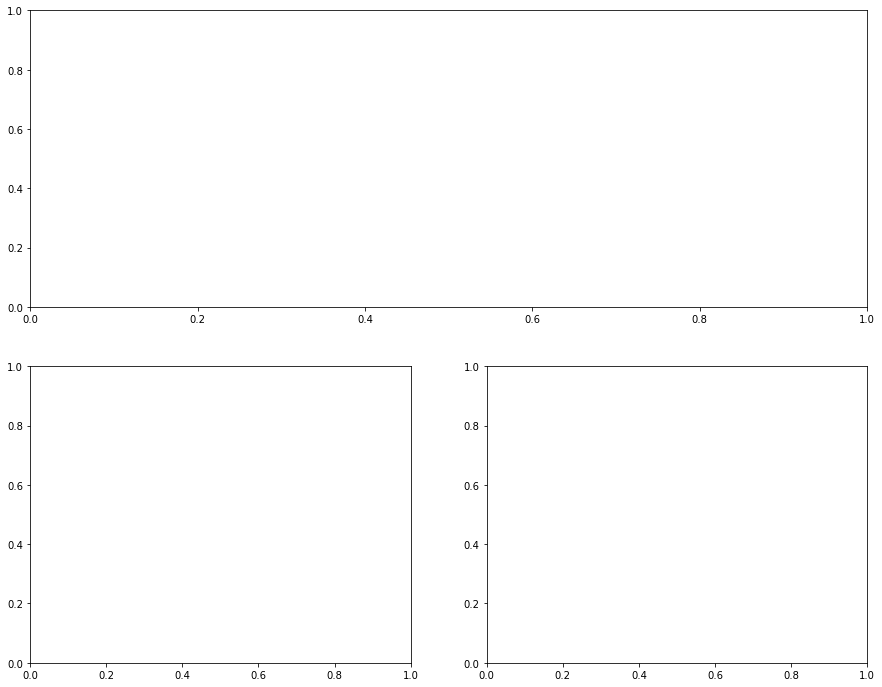

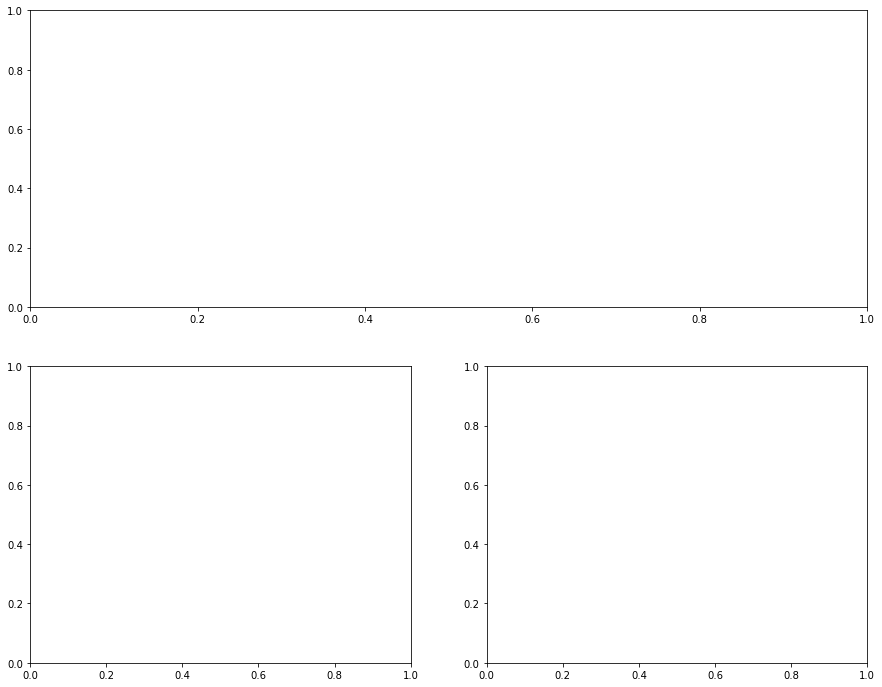

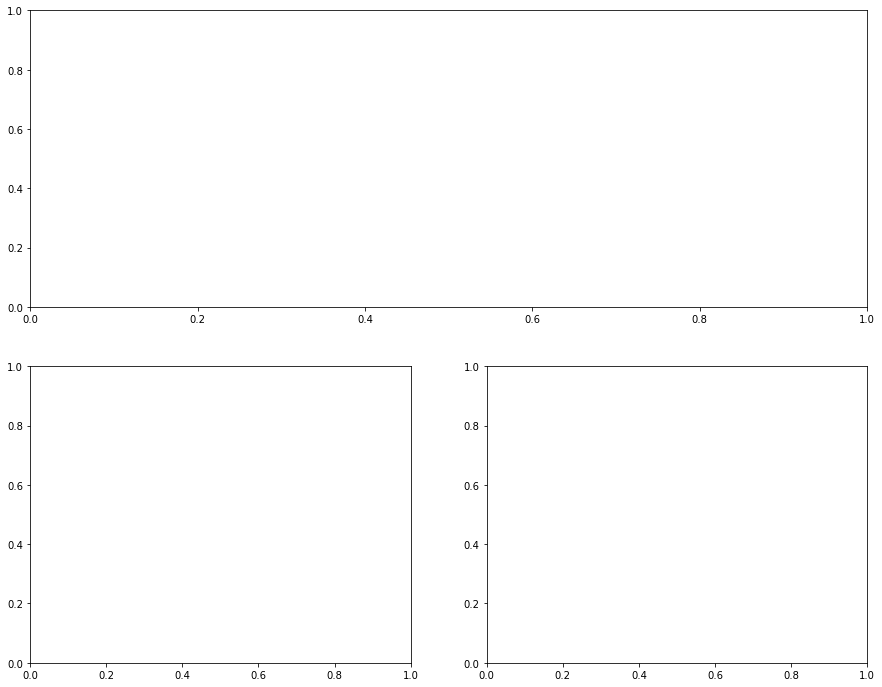

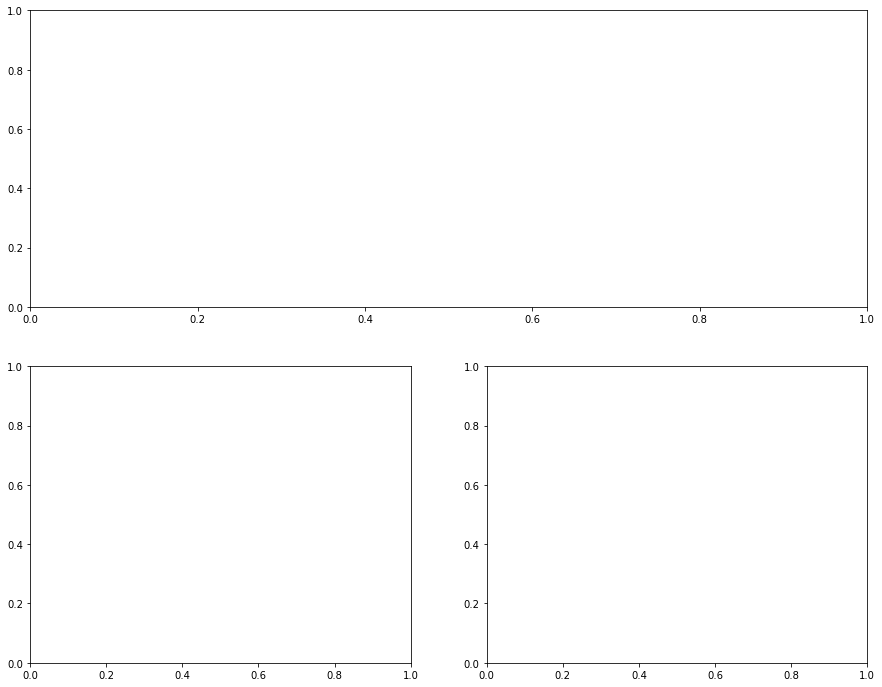

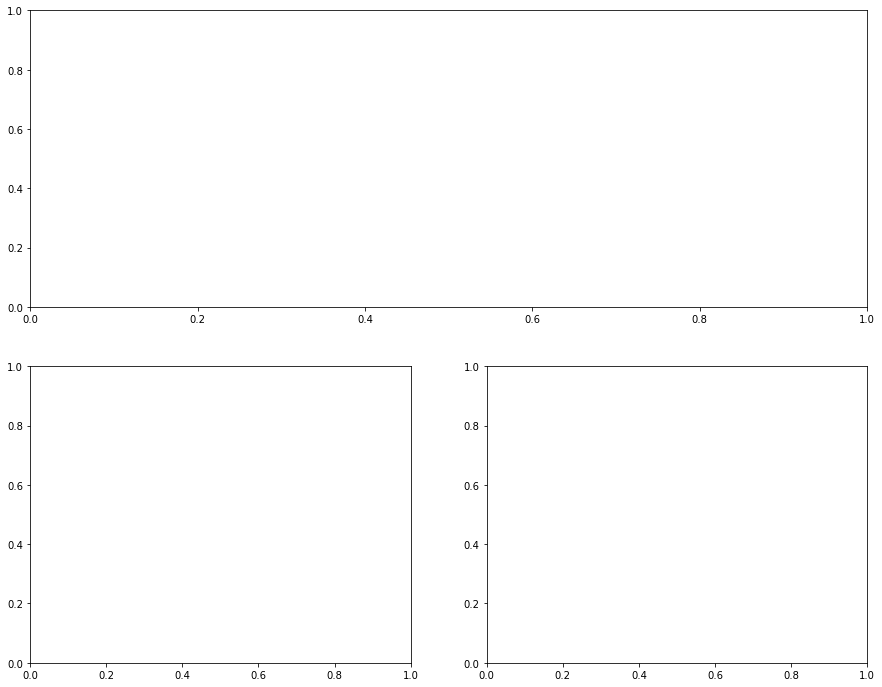

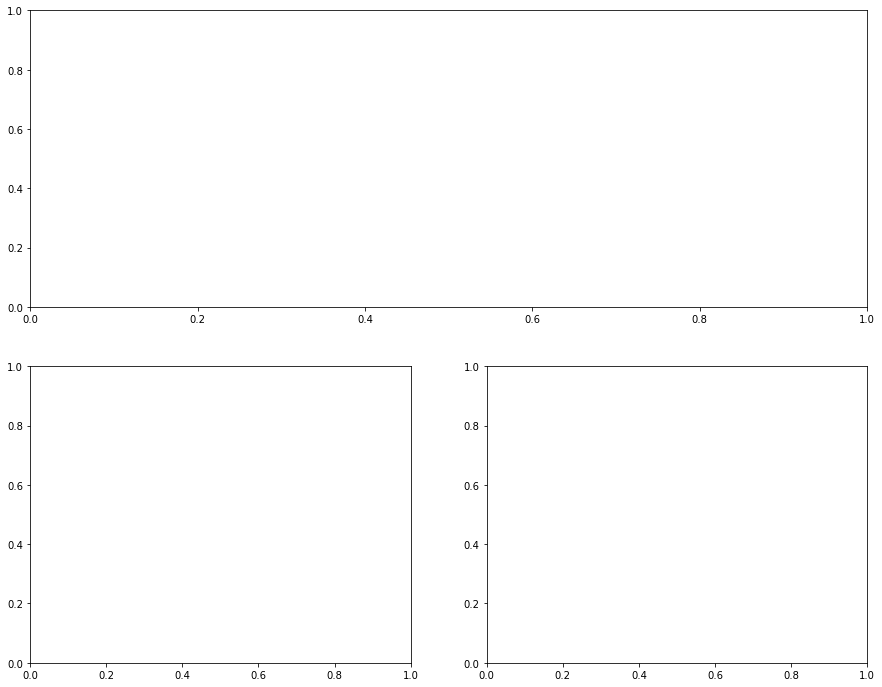

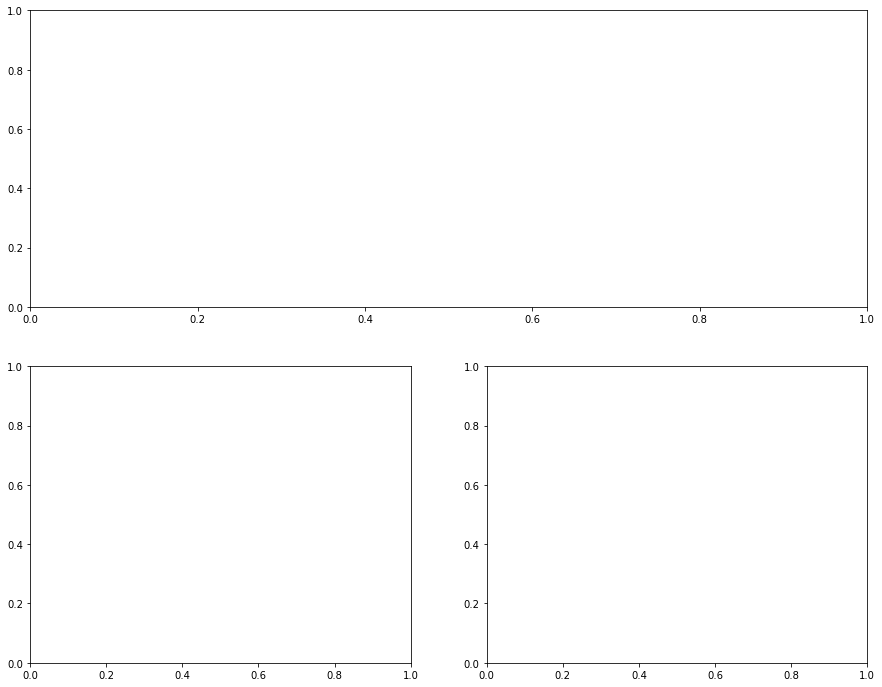

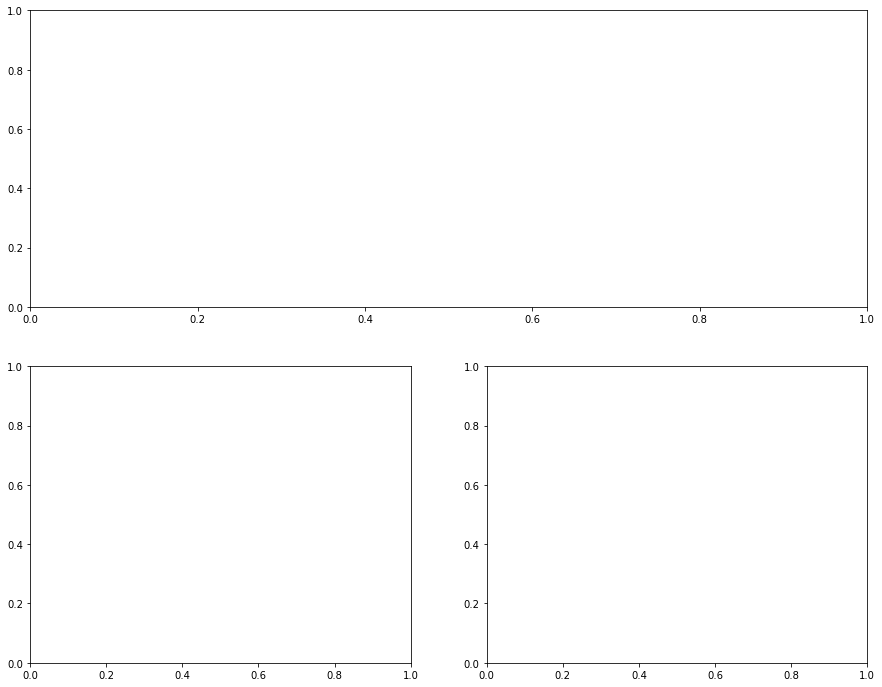

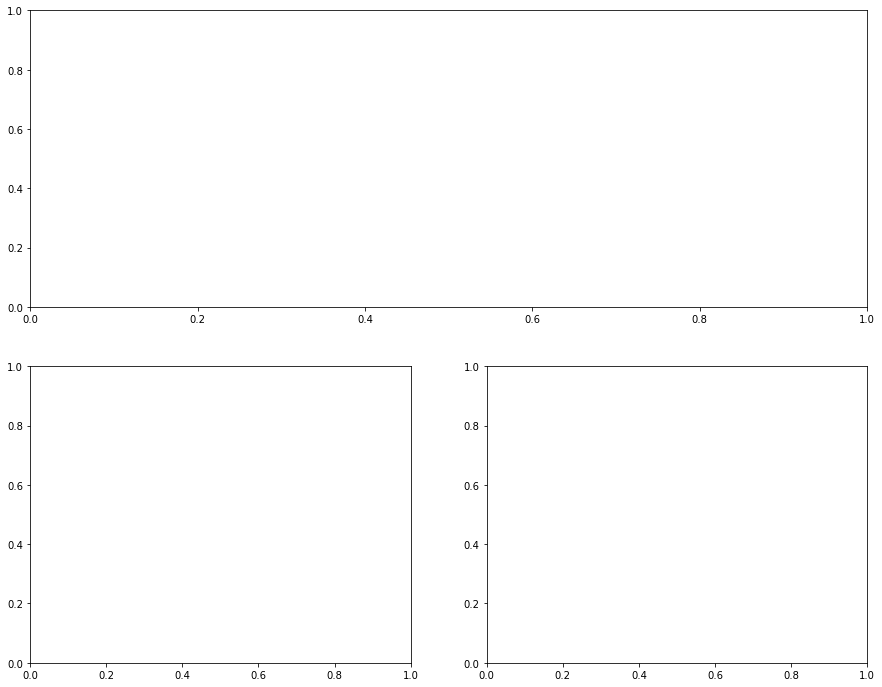

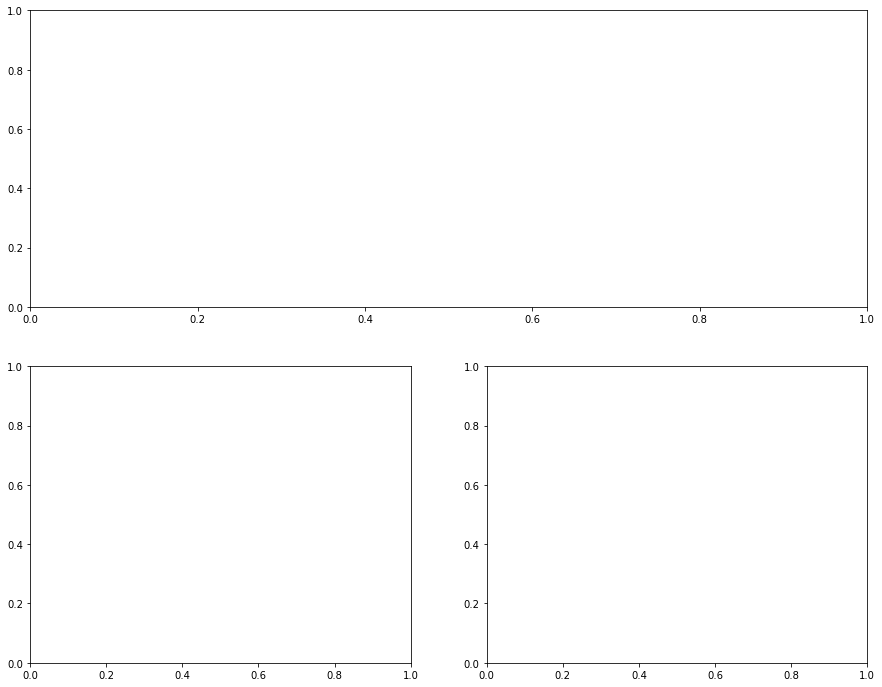

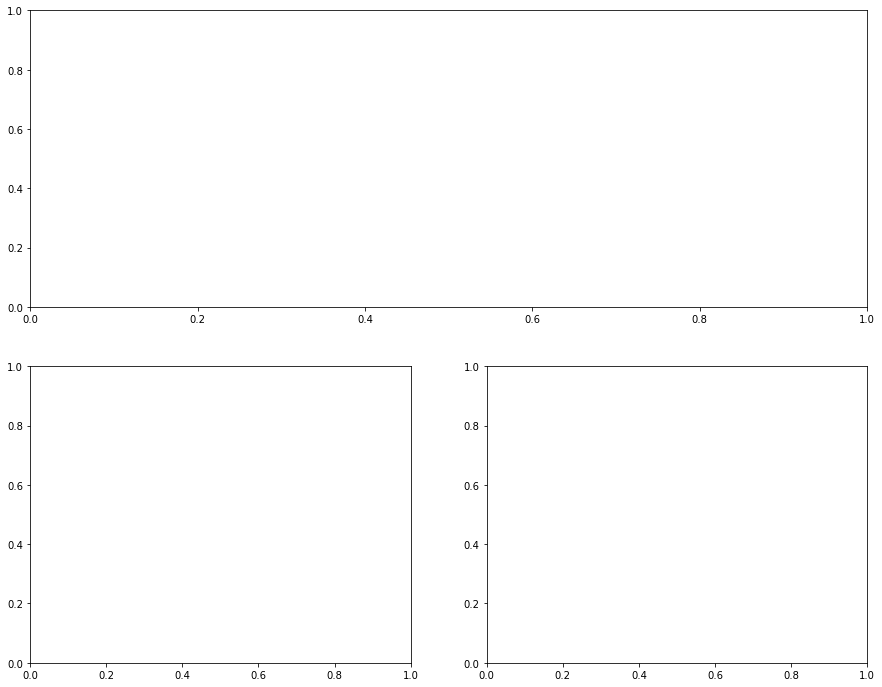

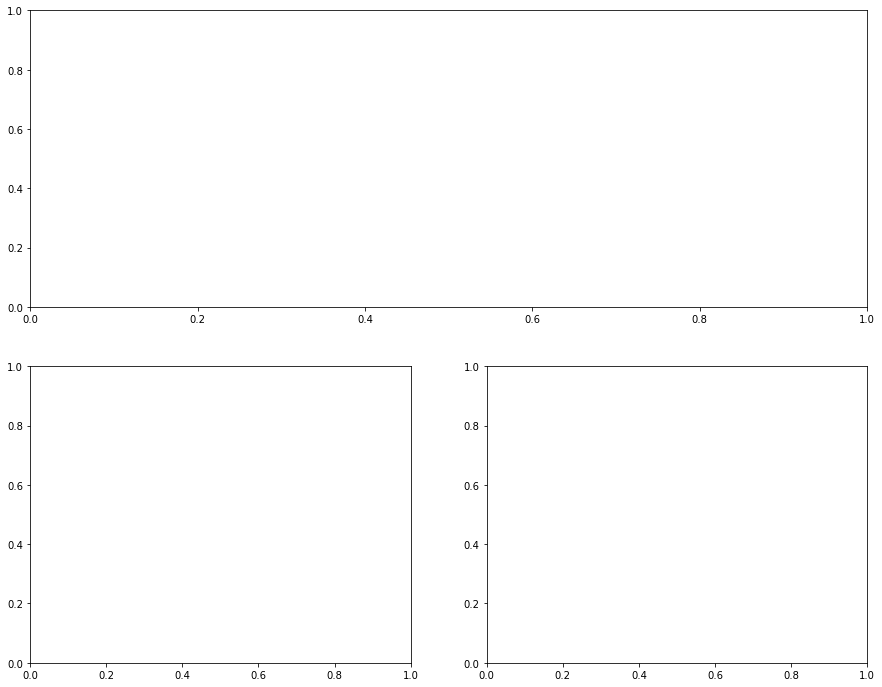

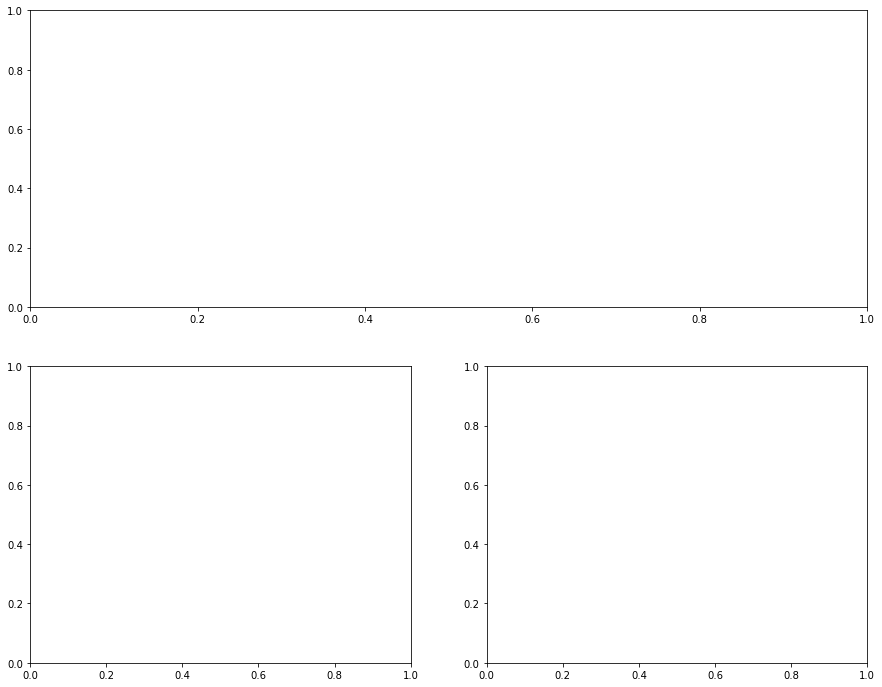

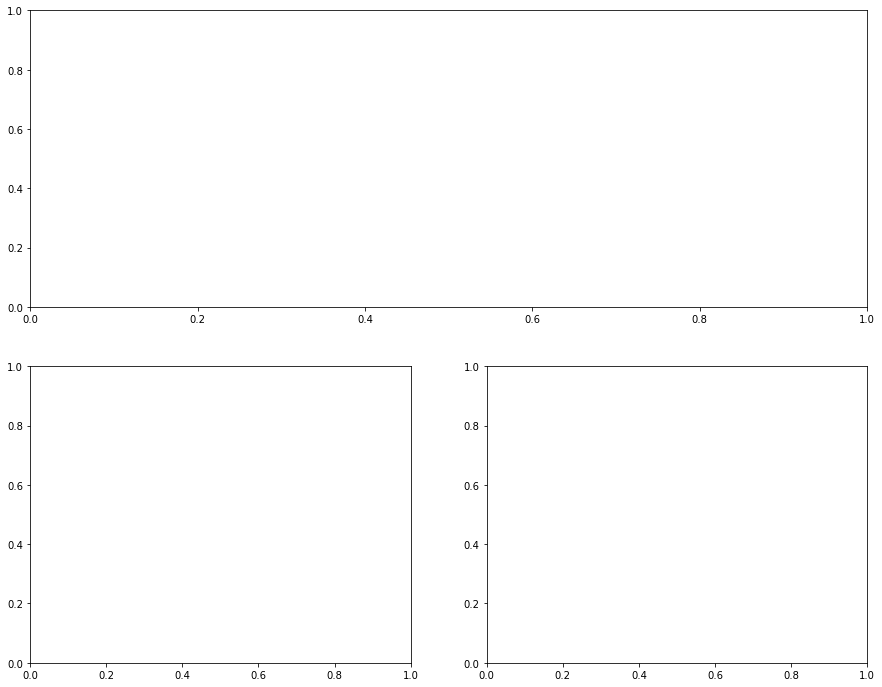

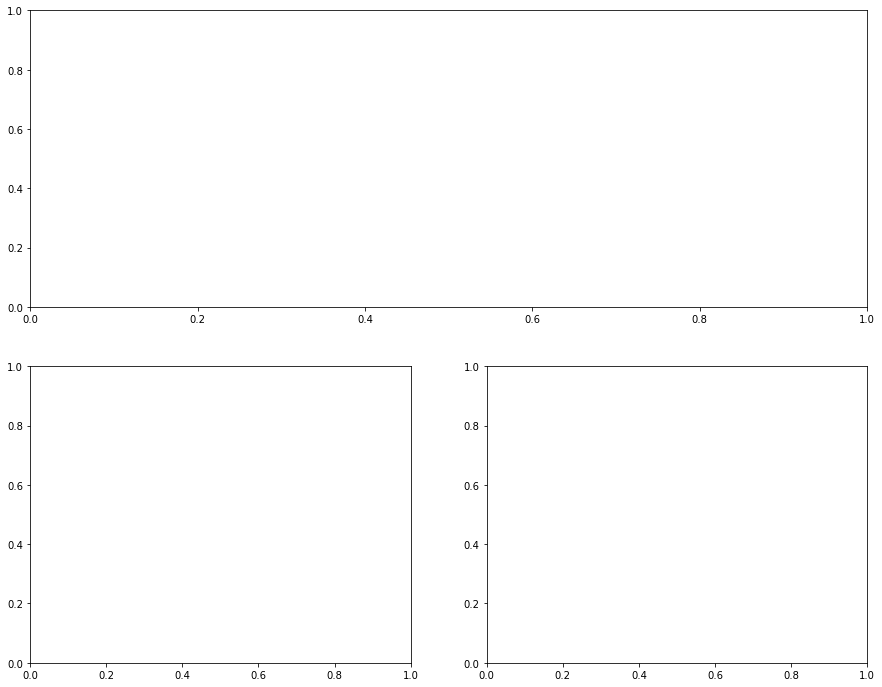

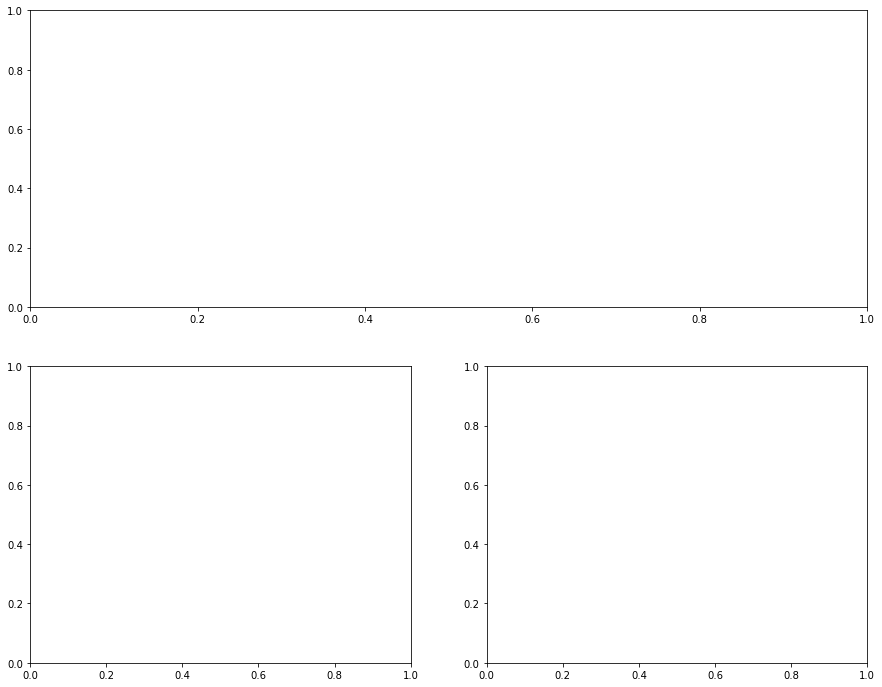

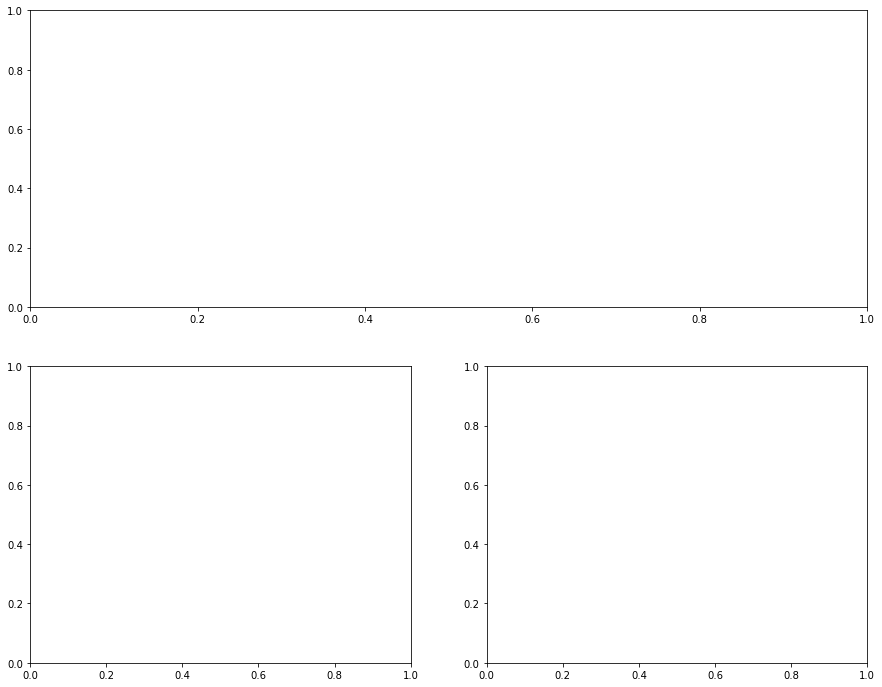

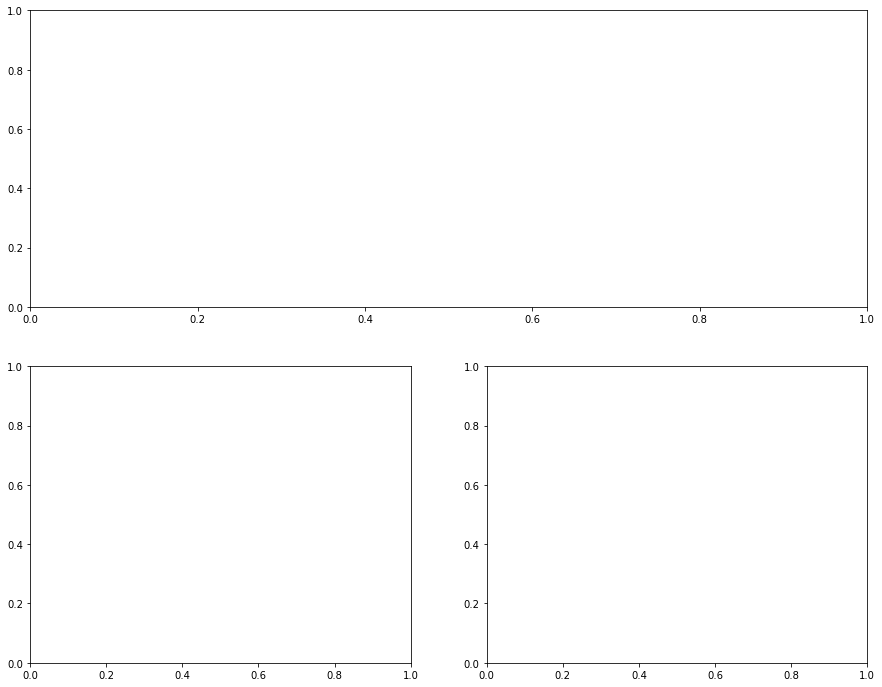

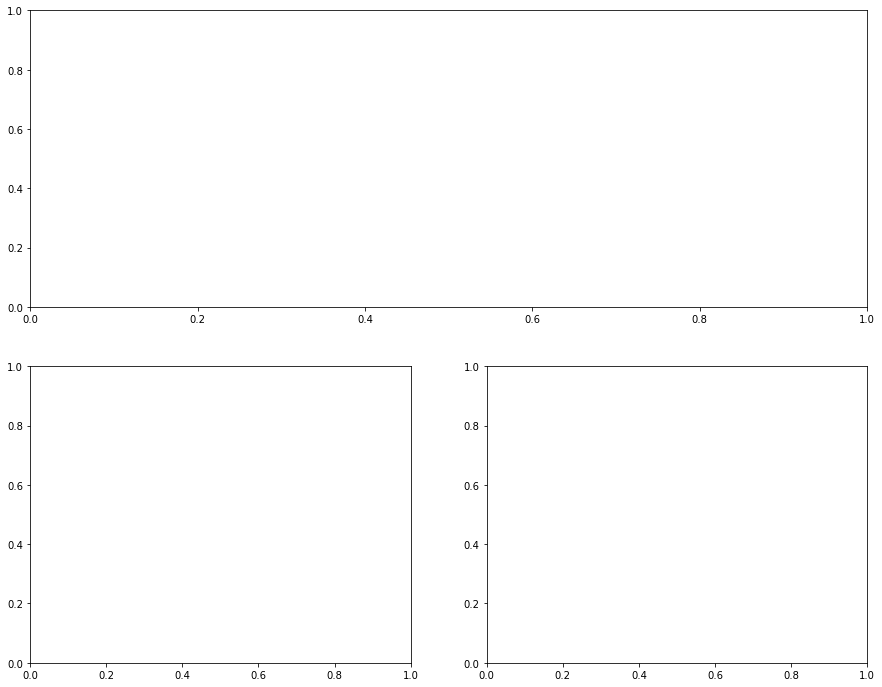

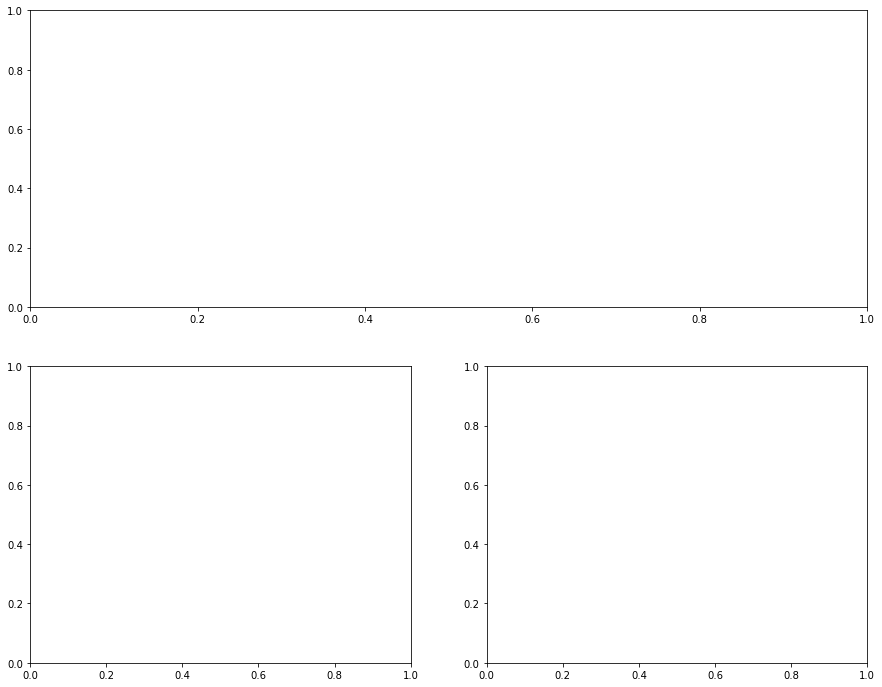

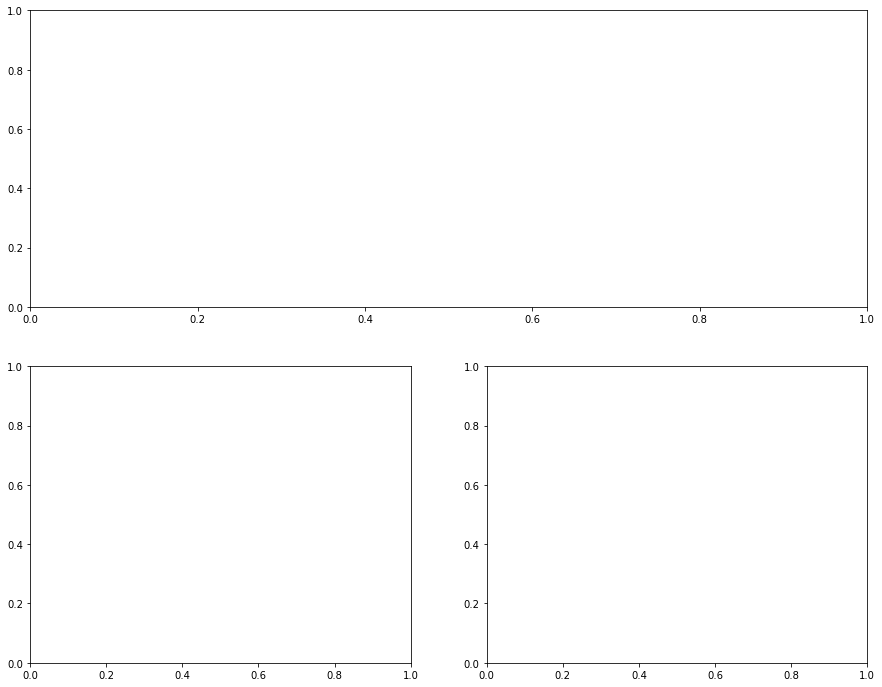

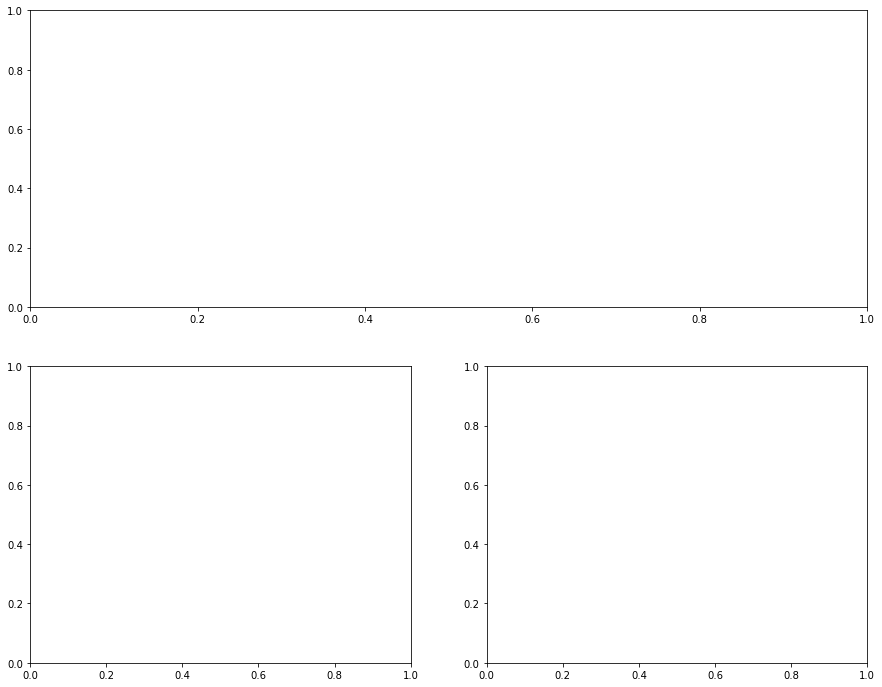

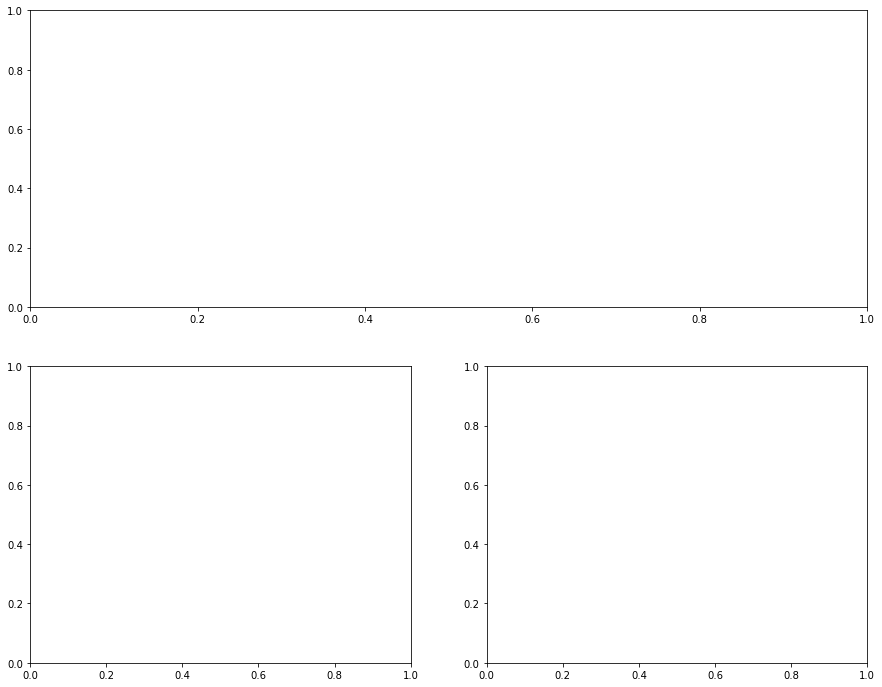

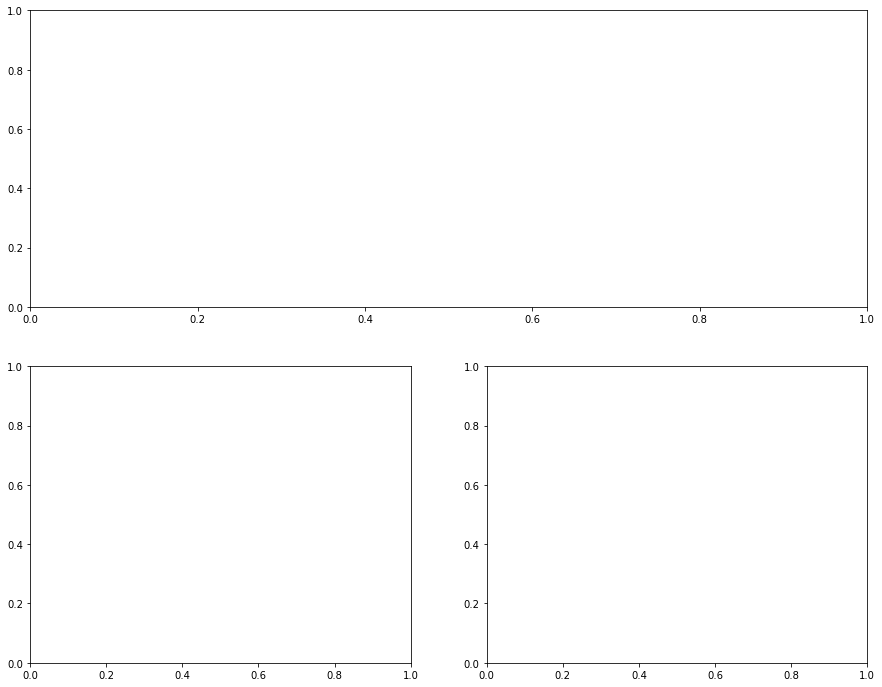

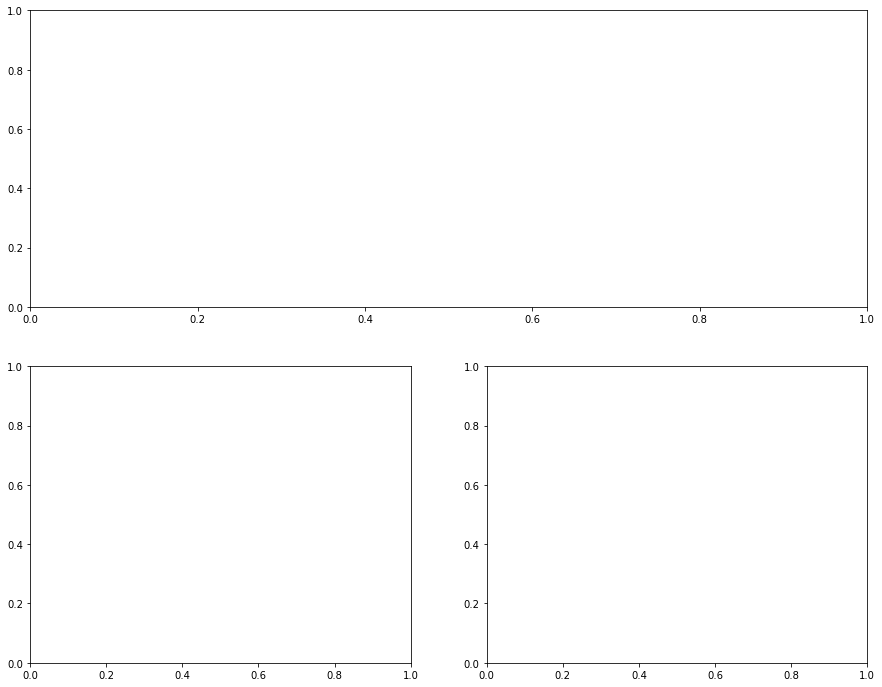

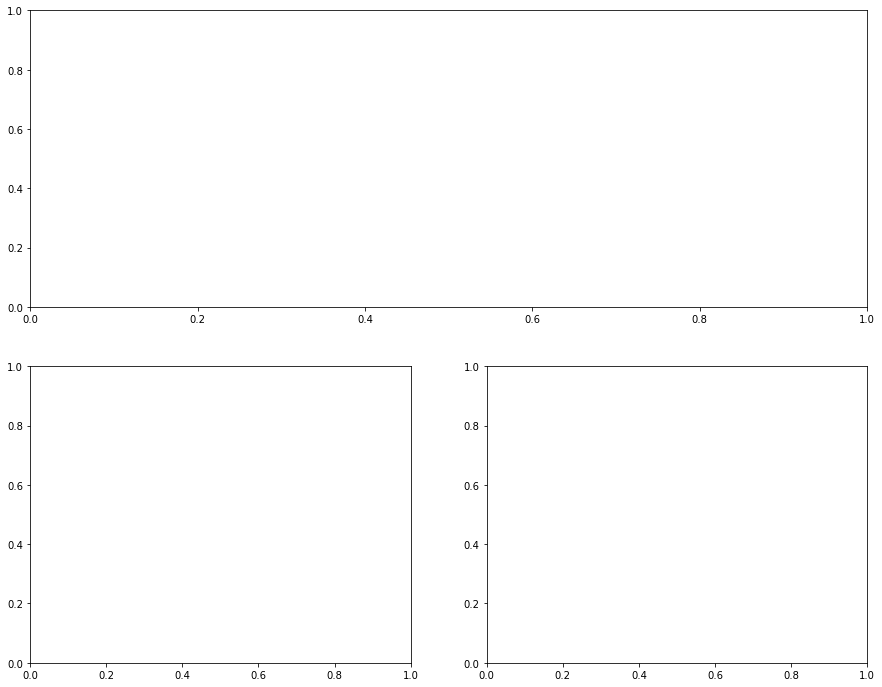

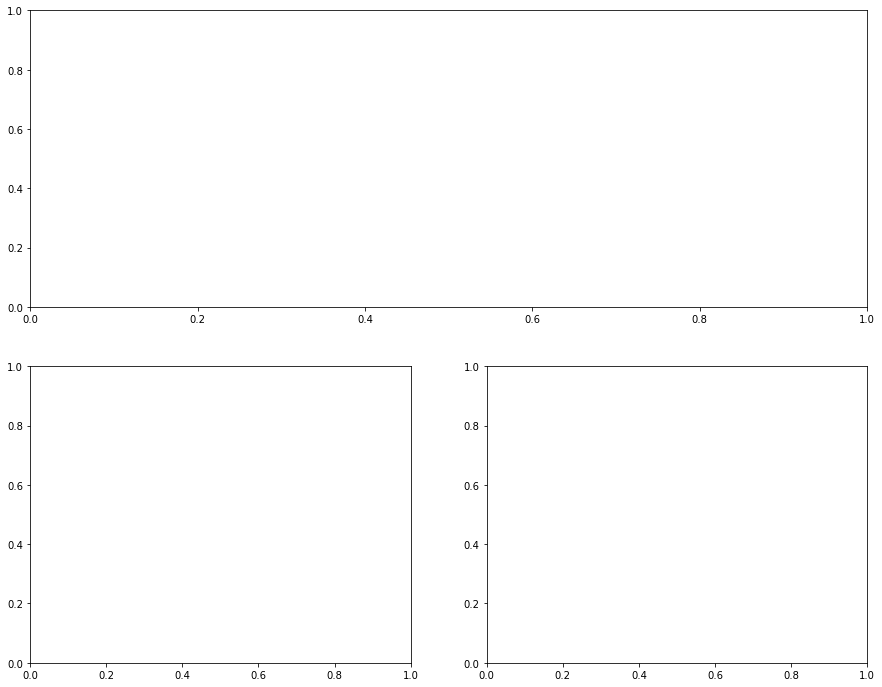

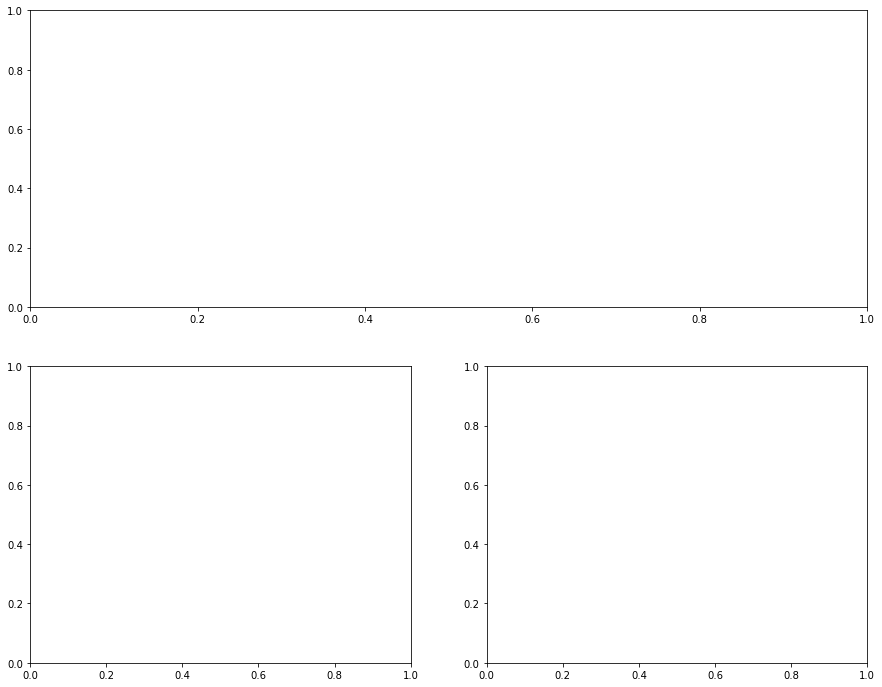

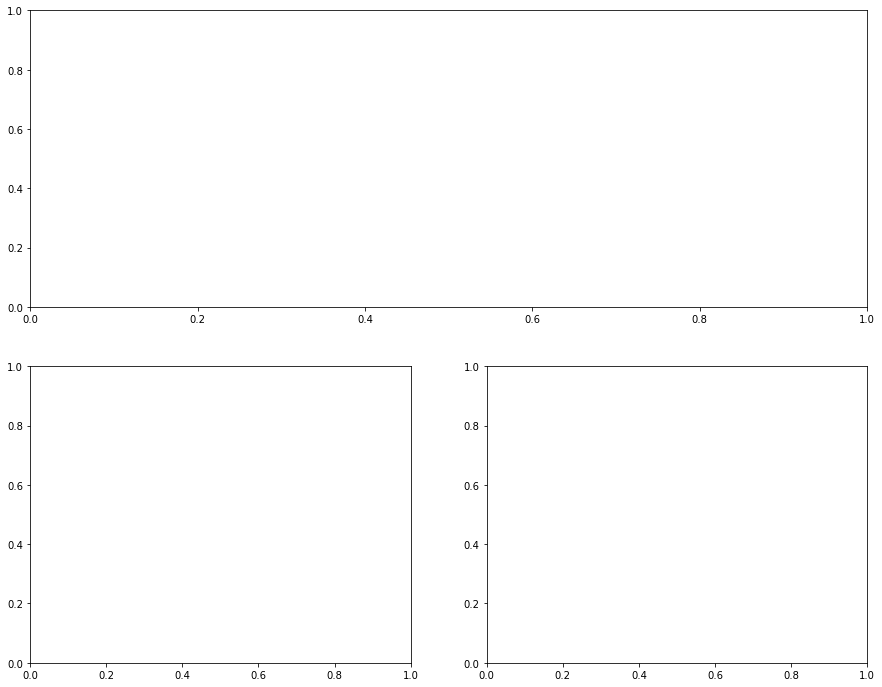

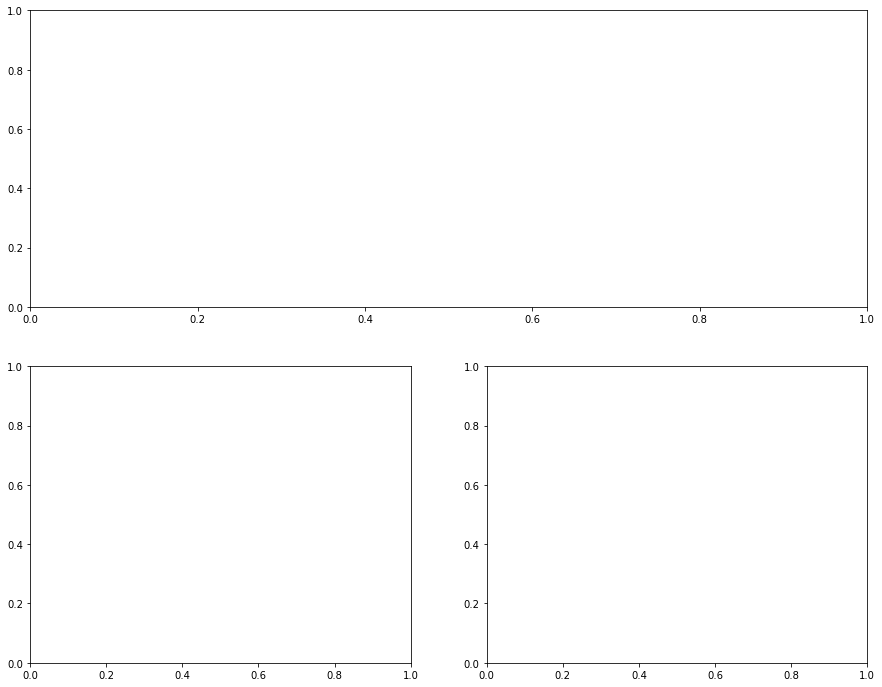

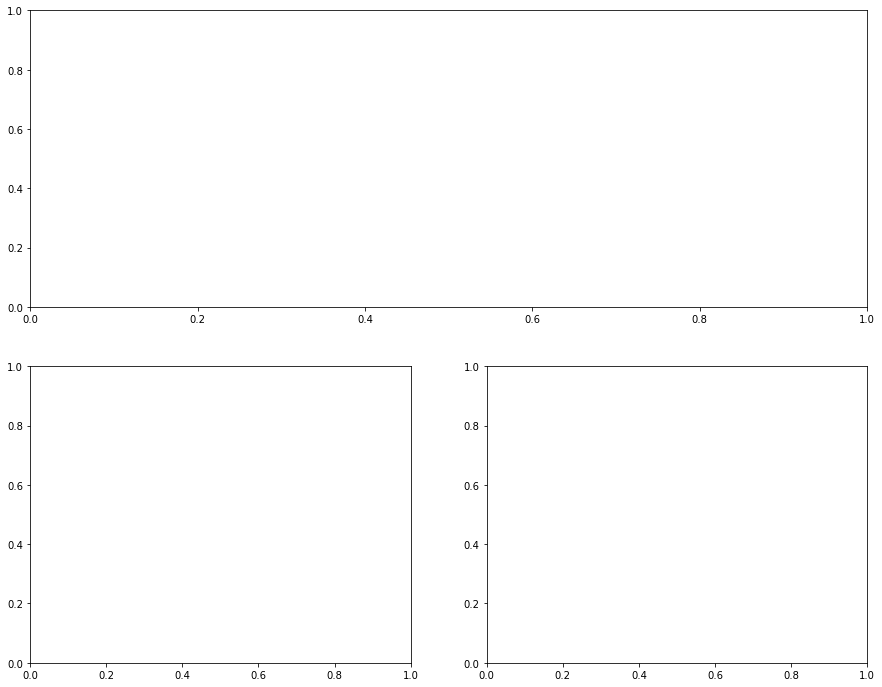

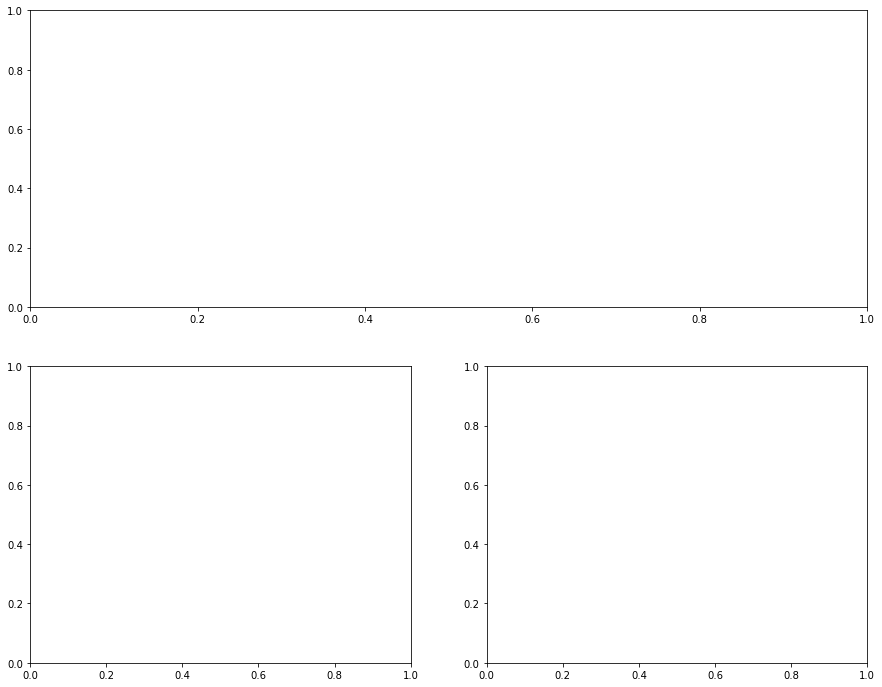

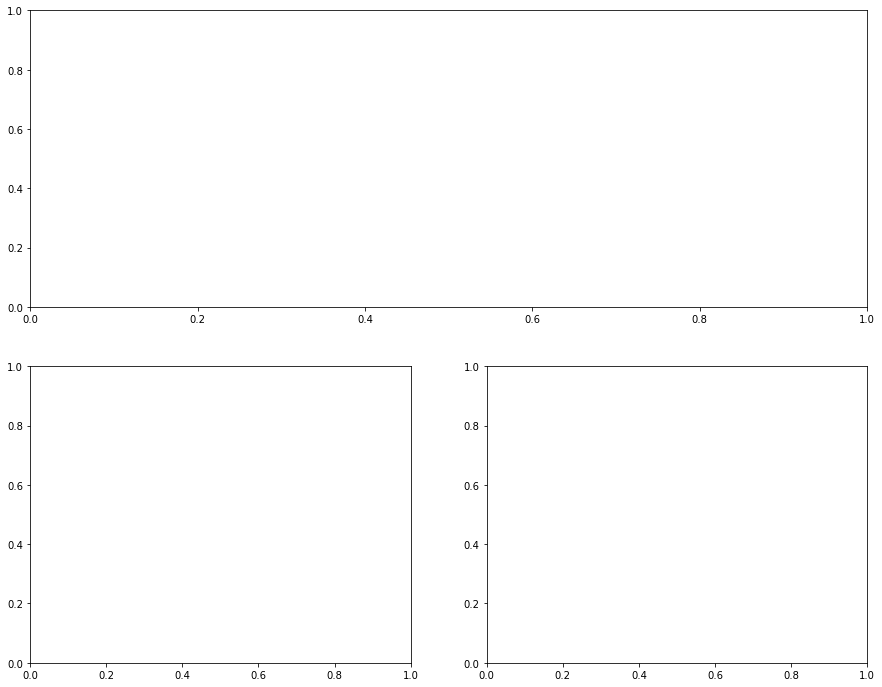

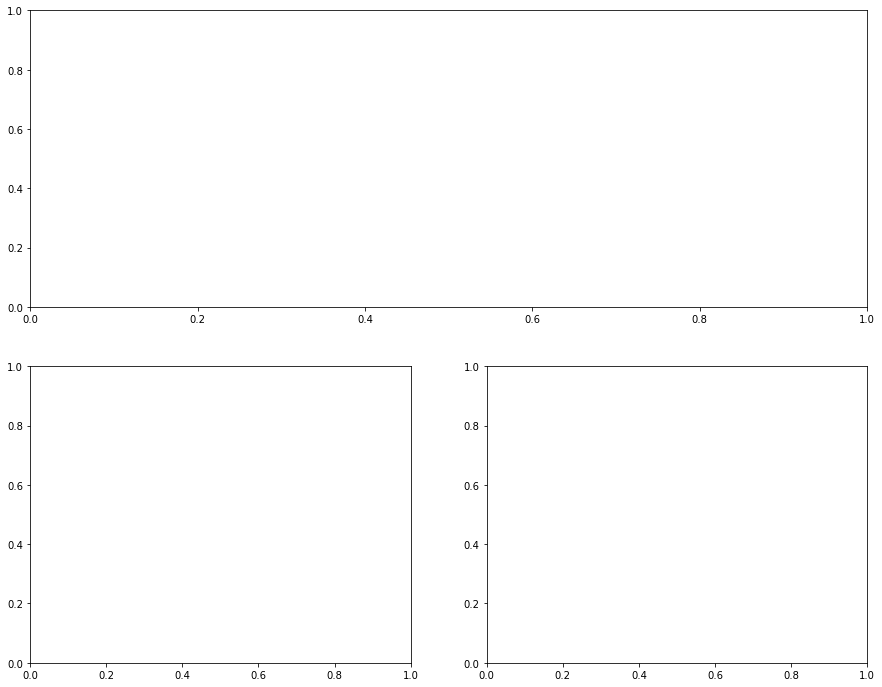

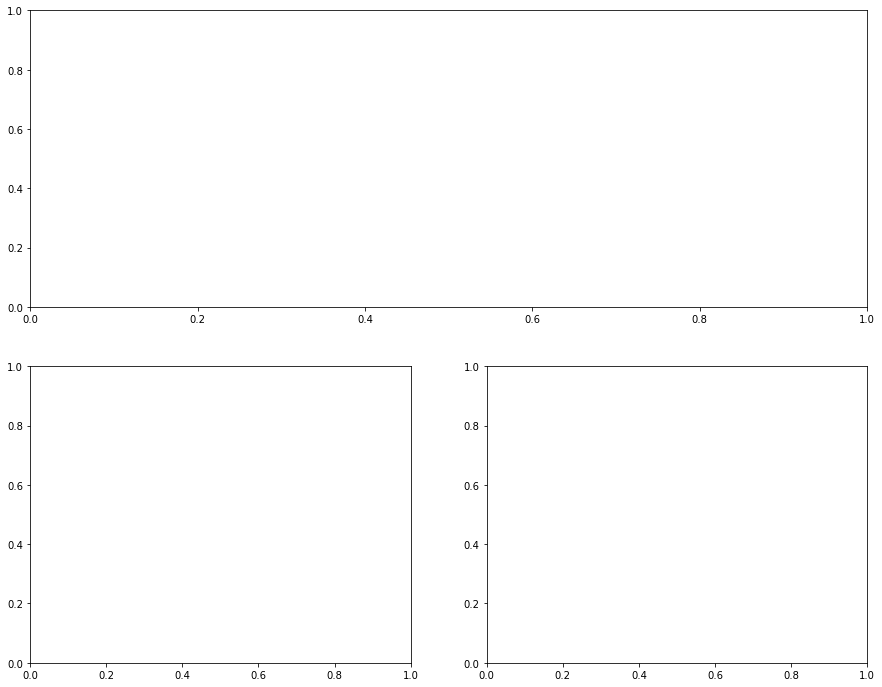

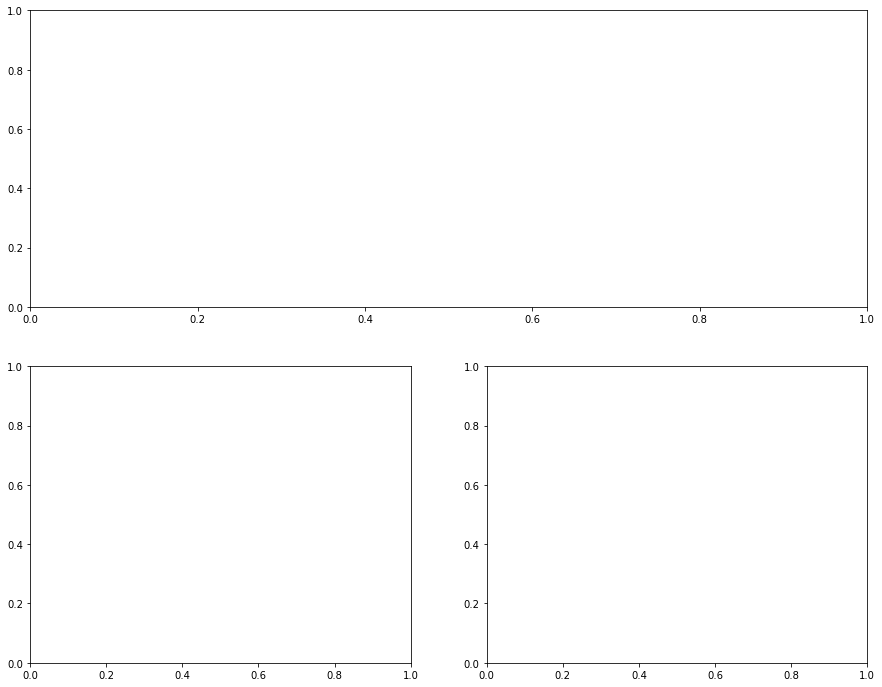

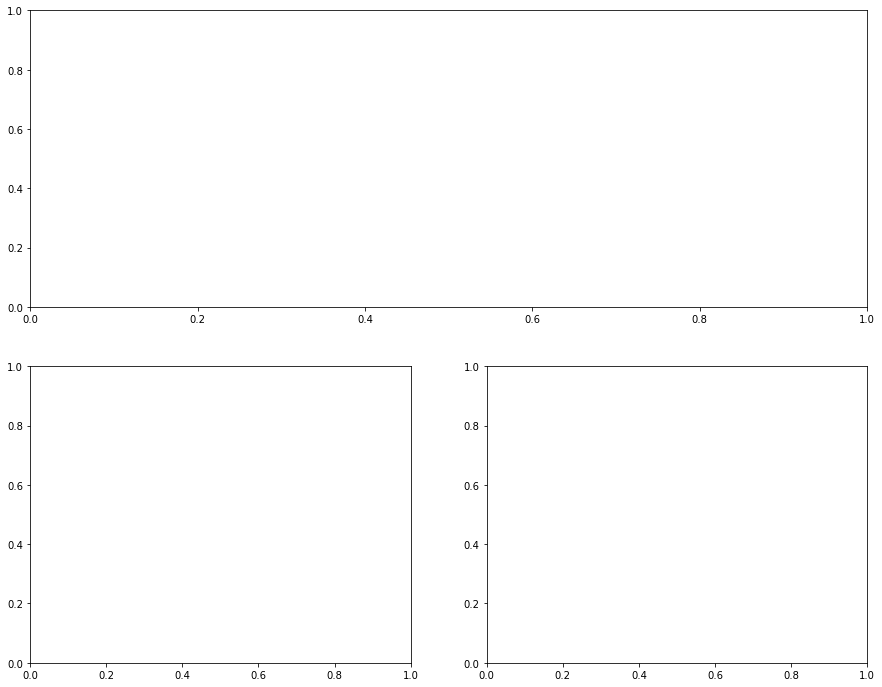

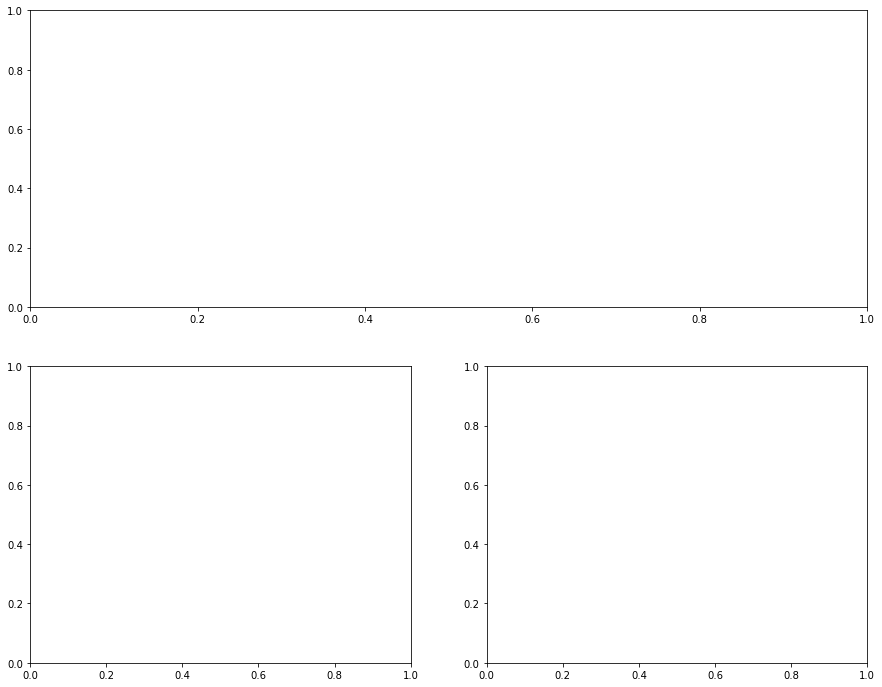

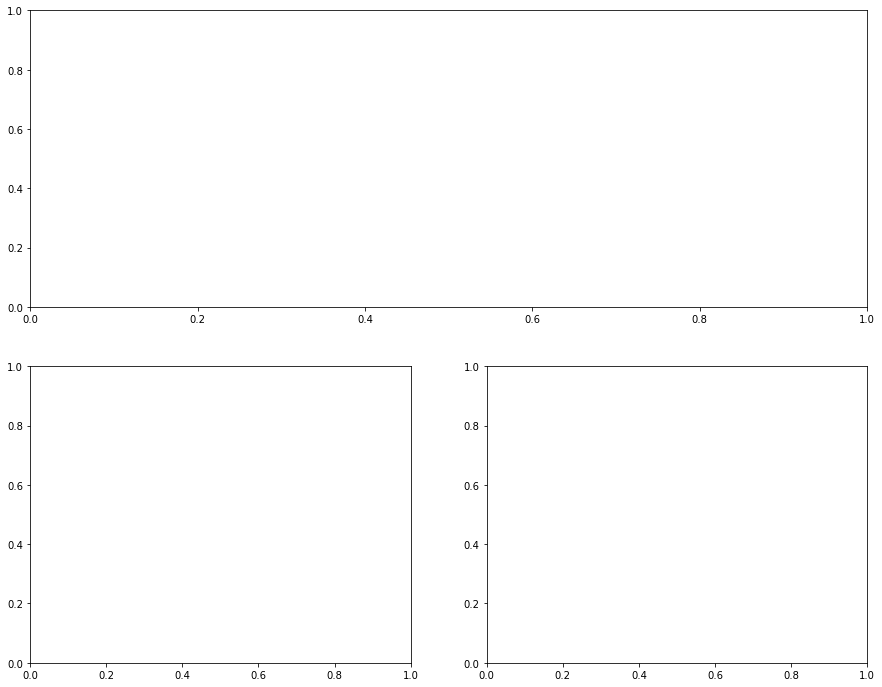

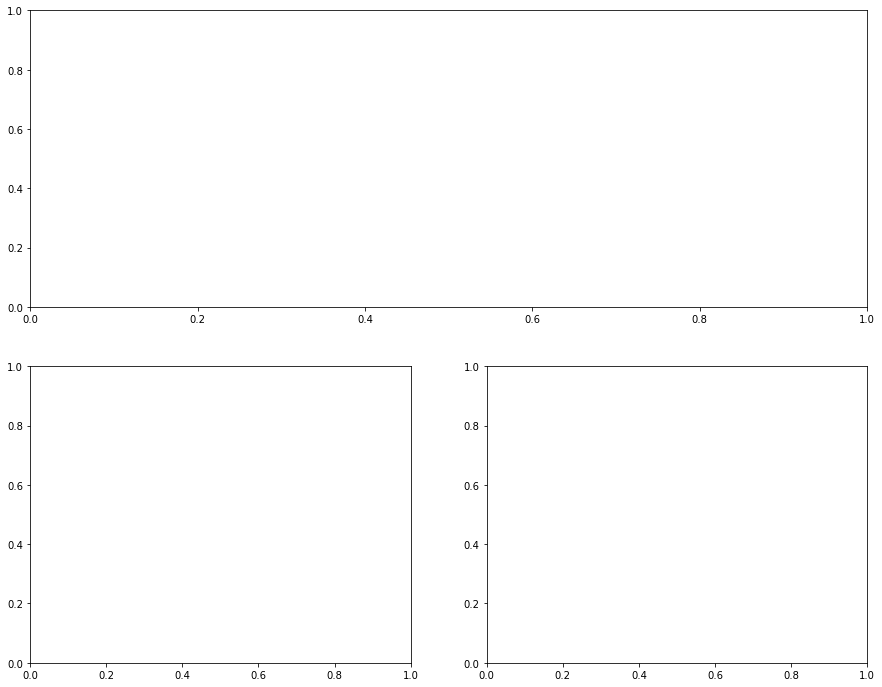

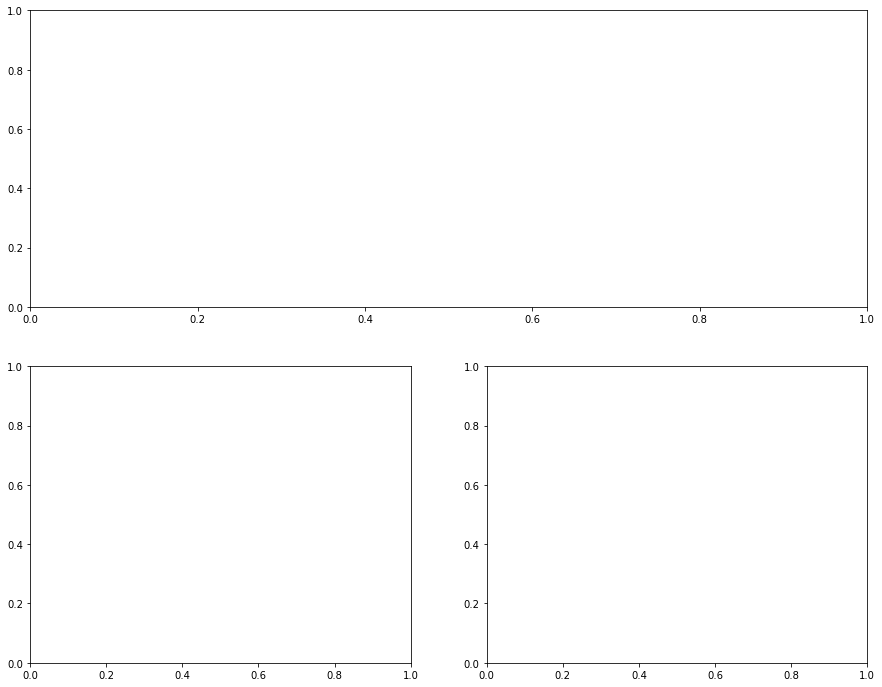

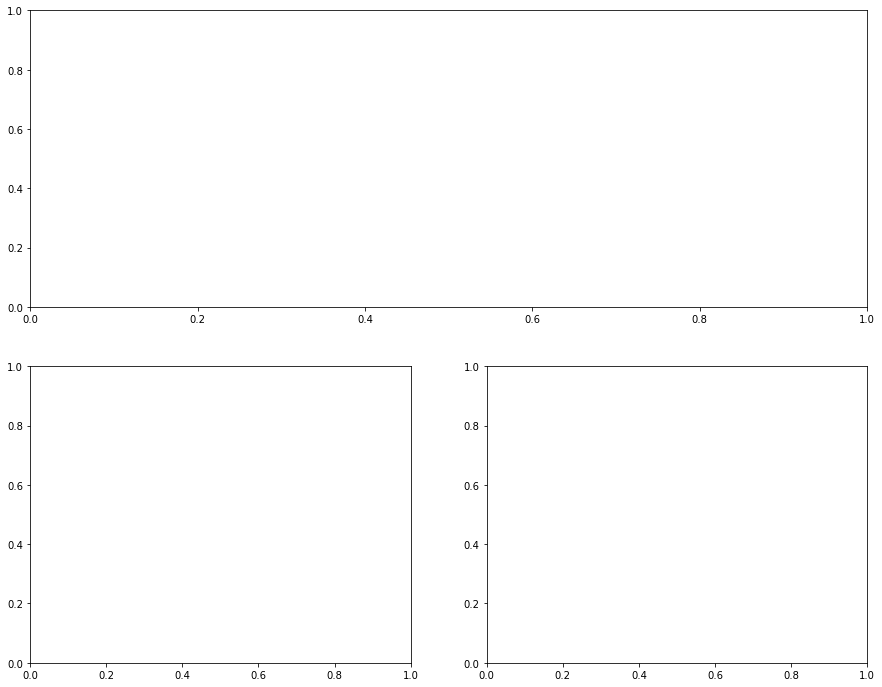

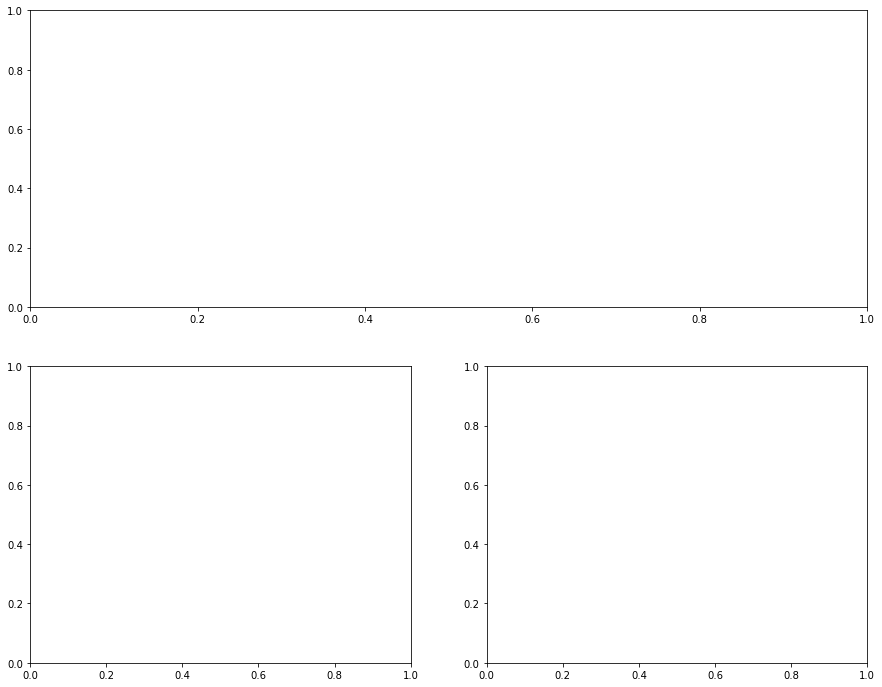

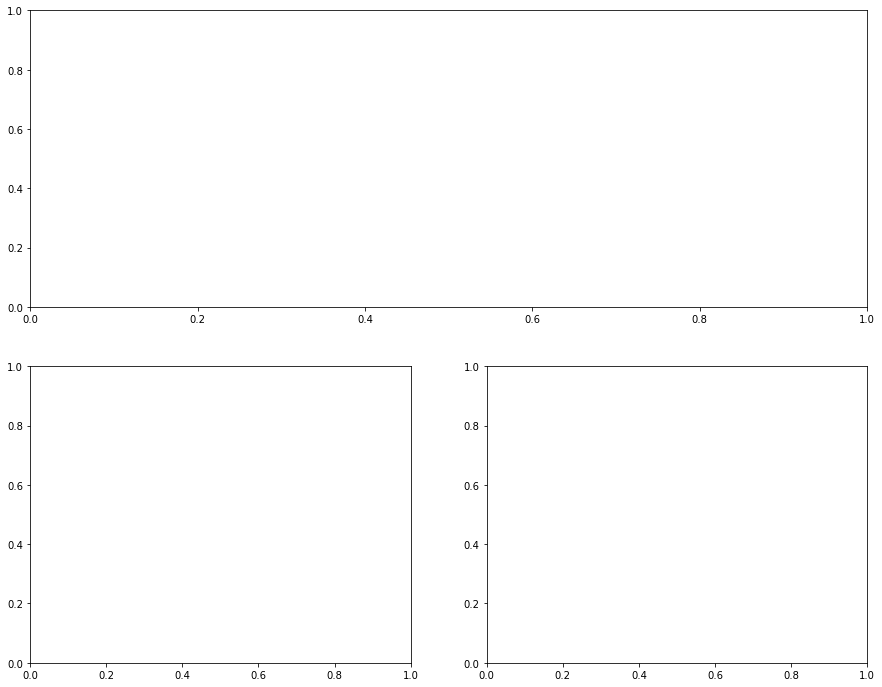

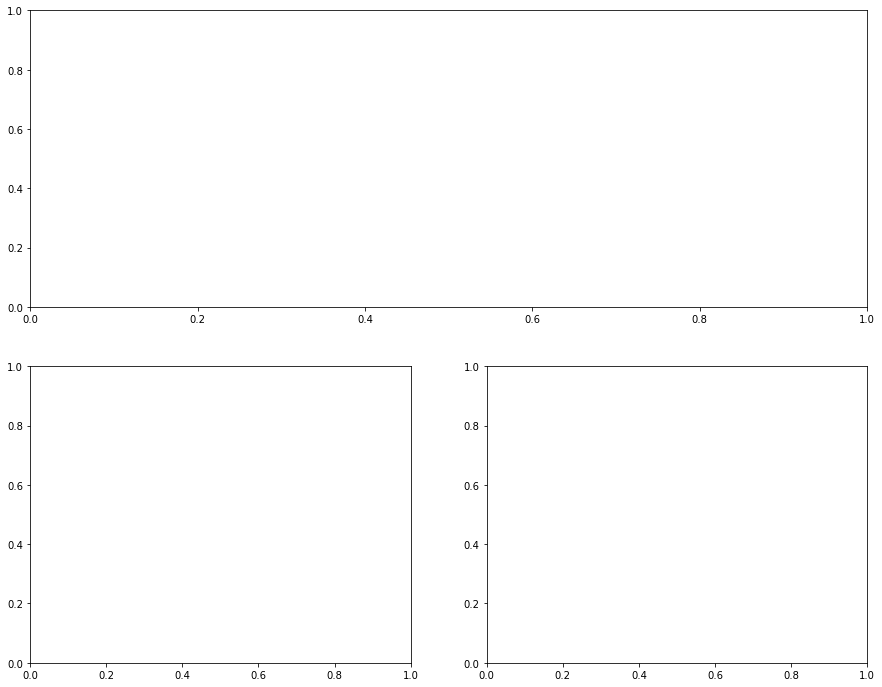

In [198]:
#mostrando o gráfico

widgets.interactive(update_map, data=fixed(data), 
                    date_limit = date_limit,
                    year_limit = year_renovated,
                    waterfront_limit = waterfront_bar )